# <font face="Verdana" size=6 color='#6495ED'> IAD-004 APRENDIZAGEM DE M√ÅQUINA 1
<font face="Verdana" size=3 color='#40E0D0'> Professores Larissa Driemeier e Thiago Martins

<center><img src='https://drive.google.com/uc?export=view&id=1J3dF7v9apzpj27oOsrT8aEagtNIYwq7J' width="600"></center>

O objetivo deste Notebook √© fornecer uma descri√ß√£o fundamental de aprendizado N√£o supervisionado, abordando conceitos fundamentais e mesclando teoria com c√≥digos em Python. Baseado na aula [IAD-007](https://alunoweb.net/moodle/pluginfile.php/117113/mod_resource/content/6/Aula07_PCA.pdf), ano 2024.


Os seguintes trabalhos foram extremamente importantes na elabora√ß√£o deste material:
* Clusteriza√ß√£o
1. Suraj Yadav, [Silhouette Coefficient Explained with a Practical Example: Assessing Cluster Fit](https://medium.com/@Suraj_Yadav/silhouette-coefficient-explained-with-a-practical-example-assessing-cluster-fit-c0bb3fdef719), 2023.

* PCA
1. [Dimensionality Reduction: Principal Component Analysis in-depth](https://nbviewer.jupyter.org/github/jakevdp/sklearn_pycon2015/blob/master/notebooks/04.1-Dimensionality-PCA.ipynb), de Jake Vanderplas, 2015.
2. [A tutorial on Principal Components Analysis](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf), de Lindsay I Smith, 2002.
3. [Implementing a Principal Component Analysis (PCA)](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html#what-is-a-good-subspace), de Sebastian Raschka, 2014.
4. [A Structural Risk Minimization Approach to Principal Component Analysis](https://colab.research.google.com/github/foxtrotmike/PCA-Tutorial/blob/master/pca.ipynb#scrollTo=isMQxiFkxf_w), de Fayyaz Minhas.
5. [PCA and SVD](https://intoli.com/blog/pca-and-svd/), de Andre Perunicic, 2017.
6. [Principal Component Analysis Made Easy: A Step-by-Step Tutorial](https://towardsdatascience.com/principal-component-analysis-made-easy-a-step-by-step-tutorial-184f295e97fe), de Marcus Sena, 2024.

> <small>*The world doesn't need a yet another PCA tutorial, just like the world doesn't need another silly love song.  But sometimes you still get the urge to write your own.*, Scott H. Hawley, 2019</small>




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random
from numpy import exp, sqrt, array, abs
sns.set()
import math
from mpl_toolkits import mplot3d


# Aprendizado n√£o supervisionado

A aprendizagem n√£o supervisionada √© um conjunto de ferramentas estat√≠sticas para cen√°rios em que existe apenas um conjunto de recursos e nenhum r√≥tulo.
Portanto, n√£o podemos fazer previs√µes, uma vez que n√£o existem respostas associadas a cada observa√ß√£o. Em vez disso, estamos interessados em encontrar uma forma interessante de visualizar dados ou em descobrir subgrupos de observa√ß√µes semelhantes.

Duas t√©cnicas ser√£o o foco desta aula:  agrupamento (clustering) e an√°lise de componentes principais ou PCA (do ingl√™s, Principal Component Analysis).

# Clusteriza√ß√£o por K-means

Um dos algoritmos mais populares e amplamente utilizados para tarefas de cluster √© o K-means. Um algoritmo de agrupamento K-means tenta agrupar itens semelhantes na forma de clusters. O n√∫mero de grupos √© representado por K.

O algoritmo iterativo baseado em centr√≥ide que cria clusters n√£o sobrepostos.

<center><img src='https://drive.google.com/uc?export=view&id=13ylU4sxfjMKoD72fRtCk0XNXnWH3UvhQ' width="600"></center>


A classe `KMeans` foi adaptada do [link](https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670).

Para um determinado conjunto de dados `X_train`, `n_cluster` √© especificado como o n√∫mero de clusters distintos aos quais os dados pertencem e `max_iter` ser√° o n√∫mero m√°ximo de itera√ß√µes para otimizar a clusteriza√ß√£o.

Os `n_cluster` centroides s√£o primeiro inicializados aleatoriamente e, em seguida, itera√ß√µes s√£o realizadas para otimizar as suas localiza√ß√µes da seguinte forma:
* A dist√¢ncia Euclidiana de cada ponto a cada centr√≥ide √© calculada:
$$
d_{ij} = \sqrt{\left(x_1^{(i)}-c_j\right)^2+\left(x_2^{(i)}-c_j\right)^2+ \cdots +\left(x_n^{(i)}-c_j\right)^2}
$$
 onde $n$ √© a dimens√£o dos dados, $i$ √© cada ponto de dado, e $j$ cada centroide.
* Os pontos s√£o atribu√≠dos ao centr√≥ide mais pr√≥ximo.
* Os centr√≥ides s√£o deslocados para serem o valor m√©dio dos pontos pertencentes a ele.
* Repete-se o algoritmo at√© os centr√≥ides n√£o se moverem, ouser atingido o n√∫mero m√°ximo de itera√ß√µes.

In [3]:
class KMeans:

    def __init__(self, n_clusters=8, max_iter=1000, centroid_init = 'firstRandom'):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroid_init = centroid_init

    def _euclidean(self,x,X):
        '''
        Calcula a dist√¢ncia euclidiana entre um ponto de dados x e
        todos os outros pontos no conjunto de dados, denotado como X

        Argumentos:
          x: ponto de dados para o qual as dist√¢ncias ser√£o calculadas
          X: o conjunto de dados incluindo todos os pontos de dados
        '''
        return np.sqrt(np.sum((x - X)**2, axis=1))

    def _initialise_centroids(self,data):
        ## 3 ways to initialize centroides
        if(self.centroid_init == 'random'):
            initial_centroids = np.random.permutation(data.shape[0])[:self.n_clusters]
            self.centroids = data[initial_centroids]
        elif(self.centroid_init == 'firstRandom'):
            # Um ponto aleat√≥rio dos dados √© escolhido para o primeiro centr√≥ide
            # ent√£o o restante √© inicializado com probabilidades proporcionais √†s suas dist√¢ncias at√© o primeiro
            self.centroids = [random.choice(data)]
            for _ in range(self.n_clusters-1):
                # Calcular dist√¢ncias dos pontos aos centr√≥ides
                dists = np.sum([self._euclidean(centroid, data) for centroid in self.centroids], axis=0)
                # Normalizar as dist√¢ncias
                dists /= np.sum(dists)
                # Escolha os centroides restantes com base em suas dist√¢ncias
                # veja que, na linha a seguir, a probabilidade de um ponto ser escolhido √©
                # a dist√¢ncia normalizada ao centroide "dists"
                new_centroid_idx = np.random.choice(range(len(data)), p=dists)
                self.centroids += [data[new_centroid_idx]]
        else:
        ## primeiros k valores do dataset
            self.centroids = data[:k]
        return self.centroids

    def fit(self, X_train):
        '''
        Aloca os dados em clusters
        Input : os dados de treinamento (X_train)
        Output: a posi√ß√£o dos centroides (self.centroids) e
        '''
        self._initialise_centroids(X_train)

        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Classificar cada ponto de dados, alocando-o no centroide mais pr√≥ximo
            sorted_points = [[] for _ in range(self.n_clusters)]
            centroid_idxs = []
            for x in X_train:
                dists = self._euclidean(x,self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

                centroid_idxs.append(centroid_idx)
            # Atualize centroides pr√©vios
            #  reatribua os centr√≥ides como m√©dia dos pontos pertencentes a eles
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Capturar qualquer np.nans, resultante de um centroide sem pontos
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
        return self.centroids, sorted_points, centroid_idxs

    def evaluate(self, X_test):
            centroid_idxs = []
            for x in X_test:
                dists = self._euclidean(x,self.centroids)
                centroid_idx = np.argmin(dists)
                centroid_idxs.append(centroid_idx)
            return centroid_idxs


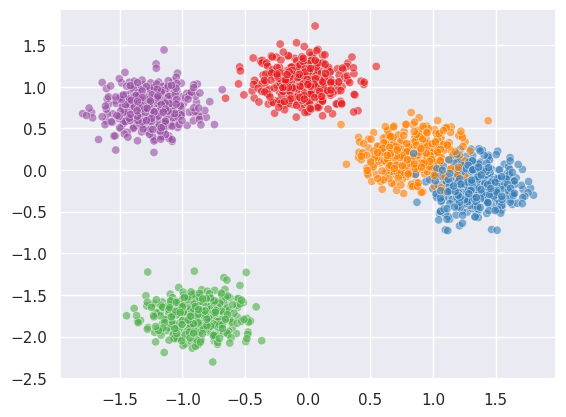

In [4]:
# Dataset
centers = 5
X_train, true_labels_train = make_blobs(n_samples=2000, centers=centers, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels_train,
                palette="Set1", alpha = 0.6,
                legend=None
                );


In [5]:
# Ajustar os centroides ao dataset
kmeans = KMeans(n_clusters=centers)
centroids, sorted_points, labels_train = kmeans.fit(X_train)


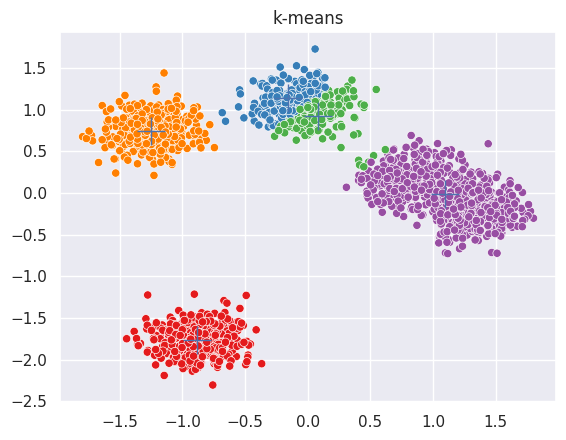

In [6]:
# Ver resultados
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=labels_train,
                palette="Set1",
                legend=None
                )
plt.plot([x for x, _ in centroids],
         [y for _, y in centroids],
         '+',
         markersize=20,
         )
plt.title("k-means")
plt.show()


E agora, vamos escolher 20 pontos, e tentar classificar.

Para escolher os 20 pontos, geramos de novo os dados artificiais. Por√©m, desta vez, geramos 30 dados a mais com mesmo `random_state=42` e pegamos somente os √∫ltimos 20, que n√£o foram utilizados no treinamento.




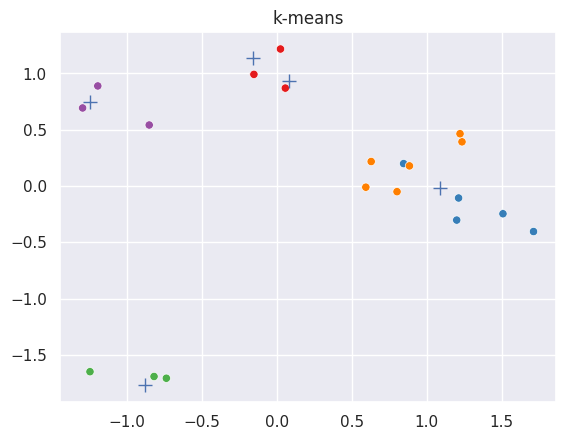

In [7]:
centers = 5
t1, t2 = make_blobs(n_samples=2030, centers=centers, random_state=42)
X_test =t1[-20:]
true_labels_test = t2[-20:]

X_test = scaler.transform(X_test)


# Plotagem dos dados de teste
sns.scatterplot(x=[X[0] for X in X_test],
                y=[X[1] for X in X_test],
                hue=true_labels_test,
                palette="Set1",
                legend = None
                )
plt.plot([x for x, _ in centroids],
         [y for _, y in centroids],
         '+',
         markersize=10,
         )
plt.title("k-means")
plt.show()


Aqui vamos concatenar os dados de treino e teste, simplesmente para plot√°-los em um √∫nico gr√°fico.

Para melhor visualiza√ß√£o dos dados de teste, usamos somente os 100 primeiros dados de treino.

Veja que foi adicionada uma terceira coluna aos dados, al√©m das coordenadas: a coluna √© completada com `1` para dados de teste, que ser√£o plotados com `+`, e com `0` para dados de treino, que ser√£o plotados com `o`.

In [8]:
X_conc = X_train[0:101].copy()
c = [0]*len(X_conc)
X_conc = np.insert(X_conc, 2, c, axis=1)
X1 =  X_test.copy()
c = [1]*len(X1)
X1 = np.insert(X1, 2, c, axis=1)
X_conc = np.insert(X_conc, 0, X1, axis=0)
true_labels_conc = true_labels_train[0:101].copy()
true_labels_conc = np.insert(true_labels_conc, 0, true_labels_test, axis=0)


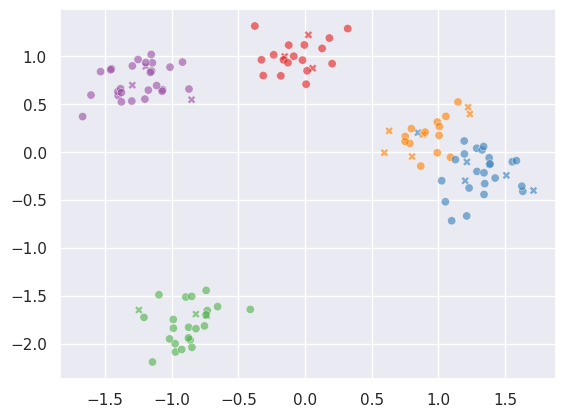

In [9]:
# Plotagem dos dados de treino e teste juntos
sns.scatterplot(x=[X[0] for X in X_conc],
                y=[X[1] for X in X_conc],
                style=X_conc[:,2],
                hue=true_labels_conc,
                palette="Set1", alpha= 0.6,
                legend = None
                );


Agora, vamos usar o m√©todo `evaluate` da classe `KMeans` para classificar os dados. Vejamos como ser√° o desempenho de nosso modelo.

In [10]:
labels_test = kmeans.evaluate(X_test)


Agora vamos plotar nosso gr√°fico novamente. Por√©m, ao inv√©s de usar o `true_labels_test` (que, na verdade, n√£o ter√≠amos em uma situa√ß√£o real), e vamos usar o resultado do nosso modelo. Para isso, temos que reescrever o vetor de labels:

In [11]:
labels_conc = labels_train[0:101].copy()
labels_conc = np.insert(labels_conc, 0, labels_test, axis=0)


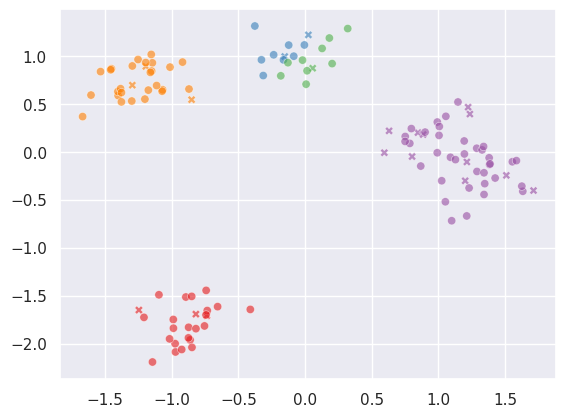

In [12]:
# Plotagem dos dados de treino e teste juntos
sns.scatterplot(x=[X[0] for X in X_conc],
                y=[X[1] for X in X_conc],
                style=X_conc[:,2],
                hue=labels_conc,
                palette="Set1", alpha = 0.6,
                legend = None
                );


## Escolha do hiperpar√¢metro $K$

Os dados com os quais voc√™ trabalhar√° nem sempre ter√£o demarca√ß√µes distintas quando plotados. Ali√°s, muitas vezes, voc√™ lidar√° com dados de dimens√µes altas, que n√£o podem ser plotados. Ou mesmo que sejam plotados, voc√™ n√£o poder√° determinar o n√∫mero √≥timo de agrupamentos.

Os m√©todos do cotovelo e da silhueta s√£o t√©cnicas usadas para determinar o n√∫mero √≥timo de clusters em um algoritmo de agrupamento como o K-means.




### M√©todo cotovelo

A Soma das Quadrados Dentro do Agrupamento (WCSS, do ingl√™s Within-Cluster Sum of Squares) √© uma medida utilizada na an√°lise de agrupamentos (clustering) para quantificar a variabilidade dos pontos de dados dentro de cada cluster. Em outras palavras, WCSS calcula a soma dos quadrados das dist√¢ncias de cada ponto de dados ao centr√≥ide do seu respectivo cluster,
$$
\text{WCSS} = \sum_{i=1}^{k} \sum_{\textbf{x}_j \in C_i} \| \textbf{x}_j - \boldsymbol{\mu}_i \|^2
$$

<center><img src='https://drive.google.com/uc?export=view&id=1bJlQd1mMjHLrCTS2_caJQzVQ4u10XejE' width="400"></center>

Onde:

* $k$ √© o n√∫mero de clusters,
* $C_i$ √© o $i$-√©simo cluster,
* $\textbf{x}_j=\begin{bmatrix}x_{j} & y_{j}\end{bmatrix}^T$ √© o $j$-√©simo ponto de dados,
* $ \boldsymbol{\mu}_i =\begin{bmatrix}x_{C_i} & y_{C_i}\end{bmatrix}^T$ √© o centr√≥ide do $i$-√©simo cluster,
* $\| \textbf{x}_j - \boldsymbol{\mu}_i \|^2$ √© a dist√¢ncia quadrada entre o ponto de dados $\textbf{x}_j$ e o centr√≥ide $ \boldsymbol{\mu}_i$.


Quanto menor for o valor do WCSS, mais compactos e coesos s√£o os clusters.

In [13]:
def calculate_wcss(data, labels, centroids,k):
   """
   Calcula WCSS para diferentes valores de K no agrupamento K-means.
   Par√¢metros:
   dados (array): os dados a serem agrupados.
   max_k (int): O n√∫mero m√°ximo de clusters a serem testados.
   Retorna:
   valor WCSS para K
   """
   wcss = 0
   for i in range(k):
        cluster_points = data[i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
   return wcss


In [14]:
# Dataset
centers = 5
X_train, true_labels_train = make_blobs(n_samples=2000, centers=centers, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


/home/codespace/.local/share/virtualenvs/POLI-uUrlVJ__/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/codespace/.local/share/virtualenvs/POLI-uUrlVJ__/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


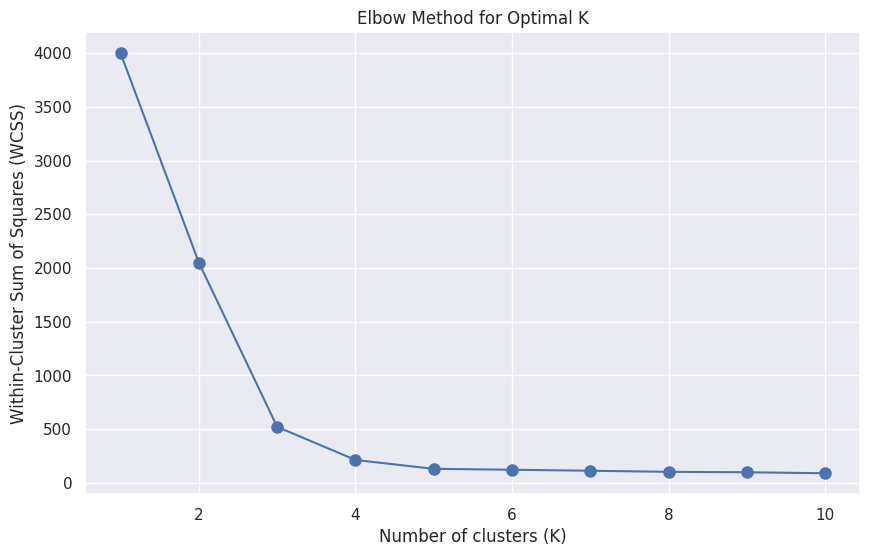

In [15]:
# Faixa de valores de K
K_range = range(1, 11)

# Lista para armazenar os valores WCSS para cada K
wcss = []

# C√°lculo de WCSS de cada K
wcss_values = []
for k in K_range:
   kmeans = KMeans(n_clusters=k)
   centroids, sorted_points, labels = kmeans.fit(X_train)
   wcss = calculate_wcss(sorted_points, labels, centroids,k)
   wcss_values.append(wcss)

# Plotagem do gr√°fico
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss_values, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


Veja que, a partir de $K=3,4,5$ n√£o h√° significante mudan√ßa na varia√ß√£o dos dados dentro dos clusters.

### M√©todo Silhueta

O m√©todo da silhueta mede a similaridade e a dissimilaridade dos pontos de dados dentro dos clusters e entre clusters, respectivamente. A ideia √© encontrar um n√∫mero de clusters que maximize a similaridade dentro dos clusters e minimize a similaridade entre clusters.

<center><img src='https://drive.google.com/uc?export=view&id=1Z7TBDT6vbowbAUQITIb9zEAjo5Zd-aqd' width="800"></center>

__1. C√°lculo da Similaridade Intra-cluster__

Para cada ponto $i$ em um cluster, calcula-se a m√©dia das dist√¢ncias entre $i$ e todos os outros pontos no mesmo cluster. Essa medida √© conhecida como $a(i)$:
$$
a(i) = \frac{1}{|C| - 1} \sum_{j \in C, j \neq i} d(i, j)
$$
onde $|C|$ √© o n√∫mero de pontos no cluster $C$ e $d(i, j)$ √© a dist√¢ncia entre os pontos $i$ e $j$.

__2. C√°lculo da Dissimilaridade Inter-cluster__

Para cada ponto $i$, calcula-se a m√©dia das dist√¢ncias entre $i$ e todos os pontos no cluster mais pr√≥ximo ao qual $i$ n√£o pertence. Essa medida √© conhecida como $b(i)$:
$$
b(i) = \min_{k \neq C} \frac{1}{|C_k|} \sum_{j \in C_k} d(i, j)
$$
onde $C_k$ √© um cluster diferente do cluster $C$ ao qual o ponto $i$ pertence.

__3. C√°lculo do Coeficiente de Silhueta__

Para cada ponto $i$, o coeficiente de silhueta √© dado por:
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$
O valor de $s(i)$ varia entre -1 e 1. Um valor pr√≥ximo de 1 indica que o ponto est√° bem agrupado, enquanto um valor pr√≥ximo de -1 indica que o ponto pode estar no cluster errado.

__4. C√°lculo da M√©dia do Coeficiente de Silhueta__

A m√©dia dos coeficientes de silhueta para todos os pontos em um cluster d√° uma medida da qualidade do agrupamento. A m√©dia dos coeficientes de silhueta para todos os pontos no conjunto de dados d√° uma medida global da qualidade do agrupamento:
$$
\bar{s} = \frac{1}{N} \sum_{i=1}^{N} s(i)
$$
onde $N$ √© o n√∫mero total de pontos no conjunto de dados.

__5. Escolha do N√∫mero √ìtimo de Clusters__

O n√∫mero √≥timo de clusters √© aquele que maximiza a m√©dia dos coeficientes de silhueta. Em outras palavras, √© o n√∫mero de clusters que resulta na maior m√©dia de similaridade intra-cluster e dissimilaridade inter-cluster.

Um coeficiente de silhueta de 1 denota que o ponto de dados est√° bem  *compactado*  do cluster ao qual pertence e distante dos outros clusters. O pior valor √© -1. Valores pr√≥ximos a 0 denotam clusters sobrepostos.

In [16]:
def euclidean_distance(point1, point2):
    '''
    Calcular a dist√¢ncia euclidiana entre dois pontos
    INPUT: pontos (point2 e point2) e vetor com todos os pontos do cluster (cluster_points)
    OUTPUT: dist√¢ncia Euclidiana entre point1 e point2
    '''
    return np.sqrt(np.sum((point1 - point2) ** 2))


def mean_intra_cluster_distance(point, cluster_points):
    '''
    Calcular a m√©dia da dist√¢ncia entre um ponto e todos os pontos em um cluster
    INPUT: ponto (point) e vetor com todos os pontos do cluster (cluster_points)
    OUTPUT: m√©dia entre a dist√¢ncia do "point" e dos demais "cluster_points"
    '''
    return np.mean([euclidean_distance(point, other) for other in cluster_points if not np.array_equal(point, other)])


def mean_nearest_cluster_distance(point, point_cluster, clusters):
    '''
    Calcular a m√©dia da dist√¢ncia entre um ponto e todos os pontos do cluster mais pr√≥ximo
    INPUT: ponto (point), vetor com todos os pontos do cluster (cluster_points) e demais clusters (clusters)
    OUTPUT: m√©dia entre a dist√¢ncia do "point" e dos pontos do cluster mais pr√≥ximo
    '''
    distances = []
    for cluster_label, cluster_points in clusters.items():
        if cluster_label != point_cluster:
            distances.append(np.mean([euclidean_distance(point, other) for other in cluster_points]))
    return np.min(distances)

def silhouette_coefficient(point, point_cluster, clusters):
    '''
    Calcular a,b, e o coeficiente de silhueta de um ponto
    INPUT: ponto (point), vetor com todos os pontos do cluster (cluster_points) e demais clusters (clusters)
    OUTPUT: (b-a)/max(a,b)
    '''
    a = mean_intra_cluster_distance(point, clusters[point_cluster])
    b = mean_nearest_cluster_distance(point, point_cluster, clusters)
    return (b - a) / max(a, b)

def silhouette_score(data, labels):
    '''
    Calcular a m√©dia dos coeficientes de silhueta para todos os pontos
    INPUT: dados (data) e o cluster a que pertence cada dado (labels)
    OUTPUT: m√©dia de todos valores de (b-a)/max(a,b) e score de cada ponto, em cada cluster
    '''
    unique_labels = np.unique(labels)
    clusters = {label: data[label] for label in unique_labels}

    silhouette_scores = []
    for label in unique_labels:
        for point in clusters[label]:
            silhouette_scores.append([label,silhouette_coefficient(point, label, clusters)])

    return np.mean(silhouette_scores,axis=0), silhouette_scores


In [17]:
# Dataset
centers = 5
X_train, true_labels_train = make_blobs(n_samples=2000, centers=centers, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [18]:
# Faixa de valores de K
K_range = range(2, 8)

# Lista para armazenar os valores SILHUETA para cada K
silhouette = []

# Calcular Silhueta para cada K
silhouette_values = []
silhouette_profile = []
for k in K_range:
   kmeans = KMeans(n_clusters=k)
   centroids, sorted_points, labels = kmeans.fit(X_train)
   silhouette, silhouette_scores = silhouette_score(sorted_points,labels)
   silhouette_values.append(silhouette[1])
   silhouette_profile.append([k,silhouette_scores])

# Calculando o coeficiente de silhueta
print(f"Silhueta: {silhouette_values}")


Silhueta: [0.46927260319569164, 0.7015912557233602, 0.5717499881532021, 0.4511101231432419, 0.510705863103795, 0.4969081436349353]


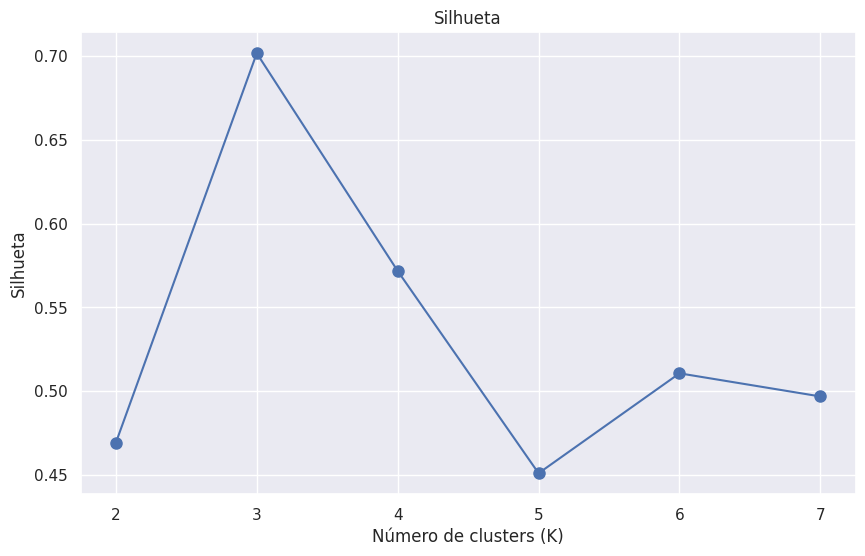

In [19]:
# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_values, 'bo-', markersize=8)
plt.xlabel('N√∫mero de clusters (K)')
plt.ylabel('Silhueta')
plt.title('Silhueta')
plt.grid(True)
plt.show()


Veja que uma plotagem comum da silhueta √© o perfil de cada n√≥ para cada n√∫mero de clusters $k$, conforme ilustra a figura abaixo.

<center><img src='https://drive.google.com/uc?export=view&id=1b2E98m5jiwEUj48rP61ACHqAuvuibqaz' width="600"></center>

<small> Figura extra√≠da do [link](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html) <small>

`silhouette_profile[0][0]` armazena o n√∫mero de clusters da an√°lise, enquanto `silhouette_profile[0][1]` armazena o n√∫mero do label (`silhouette_profile[0][1][i][0]`) e o valor da silhueta (`silhouette_profile[0][1][i][1]`) de cada ponto $i$.

In [20]:
silhouette_profile[1][1][1999][1]


0.4957473903485653

In [21]:
silhouette_profile[1][1]


[[0, 0.8595285893055702],
 [0, 0.8976513810111413],
 [0, 0.8875727732502108],
 [0, 0.8297406036507093],
 [0, 0.896484811121725],
 [0, 0.9152935752892523],
 [0, 0.7692759479110677],
 [0, 0.8689335817480417],
 [0, 0.860152703214939],
 [0, 0.8281022630725237],
 [0, 0.8881694400420543],
 [0, 0.8376596701842306],
 [0, 0.8679953406321438],
 [0, 0.910251895726116],
 [0, 0.8935712846110577],
 [0, 0.8764714355842295],
 [0, 0.8800417465125154],
 [0, 0.9021373707784128],
 [0, 0.903675674514084],
 [0, 0.9097224432906351],
 [0, 0.9110313674412709],
 [0, 0.8645388827122283],
 [0, 0.8795662404642871],
 [0, 0.9035083232178212],
 [0, 0.7581104545972145],
 [0, 0.890827531069079],
 [0, 0.9117407063643731],
 [0, 0.9039464077588142],
 [0, 0.8960523240189774],
 [0, 0.8404851827665841],
 [0, 0.903480442493091],
 [0, 0.9142638069366898],
 [0, 0.913874133439157],
 [0, 0.8654661561963046],
 [0, 0.9077698653534831],
 [0, 0.9164477892134425],
 [0, 0.8704501183137836],
 [0, 0.8987455823797585],
 [0, 0.906115361060

Parece que 4 clusters √© uma boa ideia....

In [22]:
dim_sil = np.array([silhouette_profile[0][1][i][1] for i in range(len(silhouette_profile[0][1]))])
print(dim_sil.shape)


(2000,)


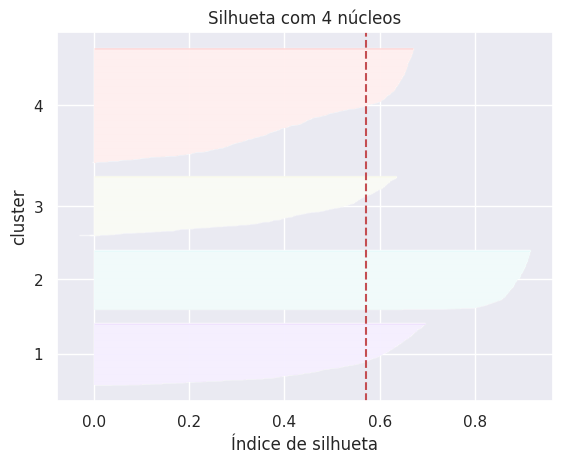

In [23]:
k= 4
index_k = range(2,8).index(k)
colors = ['DarkOliveGreen', 'steelblue']
colors = cm.rainbow(np.linspace(0, 1, k))
sil={}
y = {}
for i in range(k):
    sil[i] = []
for i in range(len(silhouette_profile[0][1])):
    sil[silhouette_profile[index_k][1][i][0]].append(silhouette_profile[index_k][1][i][1])
l = 0
for i in range(k):
     y[i] = [j for j in range(l,len(sil[i])+l)]
     l += 1

fig, ax = plt.subplots()
width = 1. # the width of the bars
tot = 0
space = 100
tpos = []
tlabels = []
siltot = 0
n = 0
for j in range(k):
  ax.barh(np.array(y[j])+tot, np.sort(sil[j]), width, color=colors[j], alpha = 0.6)
  siltot += sum(sil[j])
  n += len(y[j])
  tpos.append(tot + len(y[j])/2)
  tlabels.append(str(j+1))
  tot += len(y[j]) + space
plt.axvline(siltot/n, 0,tot, linestyle="--", color="r")

ax.set_yticks(tpos)
ax.set_yticklabels(tlabels, minor=False)
plt.title('Silhueta com {:d} n√∫cleos'.format(k))
plt.xlabel('√çndice de silhueta')
plt.ylabel('cluster')
plt.show()


#  Clusteriza√ß√£o por MeanShift

O modelo de clusteriza√ß√£o *mean-shift* atua *deslocando a m√©dia* de um conjunto de pontos no espa√ßo de caracter√≠sticas at√© convergir para uma regi√£o densa, chamada de modo (do ingl√™s, *mode*). __Cada modo encontrado pelo algoritmo √© considerado um cluster.__ O algoritmo √© baseado na ideia de estimativa de densidade de kernel, que √© uma maneira de estimar a fun√ß√£o de densidade de probabilidade de um conjunto de dados.

O modelo de estimativa de densidade de kernel 1D (KDE) usa a fun√ß√£o:
$$
p(x^i) = \frac{1}{n} \sum_{j=1}^{n} k_\sigma (x^i-x^j)
$$
onde $k_\sigma$ refere-se ao modelo de kernel $k$ com hiperpar√¢metro (largura de banda) $\sigma$.
A primeira etapa do algoritmo mean-shift √© definir hiperpar√¢metros, que se resumem a:

1. o raio de atua√ß√£o do kernel, para definir a *regi√£o local* de an√°lise;
2. uma fun√ß√£o kernel, que √© usada para calcular a densidade de probabilidade dos pontos de dados. Uma escolha comum para a fun√ß√£o kernel √© a fun√ß√£o Gaussiana, embora outros tipos de kernels tamb√©m possam ser utilizados.

A pr√≥xima etapa √© inicializar a m√©dia dos pontos de dados da regi√£o local e iniciar o processo iterativo de deslocar a m√©dia em dire√ß√£o √†s regi√µes densas do conjunto de dados.

A cada itera√ß√£o, o algoritmo calcula a densidade de probabilidade dos pontos de dados dada a m√©dia atual. Em seguida, a m√©dia √© deslocada para a m√©dia ponderada dos pontos de dados, onde os pesos s√£o determinados pela densidade de probabilidade. Esse processo √© repetido at√© que a m√©dia convirja ou at√© que seja alcan√ßado um n√∫mero m√°ximo de itera√ß√µes. A m√©dia final √© atribu√≠da a um cluster, e os pontos de dados mais pr√≥ximos da m√©dia s√£o atribu√≠dos a esse cluster tamb√©m.

<center><img src='https://drive.google.com/uc?export=view&id=1Vav1AEjV7ysS21jz9utUgDQuG9xJyXaf' width="800"></center>

Uma vez que todos os clusters foram encontrados, o algoritmo pode ser usado para classificar novos pontos de dados atribuindo-os ao cluster mais pr√≥ximo. O algoritmo mean-shift √© particularmente robusto para conjunto de dados cont√©m clusters de diferentes formas e tamanhos. Al√©m disso, o algoritmo mean-shift n√£o requer que o n√∫mero de clusters seja especificado com anteced√™ncia, tornando-o mais flex√≠vel para aprendizado de m√°quina n√£o supervisionado.

### Algoritmo

O algoritmo prop√µe o uso de dois kernels:
- *Gaussian*, onde √© adicionado o hiperpar√¢metro largura de banda (desvio padr√£o) $\sigma$:
$$
k_\sigma(d) = \frac{1}{\sigma \sqrt{2 \pi}} exp (- \frac{d^2}{\sigma^2})
$$
$d$ √© a dist√¢ncia entre os pontos $(\mathbf x^i- \mathbf x^j)$.

- *Flat*:
$$
k_\sigma(d) =
\begin{align}
 & 1 \text{ se  } d\leq \sigma \\
 &  0 \text{ se  } d> \sigma
\end{align}
$$

In [24]:
class MeanShift(object):
    '''
    Implementa√ß√£o do algoritmo MeanShift com um kernel gaussiano
    link: https://christianmaxmike.github.io/mindnotes/ml-clustering-meanshift
    Argumentos (propriedades):
      max_iter: n√∫mero m√°ximo de itera√ß√µes
      bandwidth: desvio padr√£o do kernel gaussiano
      tol: limite de toler√¢ncia
    '''

    def __init__(self, max_iter=100, bandwidth=.3, tol=1e-4):
        self.max_iter = max_iter
        self.bandwidth = bandwidth
        self.tol = tol

    def _euclidean(self, x, X):
        '''
        Calcula a dist√¢ncia euclidiana entre um ponto de dados x e
        todos os outros pontos no conjunto de dados, denotado como X

        INPUT:
          x: ponto de dados para o qual as dist√¢ncias ser√£o calculadas
          X: o conjunto de dados incluindo todos os pontos de dados
        '''
        return (sqrt(((x-X)**2).sum(1)))

    def gaussian_kernel(self, d, bandwidth):
        '''
        Define o kernel gaussiano

        INPUT:
          d: dist√¢ncia
          bandwidth: largura de banda que define o desvio padr√£o do kernel gaussiano
        '''
        f_1 = 1.0/(bandwidth * math.sqrt(2*math.pi))
        f_2 = exp(-0.5*((d/bandwidth))**2)
        return f_1 * f_2

    def R_kernel(self, d, R):
        '''
        Define o kernel gaussiano

        INPUT:
          d: dist√¢ncia
          bandwidth: largura de banda que define o desvio padr√£o do kernel gaussiano
        '''
        range_R = []
        for i in range(len(d)):
          if d[i] <= R:
            range_R.append(1)
          else:
            range_R.append(0)
        return np.array(range_R)

    def _calc (self, x, X, bandwidth):
        '''
        Calcula a m√©dia ponderada de todos os pontos de dados em X com rela√ß√£o a um certo ponto de dados x em X.

        INPUT:
          x: ponto de dados sendo atualmente considerado
          X: conjunto de dados
          bandwidth: largura de banda para o kernel "Gaussian" (fator de suaviza√ß√£o) ou raio para o kernel "Flat"
        '''
        # soma ponderada de todos os pontos, cujo peso √© dado pela respectiva dist√¢ncia
        # de cada ponto local em rela√ß√£o ao ponto x
        dist = self._euclidean(x, X)
        if self.kernel == 'Gaussian':
          weight = self.gaussian_kernel(dist, bandwidth)
        else:
          if self.kernel == 'Flat':
            weight = self.R_kernel(dist, bandwidth)
          else:
            raise ValueError('Kernel n√£o suportado')
        # soma ponderada de todos os pontos, cujo peso √© dado pela respectiva dist√¢ncia
        # de cada ponto em rela√ß√£o ao ponto x
        return (weight[:, None]*X).sum(0) / weight.sum()
        # weight[:, None] √© uma forma comum de manipular a forma de um array no NumPy
        # weight √© inicialmente um array 1D com forma (3,), o que significa que ele tem 3 elementos.
        # weight[:, None] muda sua forma para (3, 1), o que significa que agora ele tem 3 linhas e 1 coluna.

    def fit (self, X, kernel = 'Gaussian'):
        '''
        Executa o algoritmo MeanShift.

        INPUT:
          X: conjunto de dados
        '''
        it = 0
        self.kernel = kernel
        for i in range(self.max_iter):
            X_adapted = np.array([self._calc(x,X,self.bandwidth) for x in X])
            if it % 1 == 0:
                self._plot(X_adapted)
            if it >= self.max_iter or abs(X-X_adapted).sum()/abs(X.sum()) < self.tol:
                print ("Converg√™ncia na itera√ß√£o {}".format(it))
                self._plot(X_adapted)
                return X_adapted
            X = X_adapted
            it += 1

    def _plot (self, X):
        '''
        Plotagem simples
        '''
        dist = self._euclidean([0,0], X)
        plt.figure()
        plt.scatter(X[:,0], X[:, 1], c=dist, cmap='viridis')
        plt.show()


## Exemplo de Mean Shift com 5 pontos


Abaixo √© ilustrado o processo de MEan Shift passo a passo para o conjunto de pontos $\mathbf{X} = \{(1, 2), (2, 3), (3, 4), (6, 8), (7, 9)\}$, considerando a largura de banda $h = 3$.

1. __Inicialize os pontos:__
$\mathbf{X} = \{(1, 2), (2, 3), (3, 4), (6, 8), (7, 9)\}$\;

2. __Escolha uma largura de banda:__
Suponha uma largura de banda $h$ (raio para a vizinhan√ßa), digamos $h = 3$.

3. __Itera√ß√µes para cada ponto:__

<center><img src='https://drive.google.com/uc?export=view&id=1gN_Z50euKE3WPZCDwPFPnPS5NMDx3BD-' width="800"></center>

* Para o ponto $(1, 2)$:
 * Pontos dentro da largura de banda $h = 3$ s√£o $(1, 2), (2, 3), (3, 4)$. Portanto, tem-se a m√©dia de:
 $$\left( \frac{1+2+3}{3}, \frac{2+3+4}{3} \right) = (2, 3)$$



 * Para o ponto $(2, 3)$:
 * Pontos dentro da largura de banda $h = 3$ s√£o $(1, 2), (2, 3), (3, 4)$.Portanto, tem-se a m√©dia de:
 $$\left( \frac{1+2+3}{3}, \frac{2+3+4}{3} \right) = (2, 3)$$


* Para o ponto $(3, 4)$:
 * Pontos dentro da largura de banda $h = 3$ s√£o $(1, 2), (2, 3), (3, 4)$. Portanto, tem-se a m√©dia de:
 $$\left( \frac{1+2+3}{3}, \frac{2+3+4}{3} \right) = (2, 3)$$


* Para o ponto $(6, 8)$:
 * Pontos dentro da largura de banda $h = 3$ s√£o $(6, 8), (7, 9)$. Portanto, tem-se a m√©dia de:
 $$\left( \frac{6+7}{2}, \frac{8+9}{2} \right) = (6.5, 8.5)$$


* Para o ponto $(7, 9)$:
 * Pontos dentro da largura de banda $h = 3$ s√£o $(6, 8), $(7, 9)$. Portanto, tem-se a m√©dia de:
 $$\left( \frac{6+7}{2}, \frac{8+9}{2} \right) = (6.5, 8.5)$$


4. __Atualize os pontos:__
$$\mathbf{X}_{\text{novo}} = \{(2, 3), (2, 3), (2, 3), (6.5, 8.5), (6.5, 8.5)\}$$

Repita as itera√ß√µes de Mean Shift at√© que os pontos parem de mudar significativamente. No caso de nosso exemplo, os pontos j√° atingiram o equil√≠brio:
<center><img src='https://drive.google.com/uc?export=view&id=1Nksf-6M7PkuUjSE2CE8Ja8MjgZ-Xto93' width="200"></center>

Atribua clusters com base nos pontos convergidos\;

Clusters finais:
* __Cluster 1__: $(1, 2), (2, 3), (3, 4)$
* __Cluster 2__: $(6, 8), (7, 9)$

O algoritmo, ao final, ter√° todos os pontos com coordenadas de seu centroide:
```
[[2.  3. ]
 [2.  3. ]
 [2.  3. ]
 [6.5 8.5]
 [6.5 8.5]]
```



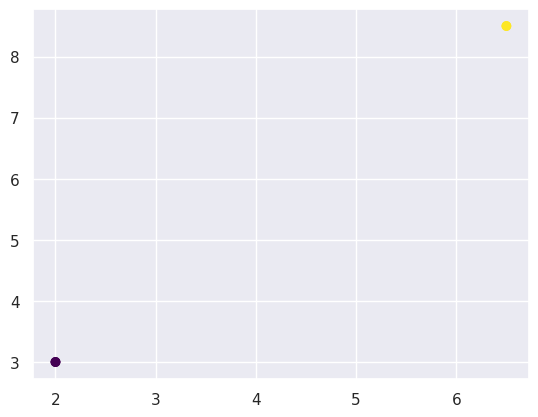

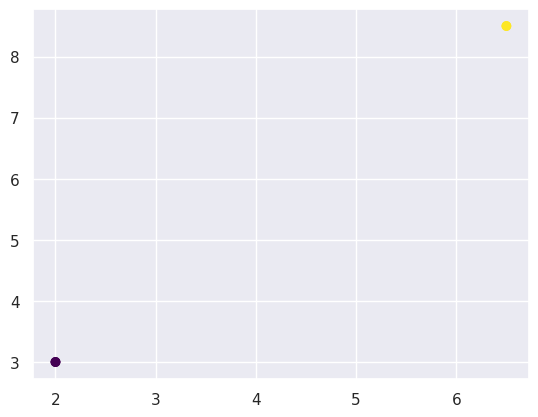

Converg√™ncia na itera√ß√£o 1


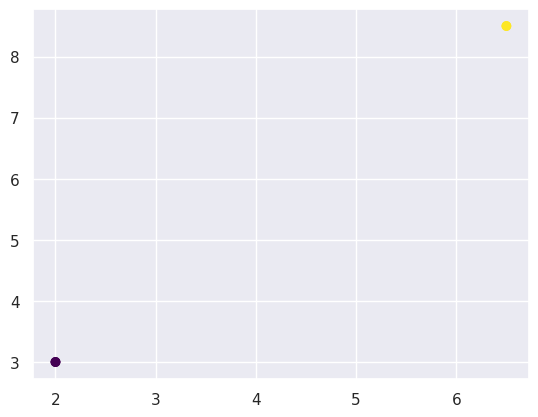

In [25]:
X = np.array([[1, 2], [2, 3], [3, 4], [6, 8], [7, 9]])
meanshift = MeanShift(max_iter=100, bandwidth=3, tol=1e-4)
centroids = meanshift.fit(X, kernel = 'Flat');


In [26]:
print(centroids)


[[2.  3. ]
 [2.  3. ]
 [2.  3. ]
 [6.5 8.5]
 [6.5 8.5]]


Teste com Gaussiano:

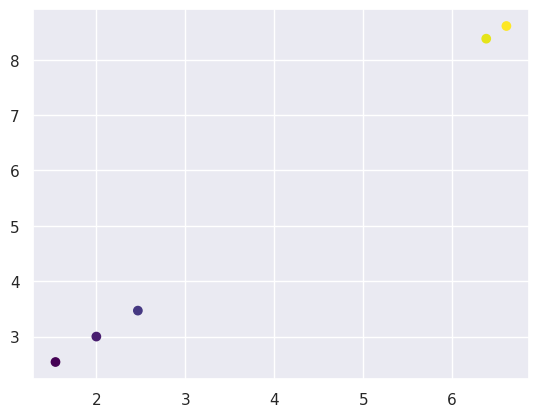

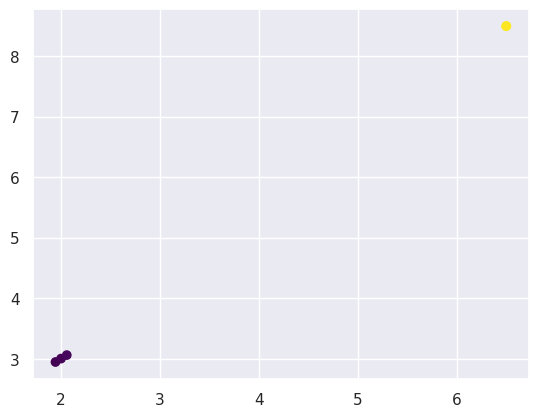

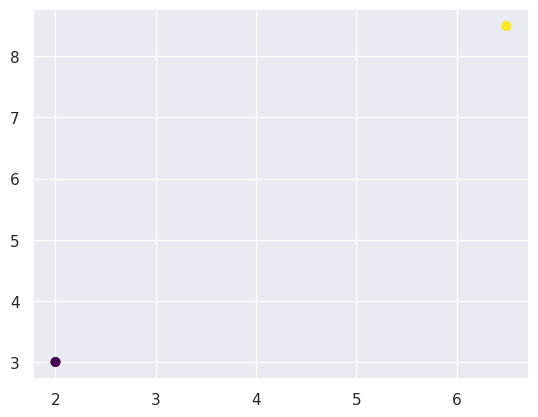

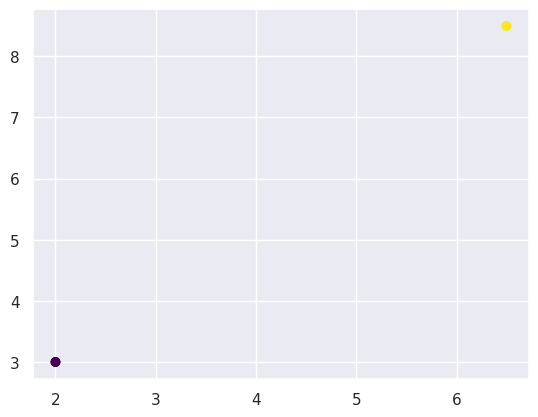

Converg√™ncia na itera√ß√£o 3


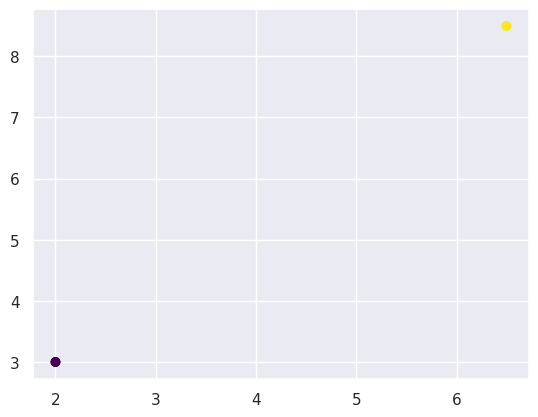

[[2.00267815 3.00345605]
 [2.00267817 3.00345608]
 [2.00267819 3.00345611]
 [6.49529277 8.49394417]
 [6.49529277 8.49394417]]


In [27]:
X = np.array([[1, 2], [2, 3], [3, 4], [6, 8], [7, 9]])
meanshift = MeanShift(max_iter=100, bandwidth=1.5, tol=1e-4)
centroids = meanshift.fit(X, kernel = 'Gaussian')
print(centroids)


Agora teste um modelo maior:

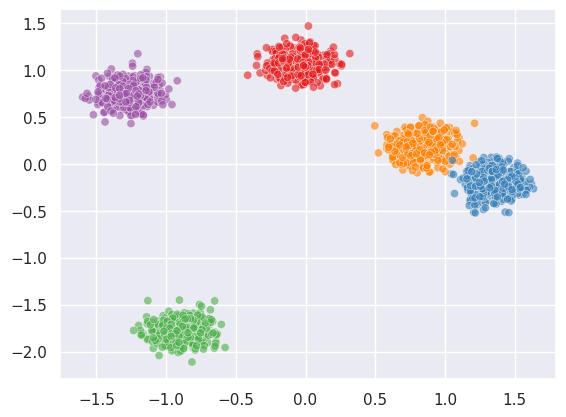

In [28]:
centers = 5
X_train, true_labels_train = make_blobs(n_samples=2000, centers=centers, cluster_std=0.60, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
sns.scatterplot(x=X_train[:,0], #[X[0] for X in X_train],
                y= X_train[:, 1], #[X[1] for X in X_train],
                hue=true_labels_train,
                palette="Set1", alpha = 0.6,
                legend=None
                );


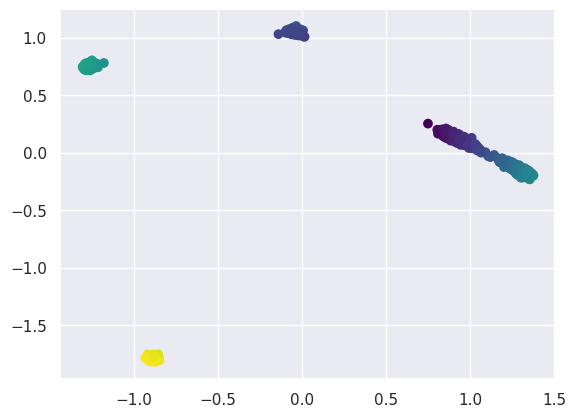

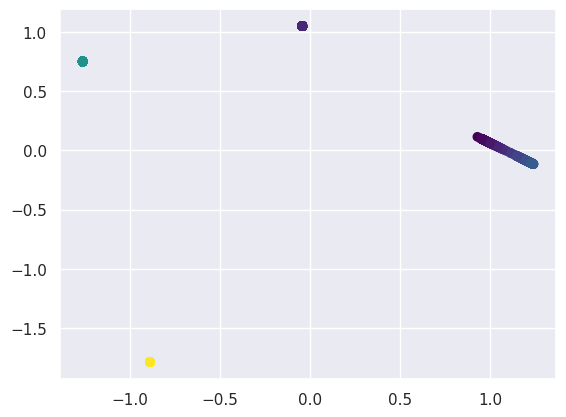

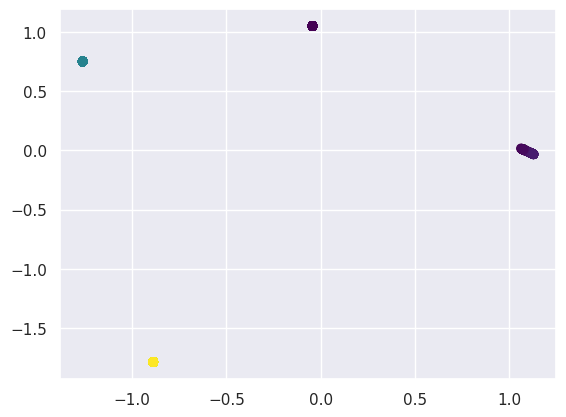

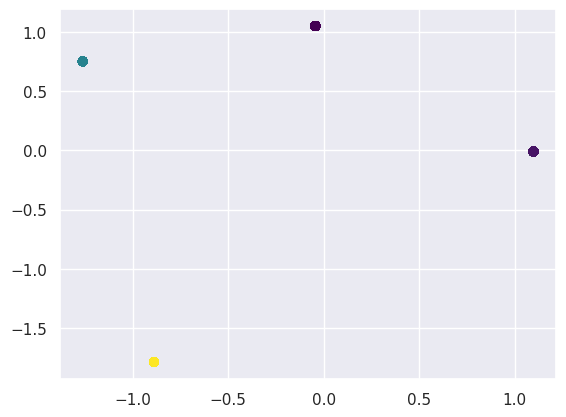

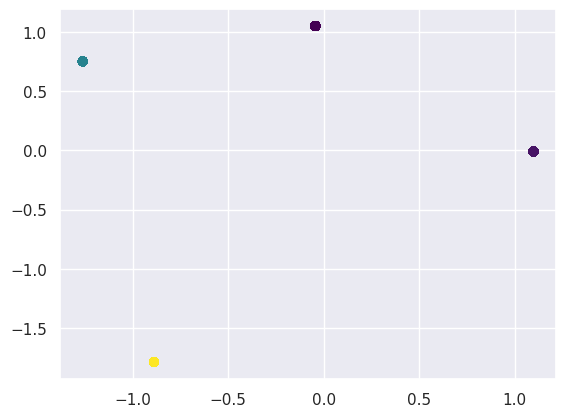

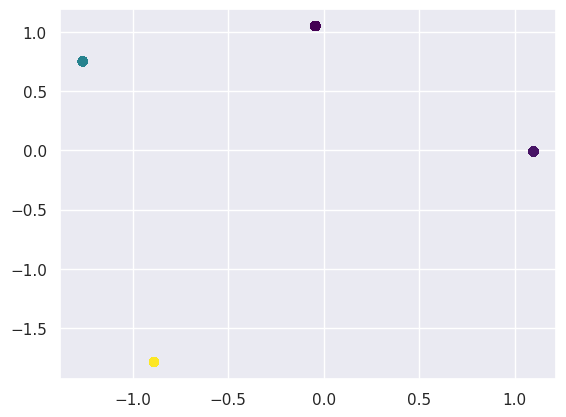

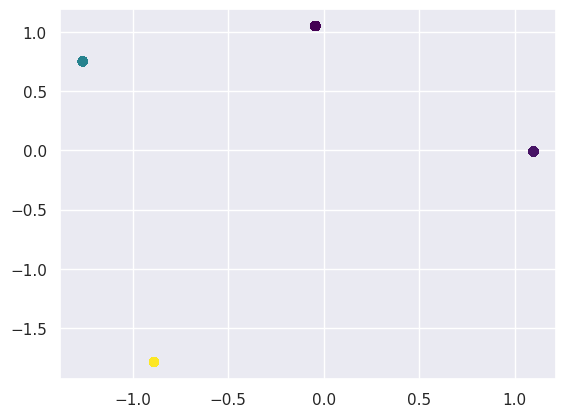

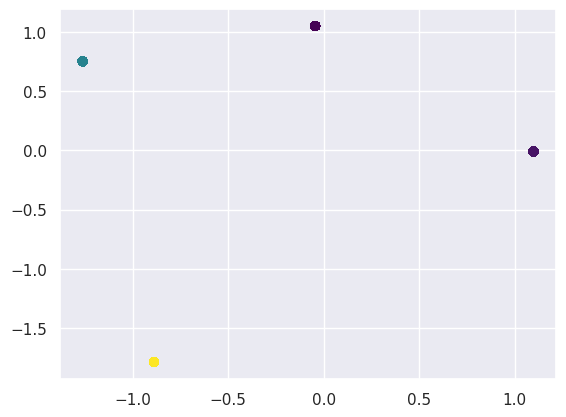

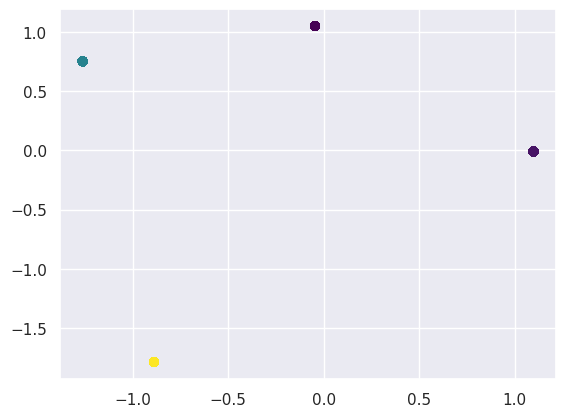

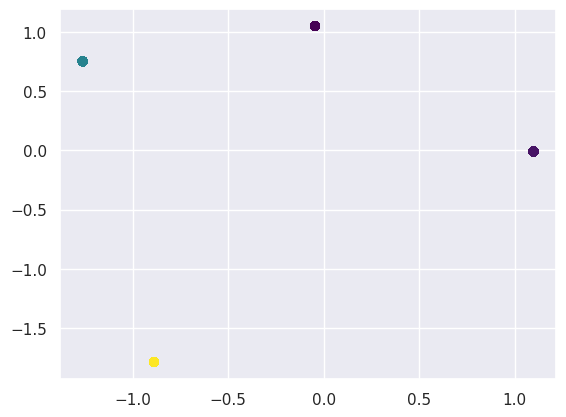

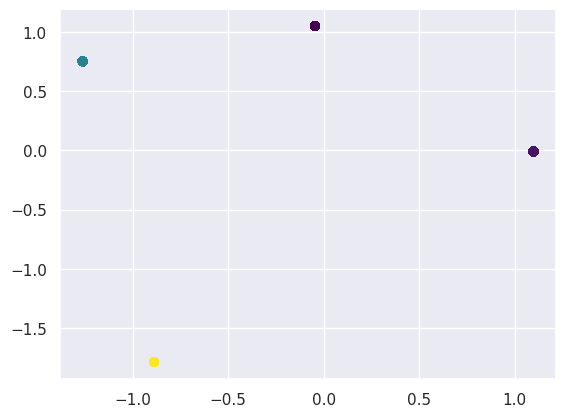

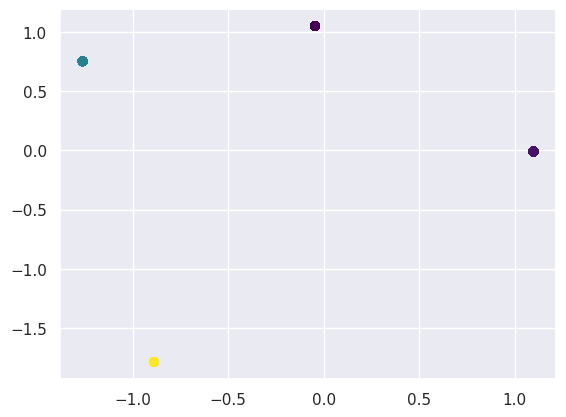

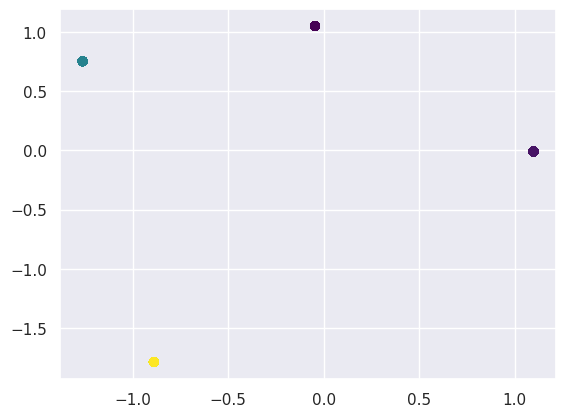

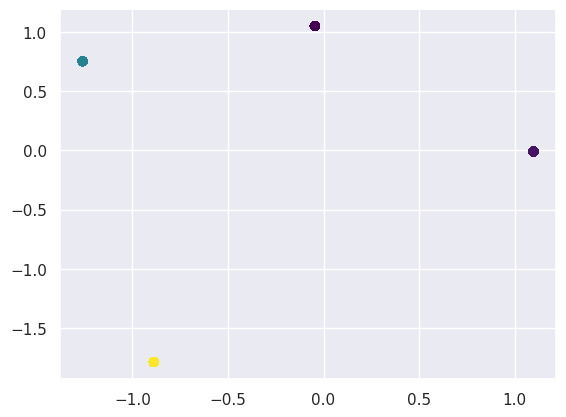

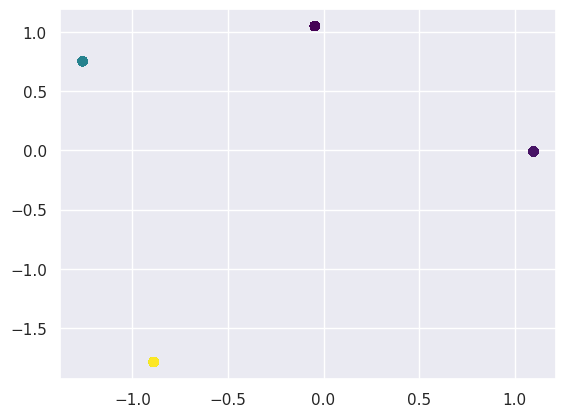

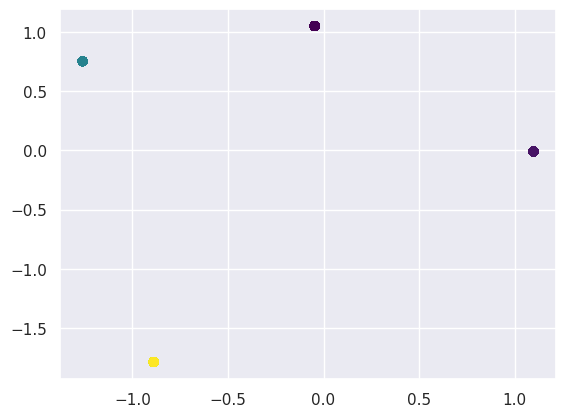

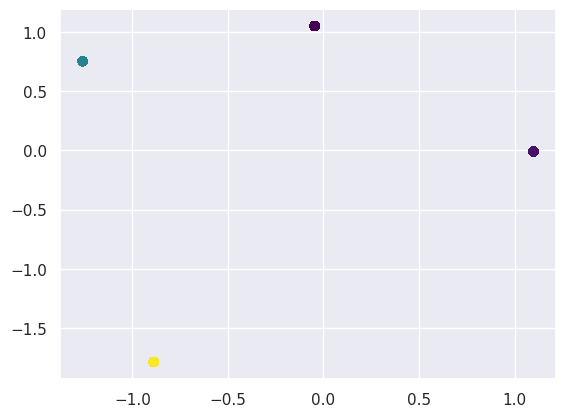

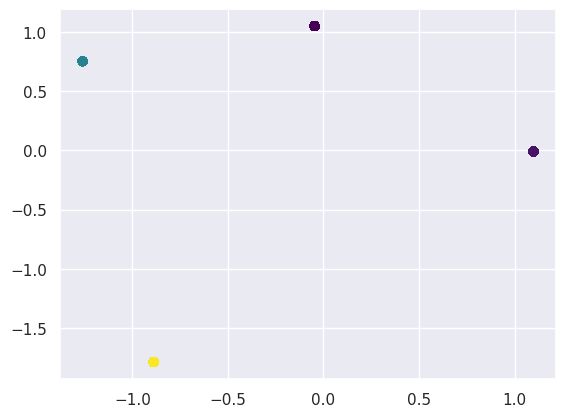

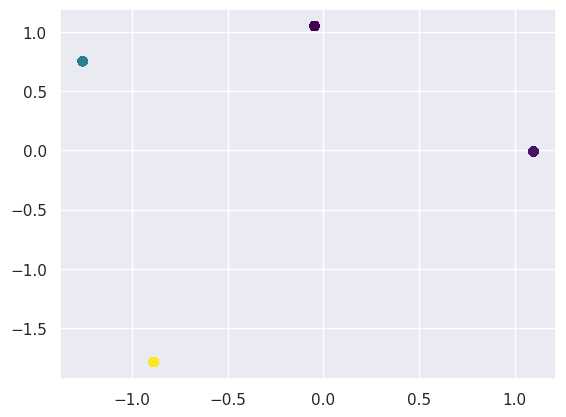

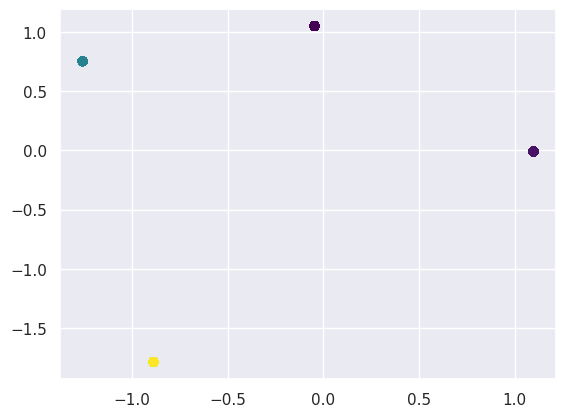

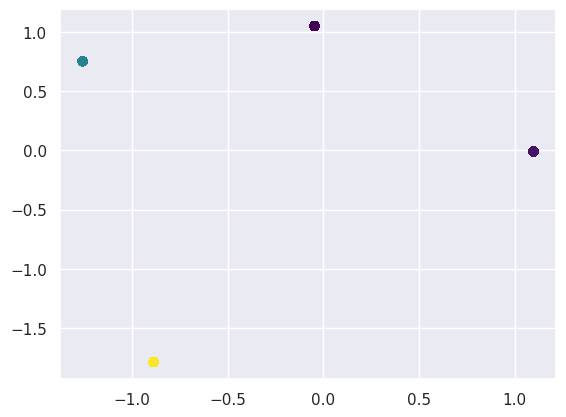

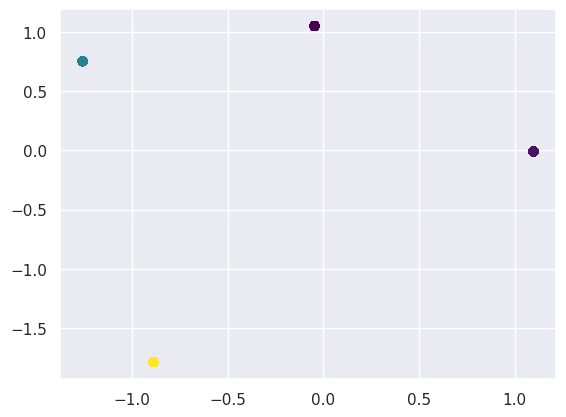

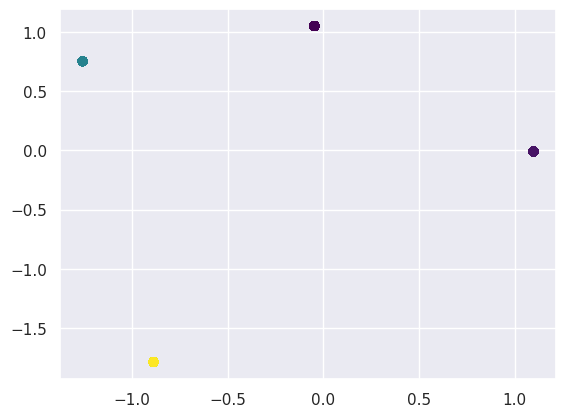

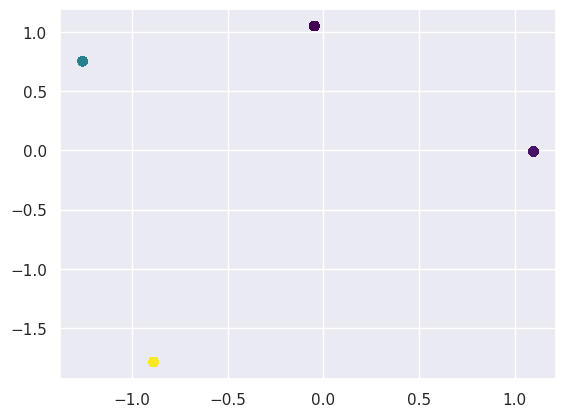

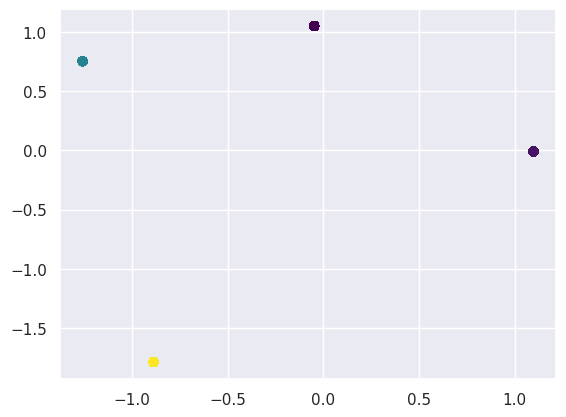

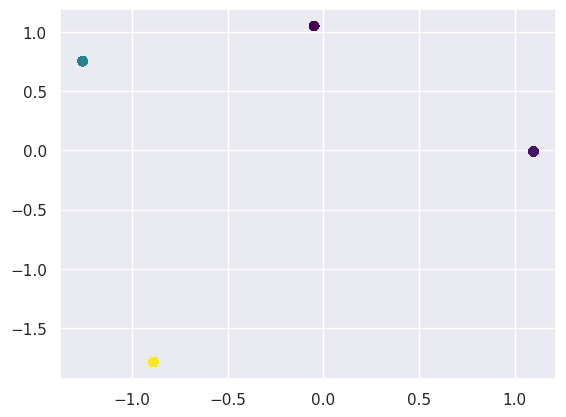

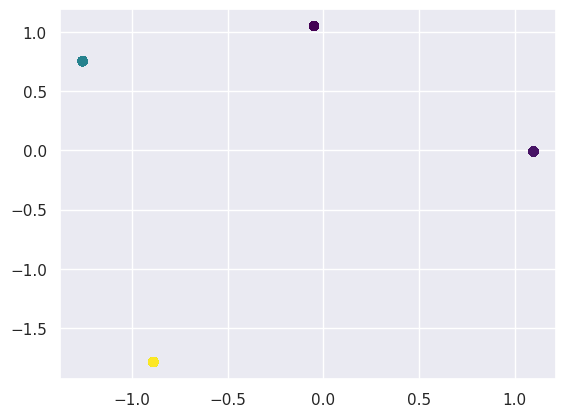

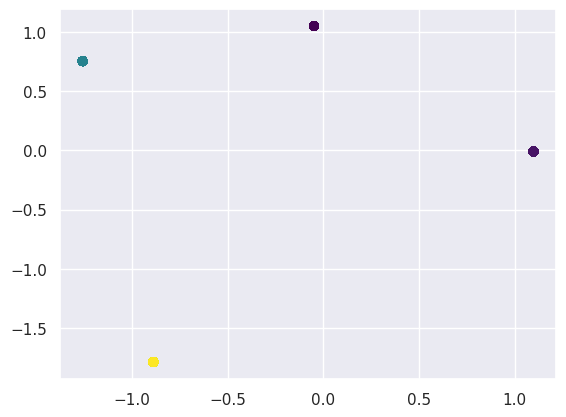

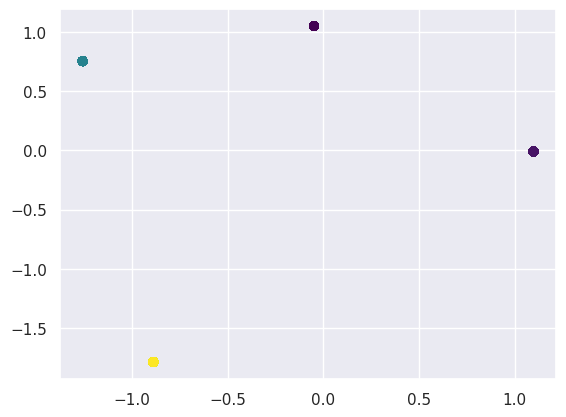

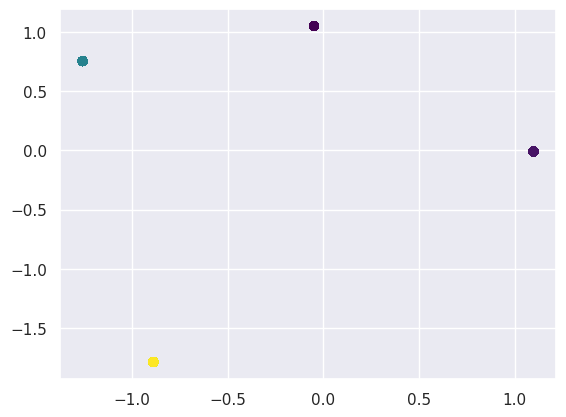

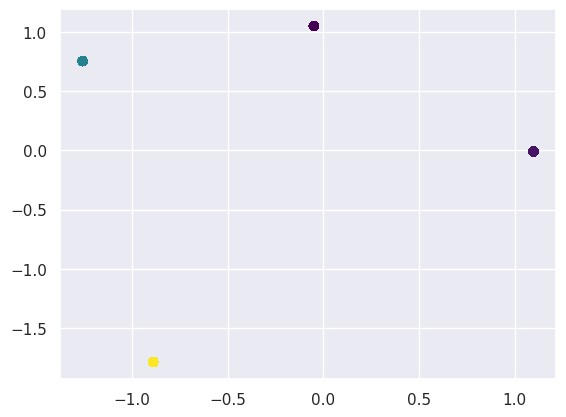

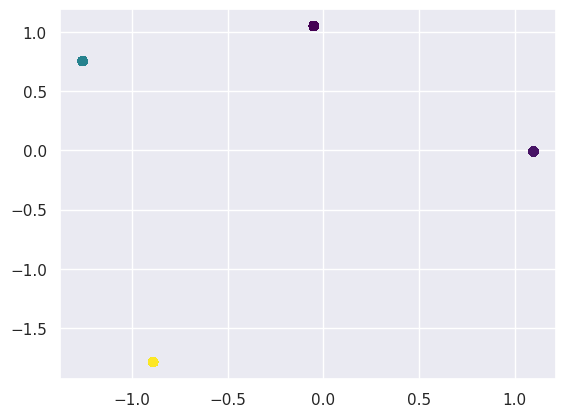

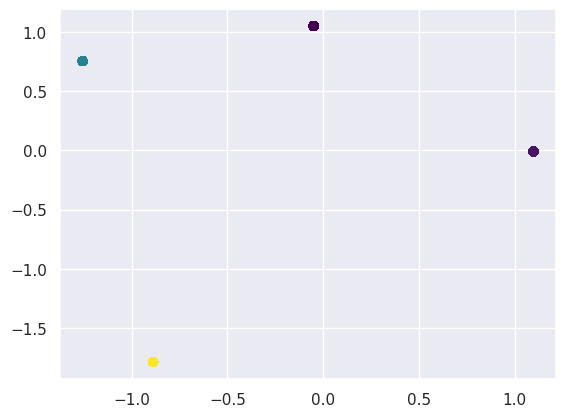

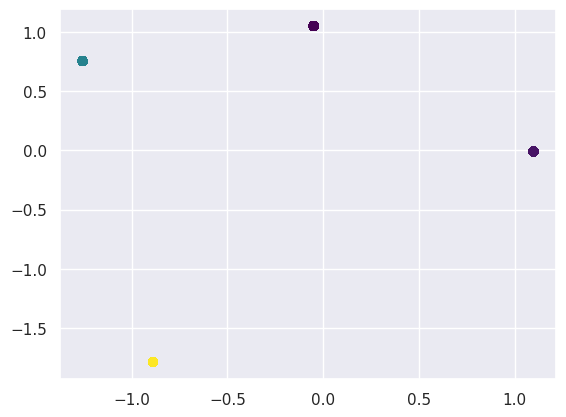

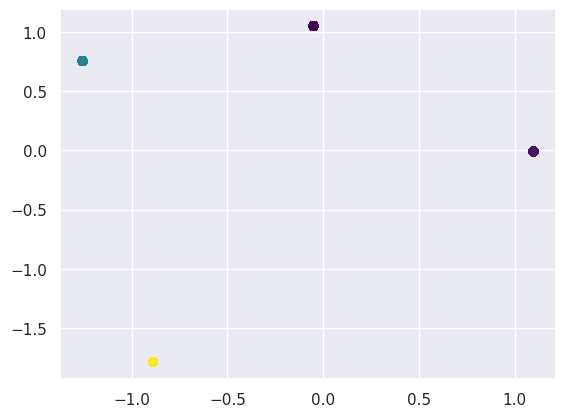

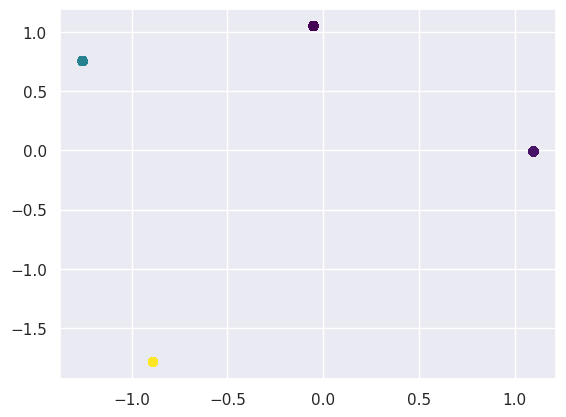

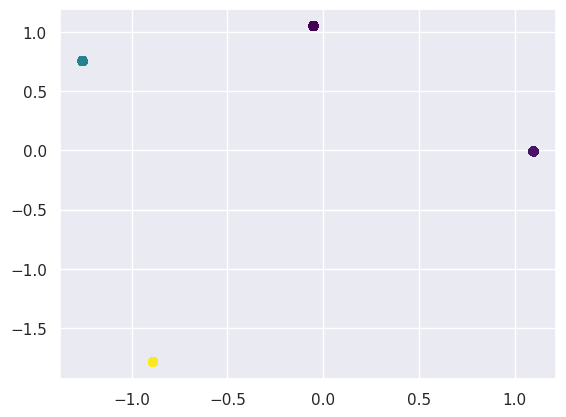

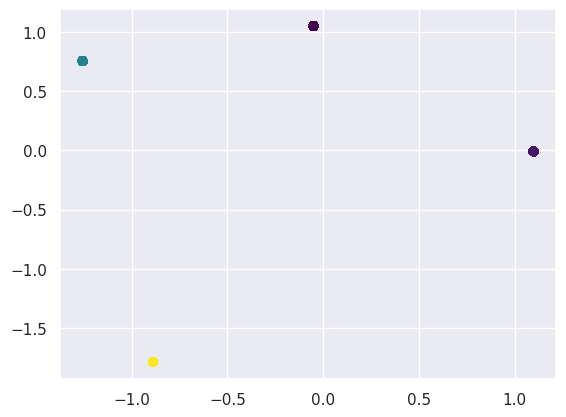

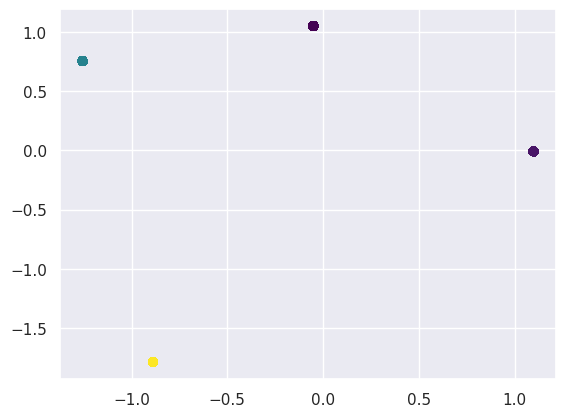

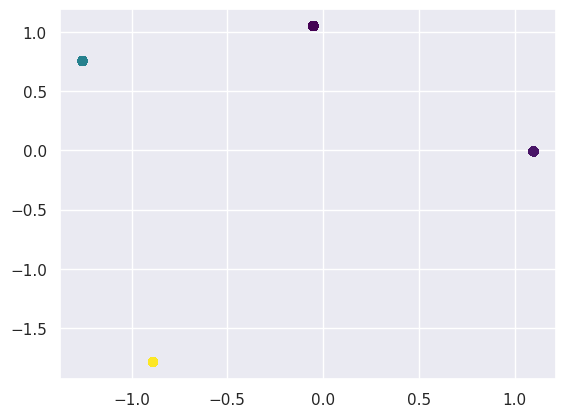

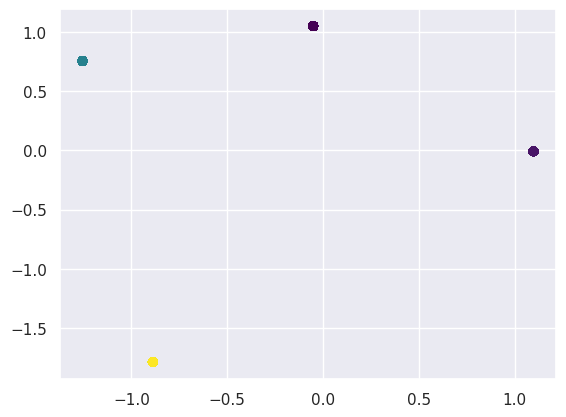

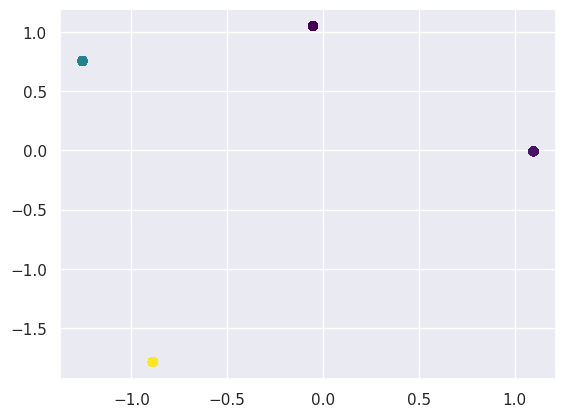

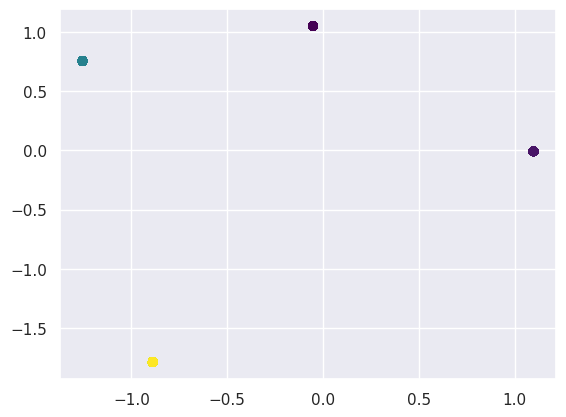

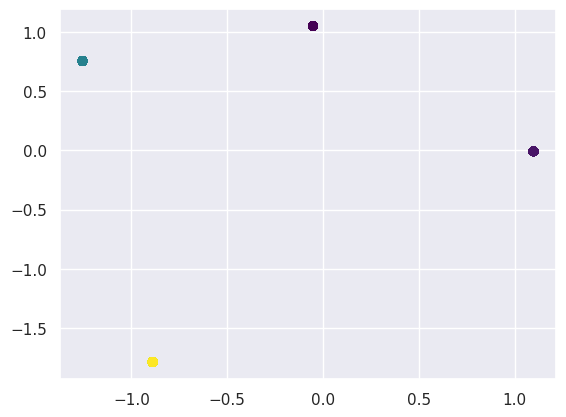

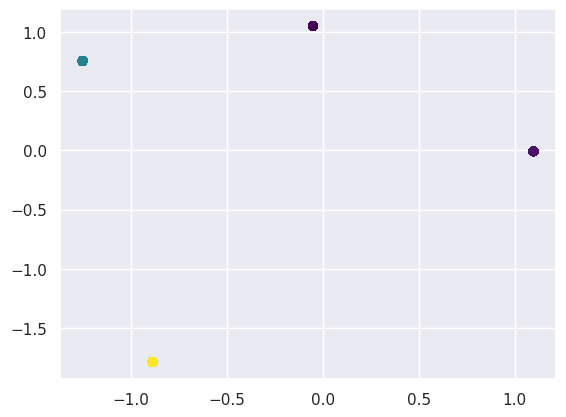

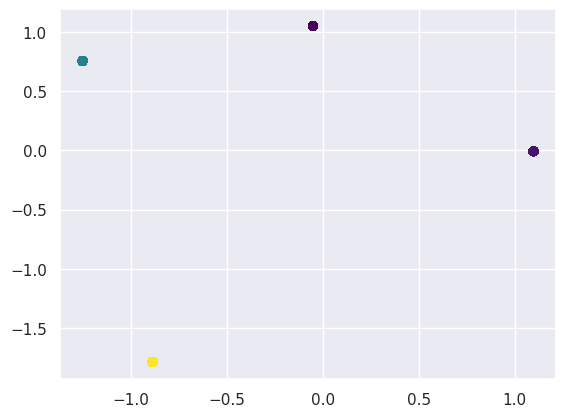

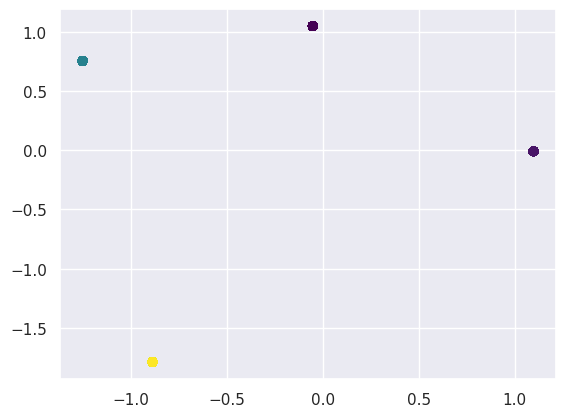

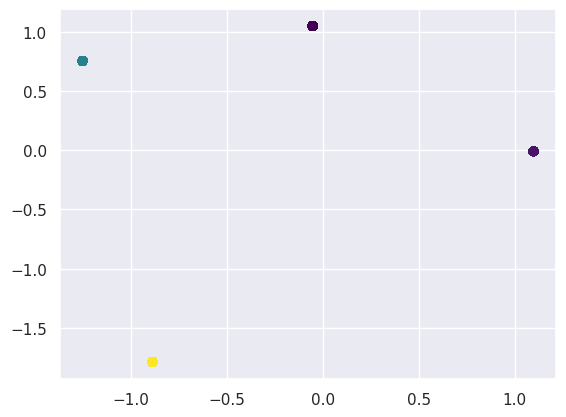

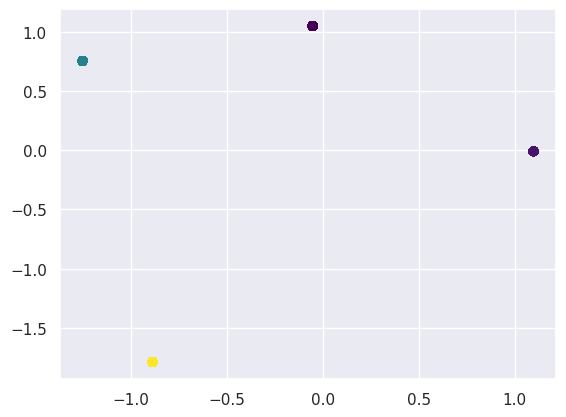

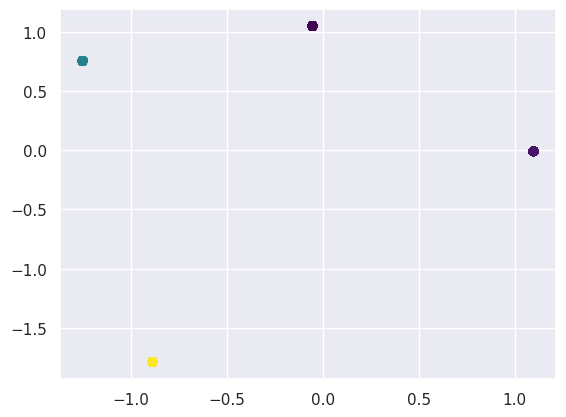

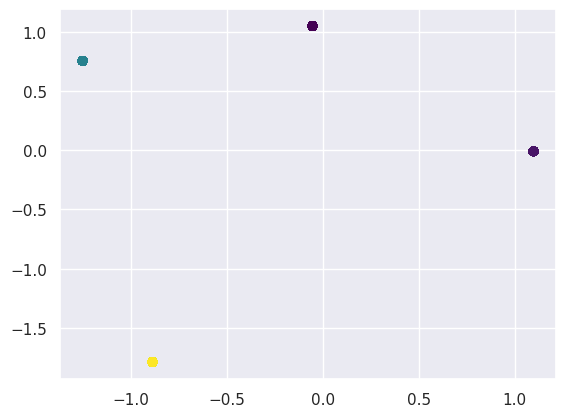

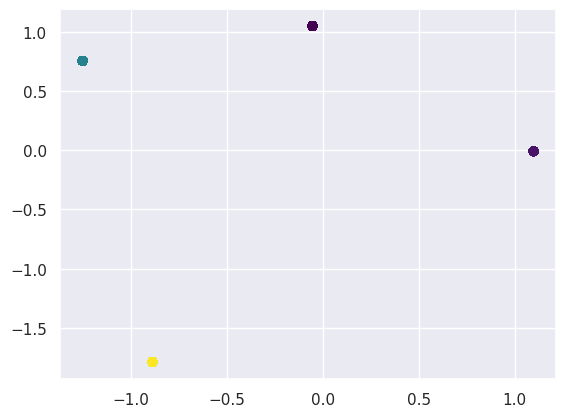

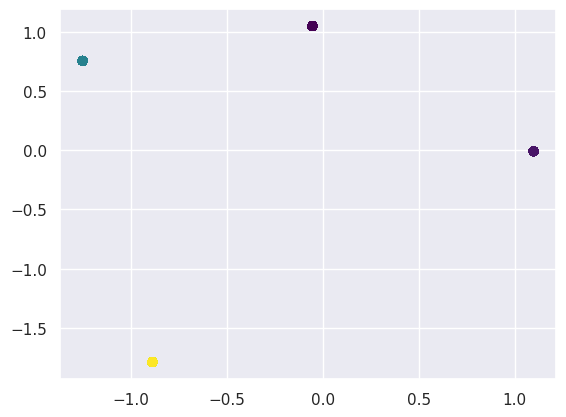

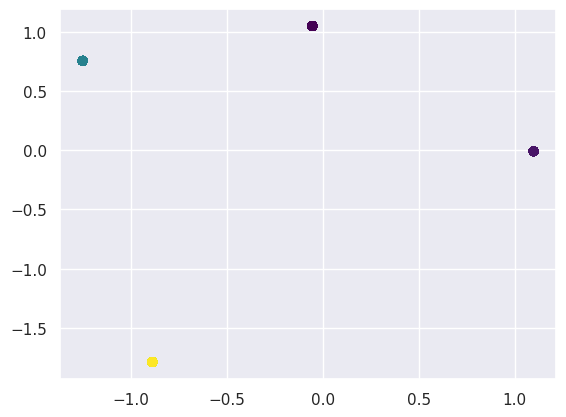

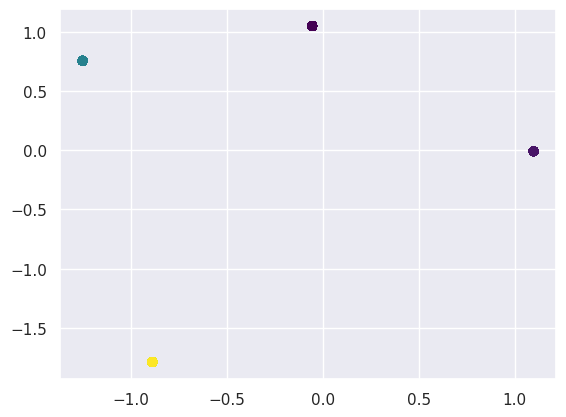

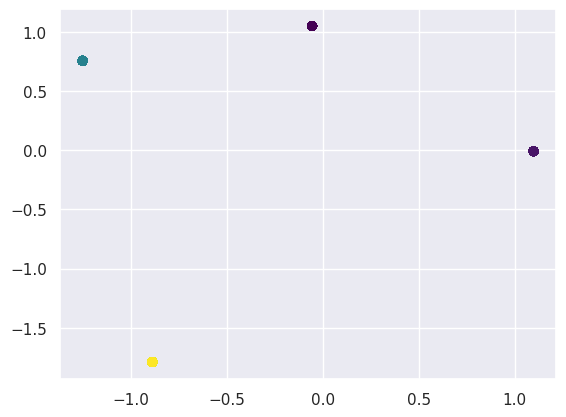

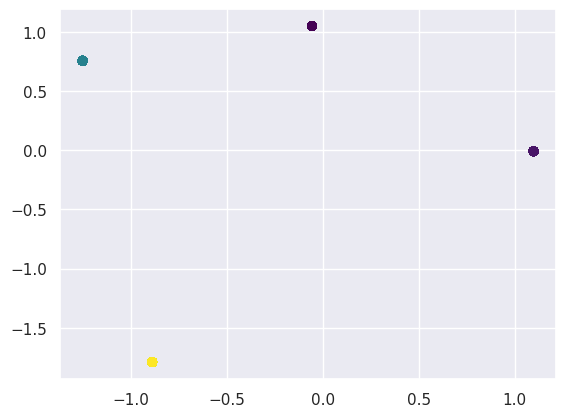

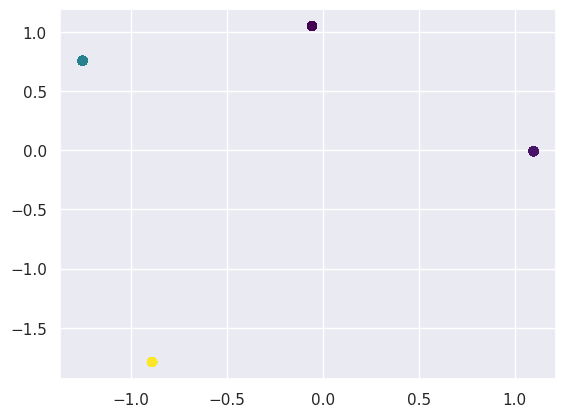

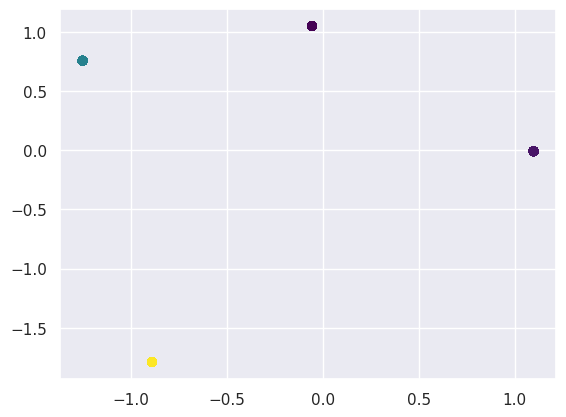

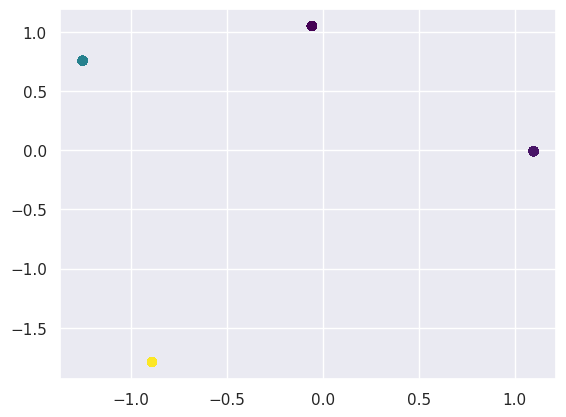

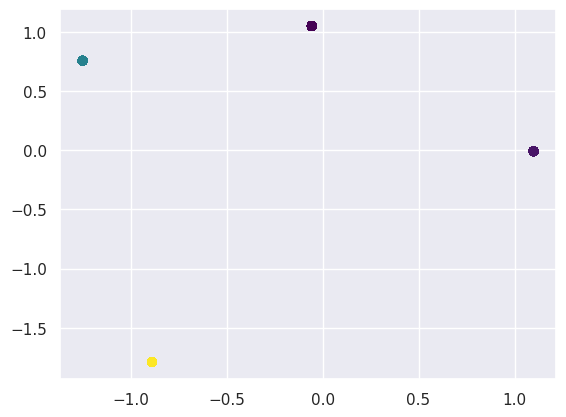

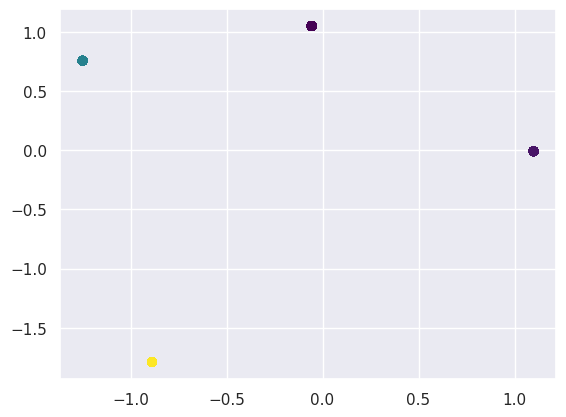

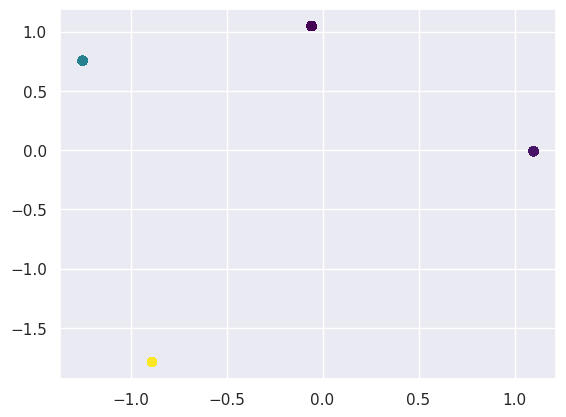

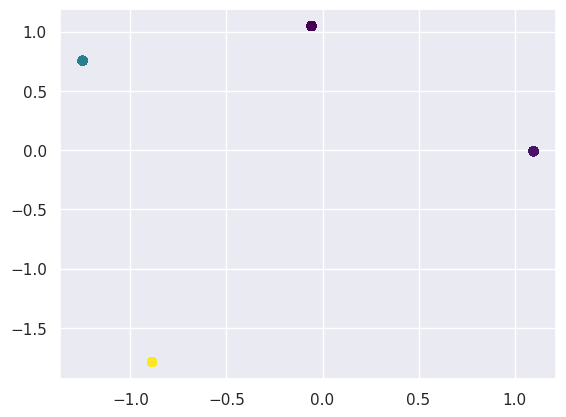

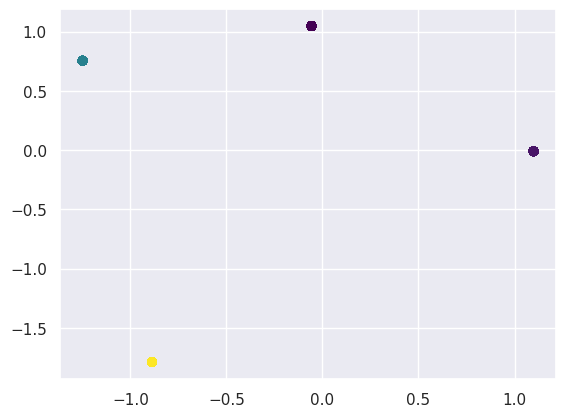

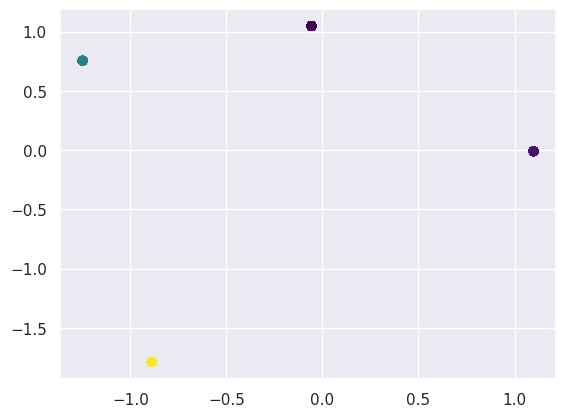

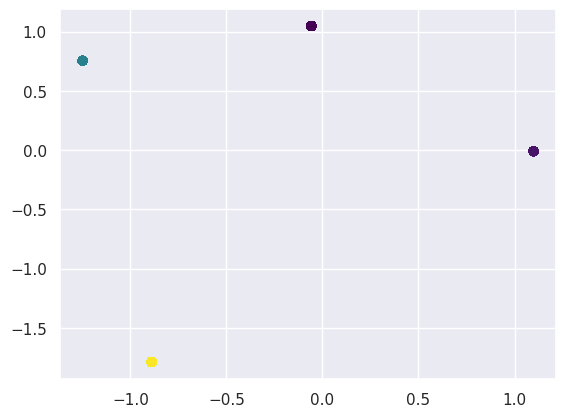

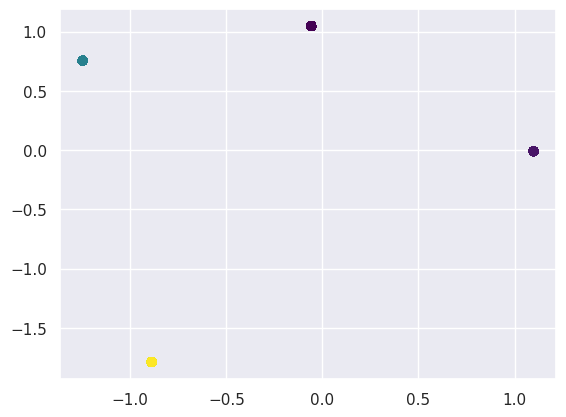

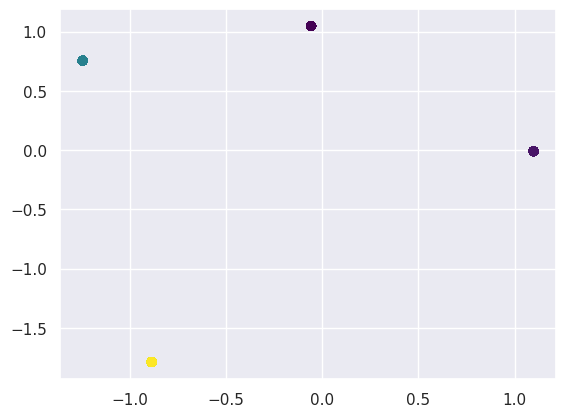

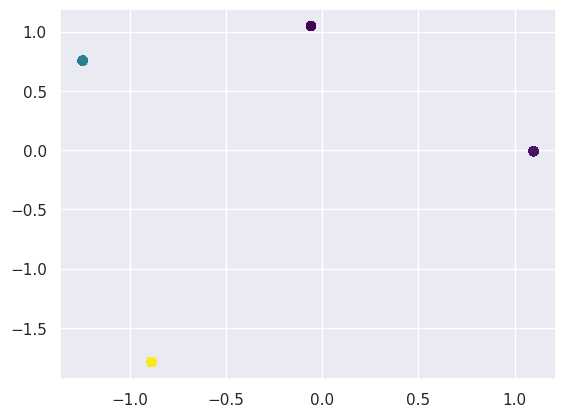

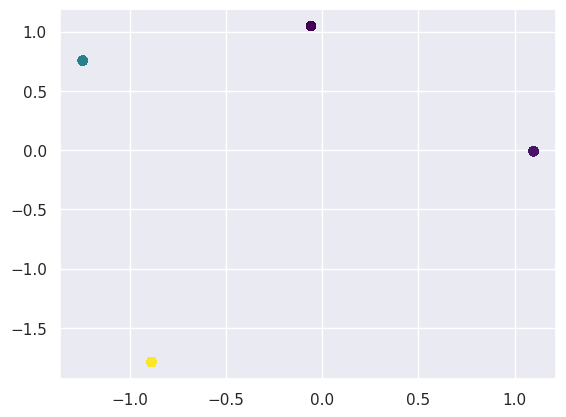

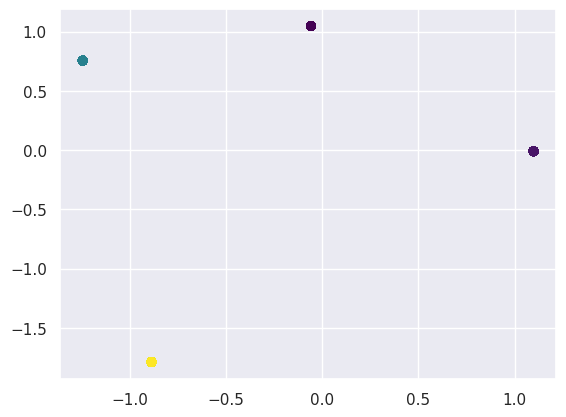

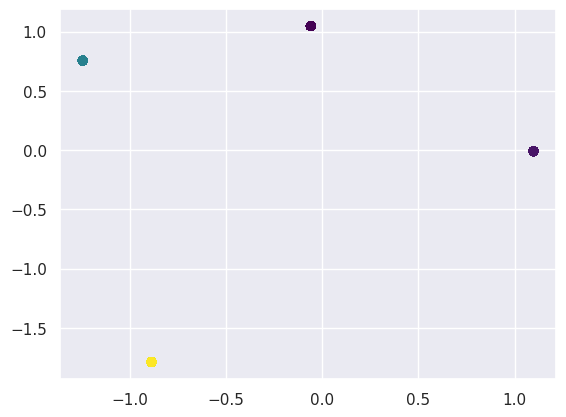

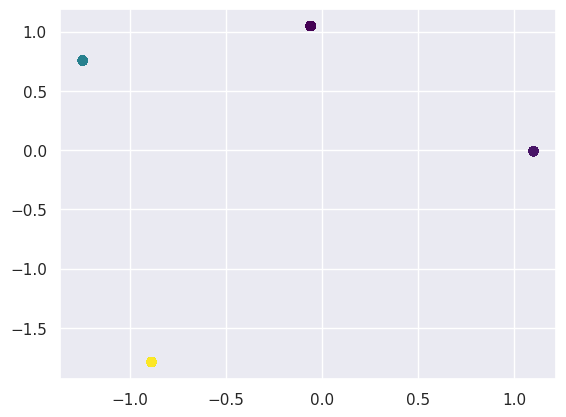

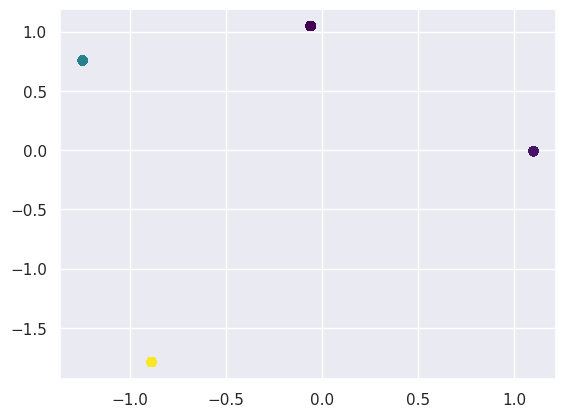

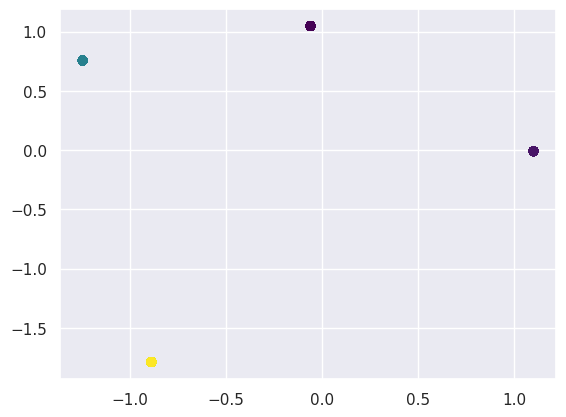

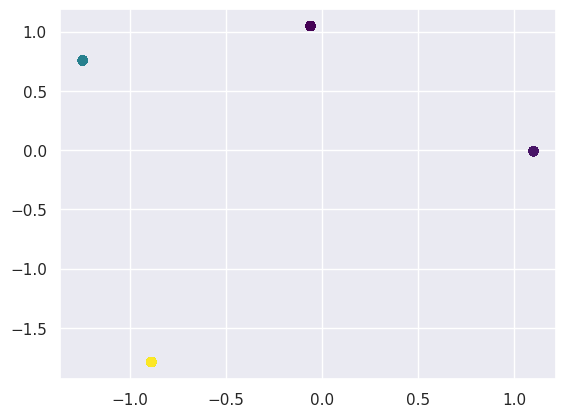

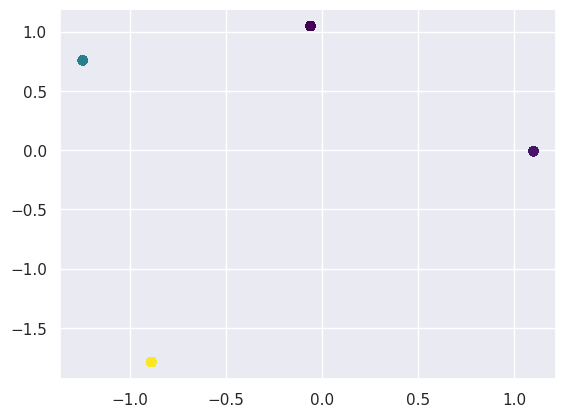

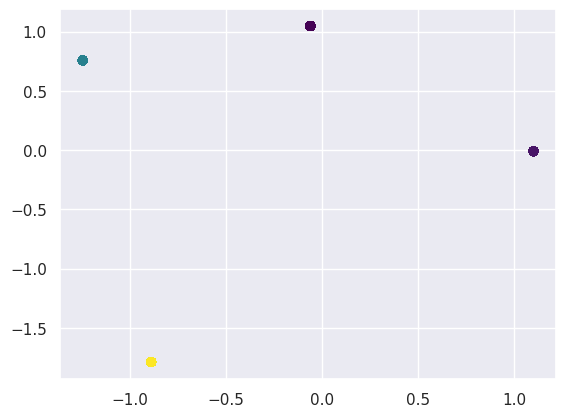

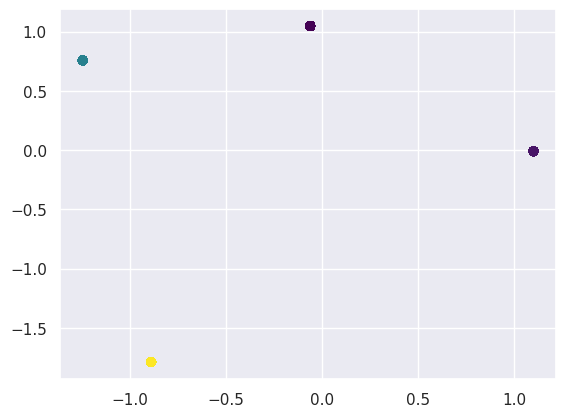

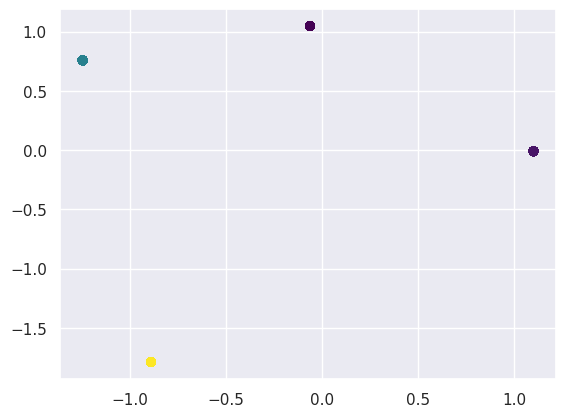

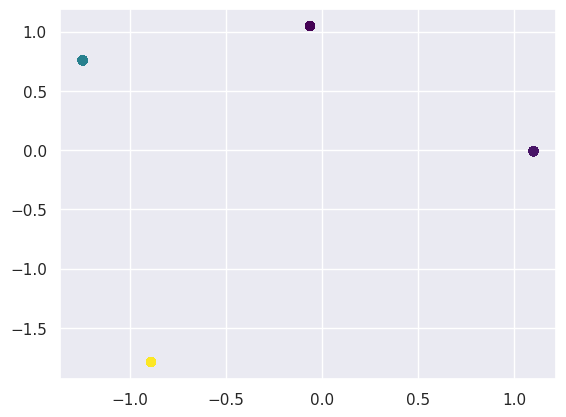

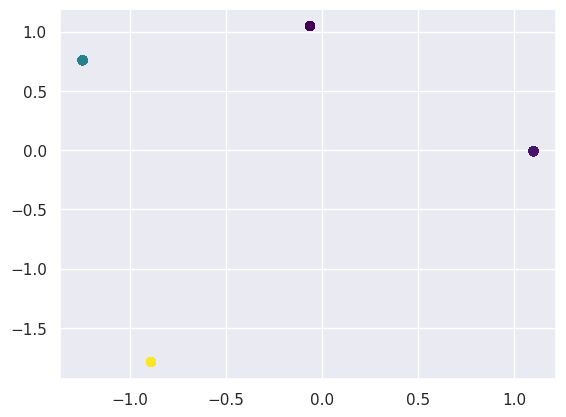

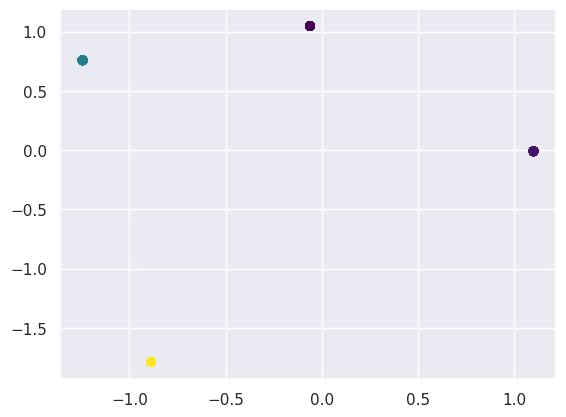

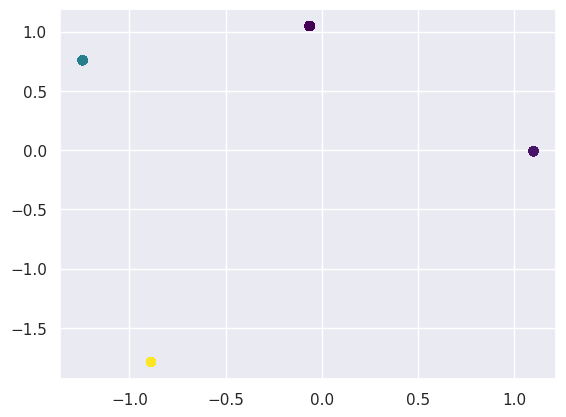

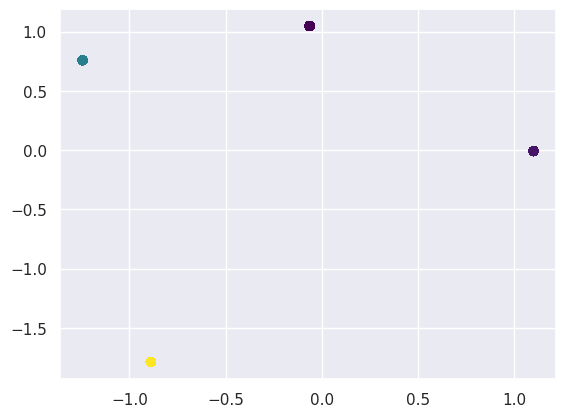

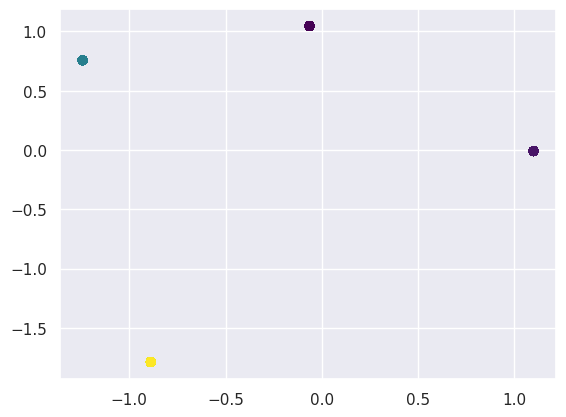

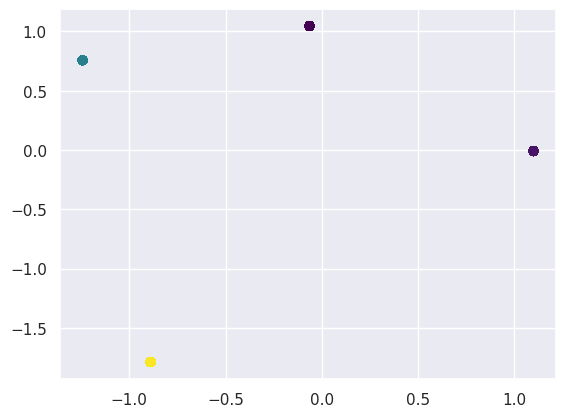

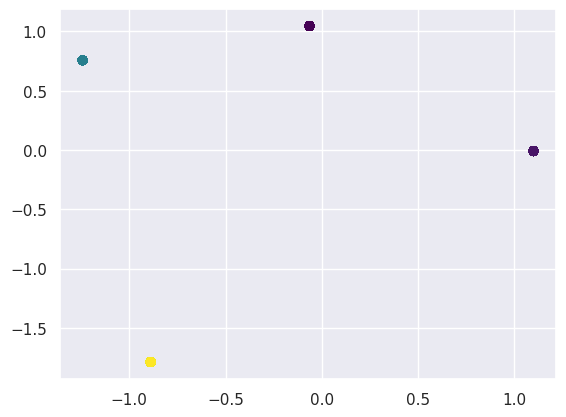

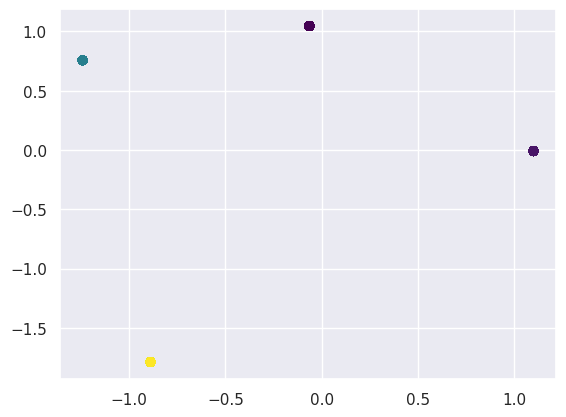

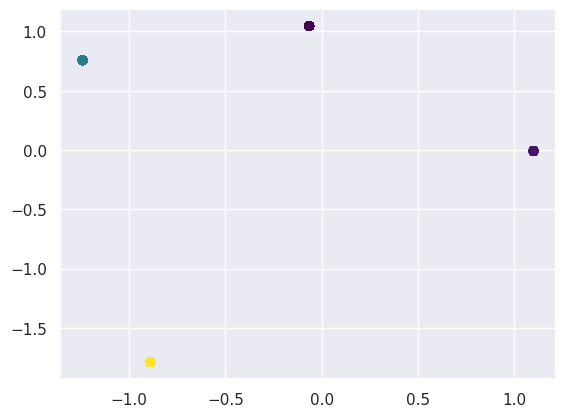

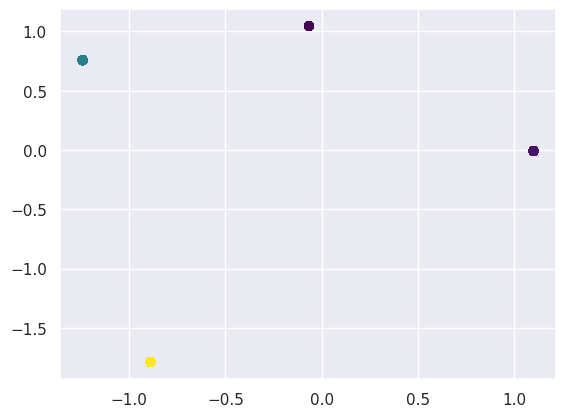

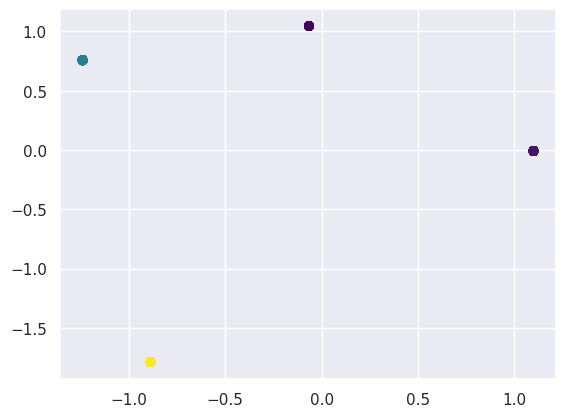

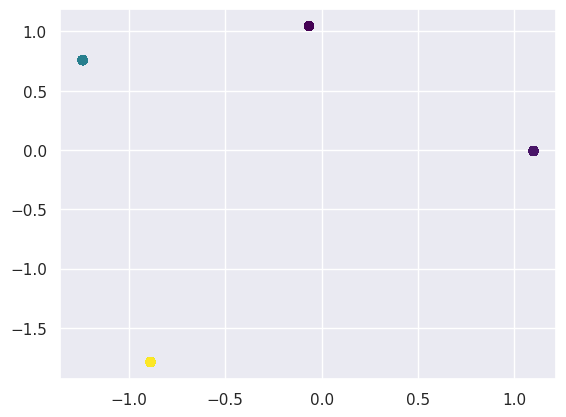

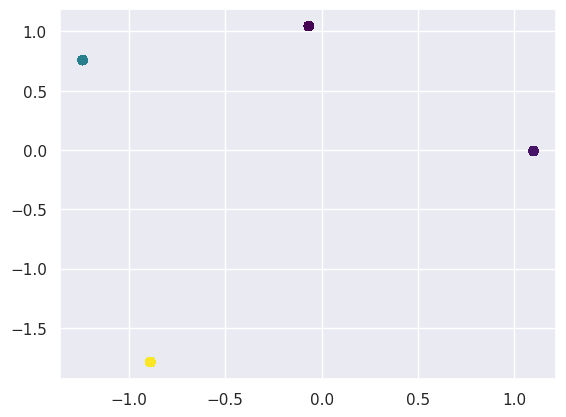

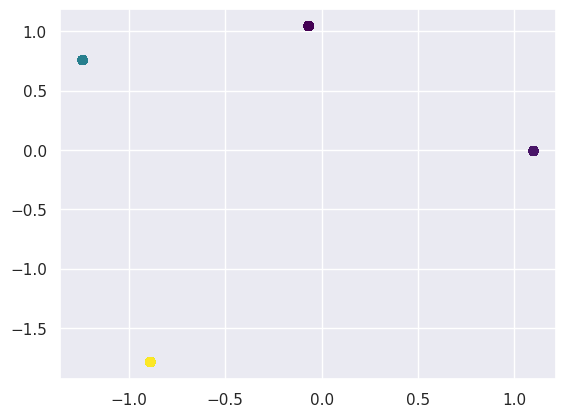

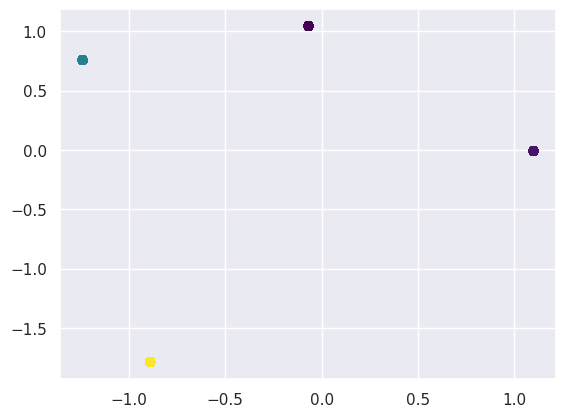

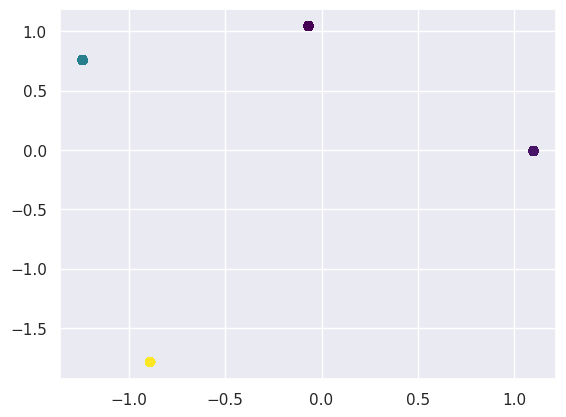

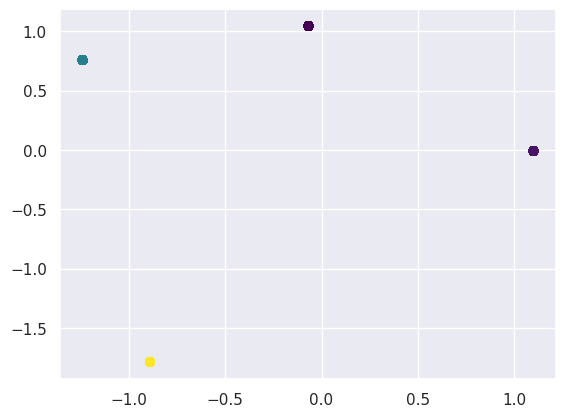

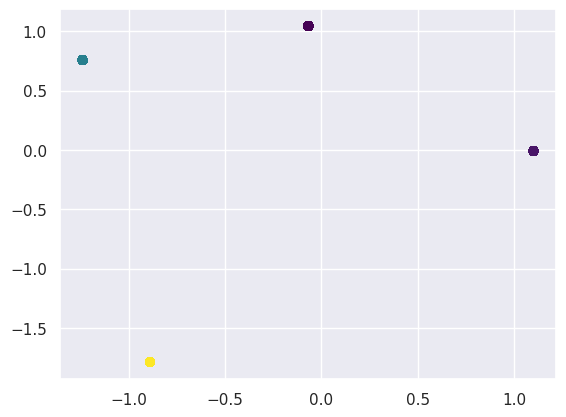

In [29]:
meanshift = MeanShift()
meanshift.fit(X_train);


# PCA

Pense em um livro grande...

<center><img src='https://drive.google.com/uc?export=view&id=1sWQKalXLKWKXpkC7DFowivpvQpCgUehn' width="400"></center>


O PCA √© extremamente √∫til ao trabalhar com conjuntos de dados que possuem muitas caracter√≠sticas. Embora ter mais dados seja sempre √≥timo, √†s vezes eles t√™m tantas informa√ß√µes que ter√≠amos um tempo de treinamento de modelo incrivelmente longo e a maldi√ß√£o da dimensionalidade come√ßa a se tornar um problema.

<center><img src='https://drive.google.com/uc?export=view&id=14CMKgvh1VkHwxUyhvONq1TBjXT_FwhgY' width="400"></center>

Intuitivamente, PCA √© um m√©todo de transforma√ß√£o que converte uma matriz de dados com caracter√≠sticas possivelmente correlacionadas em um conjunto de vari√°veis linearmente n√£o correlacionadas, chamadas componentes principais. Cada componente principal √© uma combina√ß√£o linear dos dados originais.



## Ideia por tr√°s do PCA


> *The central idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of a large number of interrelated variables, while retaining as much as possible of the variation present in the data set. This is achieved by transforming to a new set of variables,
the principal components (PCs), which are uncorrelated, and which are ordered so that the first few retain most of the variation present in all of the original variables.* Principal Component Analysis, de  I.T. Jolliffe, Springer Science & Business Media, 5th edition, 2002.

Redu√ß√£o de dimensionalidade significa projetar dados em um espa√ßo de menor dimens√£o, o que facilita a an√°lise e a visualiza√ß√£o de dados. No entanto, a redu√ß√£o da dimens√£o requer uma troca entre precis√£o (altas dimens√µes) e interpretabilidade (baixas dimens√µes).

Se encontrarmos uma maneira de eliminarmos dimens√µes redundantes ou com pouca ou nenhuma informa√ß√£o, tornaremos nossos dados mais *leg√≠veis*. Os dados se tornam ileg√≠veis devido a dois poss√≠veis conflitos: ru√≠do e redund√¢ncia.

O ru√≠do em qualquer conjunto de dados deve ser baixo ou ‚Äì n√£o importa a t√©cnica de an√°lise ‚Äì nenhuma informa√ß√£o sobre um sistema pode ser extra√≠da.

Al√©m disso, √© essencial identificar vari√°veis fortemente dependentes porque elas cont√™m informa√ß√µes viesadas e redundantes, o que reduz o desempenho geral do modelo.

Portanto, a ideia principal da an√°lise de componentes principais (PCA) √© encontrar padr√µes e correla√ß√µes entre diferentes caracter√≠sticas do conjunto de dados de modo que este possa ser transformado em um conjunto de dados de dimens√£o significantemente menor sem perda de informa√ß√£o importante!

## O poder da vari√¢ncia

O PCA pode entender qual parte de nossos dados √© importante? Podemos quantificar matematicamente a quantidade de informa√ß√£o incorporada nos dados?

Bem, a varia√ß√£o pode.
__Quanto maior a varia√ß√£o, mais informa√ß√µes. Vice-versa.__

## Breve Recap

Para uma determinada vari√°vel, a quantidade de informa√ß√£o nela √© proporcional √† sua vari√¢ncia. Simples de perceber, pois se todos os dados s√£o constantes, sua vari√¢ncia √© zero e a informa√ß√£o que aquele dado nos fornece tamb√©m √© nula. Defina, por exemplo, na ilustra√ß√£o abaixo, com imagens emba√ßadas de seus amigos, em qual dos dois casos a tabela fornece informa√ß√µes importantes. Voc√™ deve concordar que √© aquela em que h√° maior vari√¢ncia na altura dos amigos...

<center><img src='https://drive.google.com/uc?export=view&id=1OlPeYgiWQQZeRvUyvv7MEzBL0WIeoWKu' width="600"></center>

Se tivermos dados de muitas dimens√µes, podemos reduzir sua dimensionalidade projetando-os ao longo de dire√ß√µes espec√≠ficas, de modo que a vari√¢ncia na dire√ß√£o escolhida seja maximizada, para preservar o m√°ximo de informa√ß√µes contidas nos dados.

√â exatamente o papel do PCA. A an√°lise de componentes principais √© um m√©todo para encontrar dire√ß√µes ortogonais de vari√¢ncia m√°xima nos dados e projetar os dados nessas dire√ß√µes.

Qual √© essa dire√ß√£o de m√°xima varia√ß√£o? Para isso devemos recordar as defini√ß√µes de vari√¢ncia e covari√¢ncia.

Basicamente, vari√¢ncia mede a varia√ß√£o de uma √∫nica vari√°vel aleat√≥ria (como a altura de uma pessoa em uma popula√ß√£o), enquanto covari√¢ncia √© uma medida de quanto duas vari√°veis aleat√≥rias variam juntas (como a altura e peso de uma pessoa em uma popula√ß√£o).


A vari√¢ncia e a covari√¢ncia s√£o afetadas pela *dissemina√ß√£o* dos dados em torno da m√©dia. Mas o que a varia√ß√£o e a covari√¢ncia significam?

Al√©m disso, qual a diferen√ßa entre covari√¢ncia e correla√ß√£o?

### Vari√¢ncia


A vari√¢ncia √© simplesmente uma medida da dispers√£o em torno da m√©dia - se as amostras de dados forem muito diferentes umas da outra, a vari√¢ncia ser√° alta e vice-versa. Dado um conjunto de dados $\mathbf x$, estes apresentam um valor *m√©dio* $\bar x$ e uma *varia√ß√£o* sobre essa m√©dia $s_x^2$. Tecnicamente **a vari√¢ncia √© a m√©dia do quadrado diferen√ßas dos dados com rela√ß√£o √† m√©dia**,

$$s_x^2 =  {\rm Var} (\mathbf x) = {1 \over m-1} \sum_ {j = 1}^m (x_j- \bar x)^2, $$

Pense na vari√¢ncia como a "propaga√ß√£o" ou "extens√£o" dos dados, sobre algum eixo espec√≠fico.

A ressalva √© que estamos dividindo por $ m-1 $ em vez de $ m $, ent√£o, n√£o estamos calculando exatamente uma m√©dia. Para grandes conjuntos de dados, isso n√£o faz diferen√ßa, mas para um pequeno n√∫mero de pontos de dados, $m-1$ √© introduzido como forma de reduzir o vi√©s de amostra.

Importante ressaltar que a vari√¢ncia calculada em python com o comando `np.var`, por default, refere-se √† popula√ß√£o, com a op√ß√£o `ddof=0`, e, portanto, a f√≥rmula acima de $s_x^2$ √© divida por $m$ e n√£o por $m-1$. Para calcular a vari√¢ncia de uma amostra, deve-se usar a op√ß√£o `ddof=1`.


#### Exemplo

Os dados abaixo referem-se ao peso e altura de 4 pessoas. Monte a matriz $\mathbf X$ e calcule a matriz de covari√¢ncia usando as f√≥rmulas que aprendemos.

\begin{array}{c} \hline
Pessoa & Altura [cm] & Peso [kg] \\ \hline
1 & 149 & 48 \\
2 & 155 & 52 \\
3 & 163 & 57 \\
4 & 177 & 68 \\ \hline
\end{array}



Veka que, no exemplo, o n√∫mero de caracter√≠sticas √© $n=2$ (altura, peso) e o n√∫mero de observa√ß√µes √© $m=4$. Portanto, a matriz $\mathbf X$ ter√° dimens√£o $m \times n$, isto √©, $4 \times 2$.

In [30]:
X = np.array([[149,48],[155,52],[163,57],[177,68]])
print(X)
print(X.shape)

print("M√©dia Altura =",np.mean(X,axis=0)[0])
print("M√©dia Peso =",np.mean(X,axis=0)[1])

print("Vari√¢ncia Altura =",np.var(X, axis = 0, ddof=1)[0])
print("Vari√¢ncia Peso =",np.var(X, axis = 0, ddof=1)[1])


[[149  48]
 [155  52]
 [163  57]
 [177  68]]
(4, 2)
M√©dia Altura = 161.0
M√©dia Peso = 56.25
Vari√¢ncia Altura = 146.66666666666666
Vari√¢ncia Peso = 74.91666666666667


### Covari√¢ncia e correla√ß√£o

No exemplo anterior, quando $x_1$ (altura) varia, $x_2$ (peso) praticamente varia junto. Ent√£o $x_2$ √© *covariante* com $x_1$. A covari√¢ncia indica o n√≠vel em que duas vari√°veis ‚Äã‚Äãvariam juntas,
$$
{\rm Cov} (\mathbf{x}_1,\mathbf{x}_2) = s_{12}= {1 \over m-1} \sum_{j = 1}^m (x_{j1} - \bar {x}_1) (x_{j2} - \bar {x}_2),
$$
onde $\bar {x}_1$ e $\bar {x}_2$ s√£o as m√©dias das componentes $\mathbf{x}_1$ e $\mathbf{x}_2$ dos dados, respectivamente. Ressalta-se novamente que dividimos por $m-1 $ em vez de $m$, para reduzir o  vi√©s de pequenas amostras.

Uma covari√¢ncia positiva, como no exemplo acima, diz que as duas vari√°veis *andam juntas*, isto √©, em m√©dia, quando $\mathbf{x}_1$ cresce $\mathbf{x}_2$ tamb√©m cresce, e vice-versa. Se a covari√¢ncia for negativa, ent√£o, quando uma vari√°vel est√° crescendo, a outra vari√°vel, para a mesma amostra, est√° diminuindo.

Ainda, se dividirmos covari√¢ncia pelos dois desvios padr√£o, obteremos uma medida sem dimens√£o denominada coeficiente de correla√ß√£o:
$$
r_{12} = \frac{{\rm Cov} (\mathbf{x}_1,\mathbf{x}_2)}{{s_1} s_{2}},
$$
onde $s_1$ e $s_2$ s√£o o desvio padr√£o (ra√≠z quadrada da vari√¢ncia) da vari√°vel $\mathbf{x}_1$ e da vari√°vel  $\mathbf{x}_2$, respectivamente.

O coeficiente de correla√ß√£o $r_{12}$ √© usado para medir *a for√ßa* dessa correla√ß√£o e pode assumir valores entre $+1$ e $-1$. Valor $r=+1$ indica uma correla√ß√£o positiva perfeita entre vari√°veis. Uma correla√ß√£o negativa perfeita leva ao valor de $r=-1$. Valor $r=0$ √© quando ambas as vari√°veis s√£o completamente independentes uma da outra.


Generalizando, dada uma matriz dos dados de entrada $\mathbf X_{m,n}$, onde cada linha √© um conjunto de observa√ß√µes das vari√°veis,
\begin{equation}
 \mathbf x_i =
\begin{pmatrix}
x_{i1} & x_{i2} & \cdots & x_{in}
\end{pmatrix}, \quad i=1,\cdots,m
\end{equation}
e cada coluna representa v√°rias medi√ß√µes da mesma vari√°vel.
\begin{equation}
  \hat{\mathbf x}_i =
\begin{pmatrix}
x_{1i} \\
 x_{2i}\\
  \cdots \\
   x_{mi}
\end{pmatrix}, \quad i=1,\cdots,n
\end{equation}


Dessa forma, as componentes $s_{jk}$ $(j,k = 1,\cdots,n)$ da matriz de covari√¢ncia $\mathbf S$ podem ser definidas como,

$$
s_{jk} = {\rm Cov} (\mathbf x_j,\mathbf x_k) = {1 \over m-1} \sum_{i = 1}^m (x_{ij} - \bar{x}_j) (x_{ik} - \bar{x}_k), \tag{1}
$$

Verifique que as entradas diagonais da matriz de covari√¢ncia $\mathbf S$ s√£o as vari√¢ncias e as entradas fora da diagonal s√£o as covari√¢ncias. Como a ordem das vari√°veis n√£o importa ao calcular a covari√¢ncia, a matriz ser√° *sim√©trica* e, portanto, *quadrada*.

Outra nota√ß√£o bastante √∫til √©,

$$
\mathbf S = \frac{1}{m-1} \sum^{m}_{i=1}{\left( {\mathbf x}_i - \mathbf{\bar{x}} \right)^T\left({\mathbf x}_i-\mathbf{\bar{x}}\right)}, \tag{2}
$$

onde $\bar{\mathbf x}^T = \left[ \bar{x}_1 \quad \bar{x}_2 \quad  \cdots \quad \bar{x}_n\right]$, de modo que $\bar{x}_j = {1 \over m}\sum_{i=1}^m x_{ij}$ √© a m√©dia da vari√°vel $j$.

Pode-se reescrever a matriz de covari√¢ncia como,

\begin{equation}
\mathbf S
= {1 \over {m-1}} \left[\mathbf X_c^T \mathbf X_c\right], \tag{3}
\end{equation}
para $X_c = \mathbf X - \mathbf 1_m  \bar{\mathbf x}^T$, onde $\mathbf 1_m^T = \begin{bmatrix}1 & 1 & \cdots& 1\end{bmatrix}$ tem dimens√£o $m \times 1$.

`Numpy` facilita muito o c√°lculo da covari√¢ncia. Por√©m, ressalta-se que, a princ√≠pio, calculamos covari√¢ncia em amostras, e n√£o na popula√ß√£o completa. Portanto, o default do c√°lculo da matriz de covari√¢ncia √© `np.cov(X.T, bias = False)`. Para obter a covari√¢ncia da popula√ß√£o (com base em $m$), voc√™ precisar√° definir o vi√©s como `bias=True` no c√≥digo.

Ainda, `Numpy` quer vari√°veis (caracter√≠sticas) ao longo de linhas, em vez de colunas... Portanto, a matriz entra como transposta para c√°lculo da vari√¢ncia. Outra alternativa √© usar o par√¢metro `rowvar`. Se  `rowvar` for `True` (padr√£o), cada linha representa uma vari√°vel, com observa√ß√µes nas colunas. Caso contr√°rio, a rela√ß√£o √© transposta: cada coluna representa uma vari√°vel, enquanto as linhas cont√™m observa√ß√µes.

#### Continua√ß√£o do Exemplo

Calcule, para o exemplo anterior, calcule a matriz de covari√¢ncia e de correla√ß√£o.



In [31]:
#Reescrevendo o vetor X e recalculando as m√©dias:
X = np.array([[149,48],[155,52],[163,57],[177,68]])
xbar = np.mean(X, axis = 0) #m√©dia das colunas de X
m,n = X.shape

#Gabarito:
print('Matriz de covari√¢ncia via Numpy:\n')
cov_x = np.cov(X.T)
print(pd.DataFrame([[cov_x[0][0], cov_x[0][1]],[cov_x[1][0], cov_x[1][1]]], index =("x1", "x2"), columns=['x1', 'x2']))
#print(np.cov(X,rowvar = False),'\n') # alternativa


Matriz de covari√¢ncia via Numpy:

            x1          x2
x1  146.666667  104.666667
x2  104.666667   74.916667


A matriz de correla√ß√£o √© calculada atrav√©s do comando,
```
cor = np.corrcoef(X.T)
```



In [32]:
print('Matriz de correla√ß√£o via Numpy:\n')
cor = np.corrcoef(X.T)
print(pd.DataFrame([[cor[0][0], cor[0][1]],[cor[1][0], cor[1][1]]], index =("x1", "x2"), columns=['x1', 'x2']))


Matriz de correla√ß√£o via Numpy:

          x1        x2
x1  1.000000  0.998512
x2  0.998512  1.000000


Agora, recalcule a matriz de covari√¢ncia usando as f√≥rmulas (1), (2) e (3), definidas acima.

In [33]:
## Usando a f√≥rmula (1):
print('Primeira f√≥rmula:')
S1 = np.zeros((n,n))

for j in range(n):
  for k in range(n):
    aux = 0.
    for i in range(m):
      xij = X[i][j]
      xik = X[i][k]
      xbarj = xbar[j]
      xbark = xbar[k]
      aux += (xij-xbarj)*(xik-xbark)
    S1[j][k] = aux/(m-1)
print(S1)


Primeira f√≥rmula:
[[146.66666667 104.66666667]
 [104.66666667  74.91666667]]


In [34]:
#@title Usando a f√≥rmula (2):
#
print('\n Segunda f√≥rmula:')
S2 = np.zeros((n,n))
xbar = np.mean(X, axis = 0)

for j in range(m):
  S2 += np.outer((X[j,:]-xbar),(X[j,:]-xbar))
S2 = S2/(m-1)
print(S2)



 Segunda f√≥rmula:
[[146.66666667 104.66666667]
 [104.66666667  74.91666667]]


In [35]:
#@title Usando a f√≥rmula (3):
#
print('\n Terceira f√≥rmula:')
S3 = np.zeros((n,n))
xbar = np.mean(X, axis = 0).T
Vet1 = np.ones((m,1))
Xc = X - np.outer(Vet1,xbar)
S3 = np.dot(Xc.T,Xc)/((m-1))
print(S3)



 Terceira f√≥rmula:
[[146.66666667 104.66666667]
 [104.66666667  74.91666667]]


#### Segundo exemplo
Neste segundo exemplo, `m` valores s√£o gerados de `x1` e `x2`, de modo que exista uma correla√ß√£o entre esses dados,
```
x2 = x1 + 5.8
```
afetada por um ru√≠do rand√¥mico.


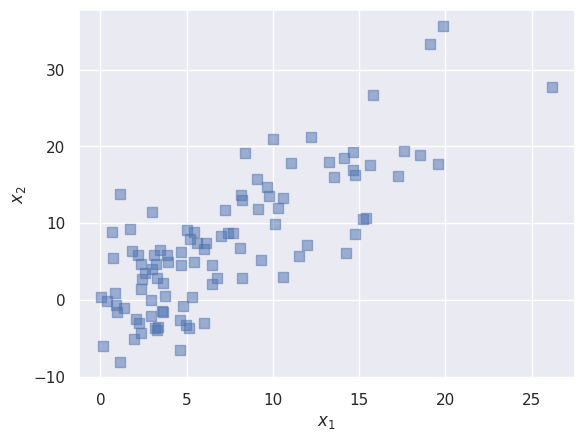

Vari√¢ncia x1 = 30.79428545290911
Vari√¢ncia x2 = 76.24938585795348


In [36]:
m = 100
np.random.seed(42)
x1 = 10.*np.sqrt((np.random.normal(size=m))**2)
x2 = x1 + 5.8*(np.random.normal(size=m))


plt.scatter(x1, x2, marker ="s", s = 50,alpha=0.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()
print("Vari√¢ncia x1 =",np.var(x1,ddof=1))
print("Vari√¢ncia x2 =",np.var(x2,ddof=1))


In [37]:
X = np.stack((x1,x2),axis=1)
print("As dimens√µes de X s√£o",X.shape)
cov = np.cov(X.T, bias = False)
print("Matriz de covari√¢ncia:")
pd.DataFrame([[cov[0][0], cov[0][1]],[cov[1][0], cov[1][1]]], index =("x1", "x2"), columns=['x1', 'x2'])


As dimens√µes de X s√£o (100, 2)
Matriz de covari√¢ncia:


x1         x2
x1  30.794285  38.224306
x2  38.224306  76.249386

A matriz de correla√ß√£o √© calculada atrav√©s do comando,
```
cor = np.corrcoef(X.T)
```




In [38]:
cov = np.cov(X.T)
print('Matriz de covari√¢ncia :')
print(pd.DataFrame([[cov[0][0], cov[0][1]],[cov[1][0], cov[1][1]]], index =("x1", "x2"), columns=['x1', 'x2']))

print('\n Matriz de correla√ß√£o :')
cor = np.corrcoef(X.T)
print(pd.DataFrame([[cor[0][0], cor[0][1]],[cor[1][0], cor[1][1]]], index =("x1", "x2"), columns=['x1', 'x2']))


Matriz de covari√¢ncia :
           x1         x2
x1  30.794285  38.224306
x2  38.224306  76.249386

 Matriz de correla√ß√£o :
          x1        x2
x1  1.000000  0.788835
x2  0.788835  1.000000


A matriz de correla√ß√£o √© obtida tamb√©m se usarmos os valores de $\mathbf X$ padronizados, i√©, subtrairmos sua m√©dia e dividirmos pelo seu desvio padr√£o.

In [39]:
X_std = StandardScaler().fit_transform(X)
cov = np.cov(X_std.T)
print('Matriz de covari√¢ncia padronizada :')
print(pd.DataFrame([[cov[0][0], cov[0][1]],[cov[1][0], cov[1][1]]], index =("x1", "x2"), columns=['x1', 'x2']))


Matriz de covari√¢ncia padronizada :
          x1        x2
x1  1.010101  0.796803
x2  0.796803  1.010101


### Base de um vetor

Matematicamente, para que um conjunto de vetores $\mathbf b_i$ seja linearmente independente, em um espa√ßo ùëõ-dimensional, a express√£o

$$
c_1 \mathbf b_1 + c_2 \mathbf b_2 + \cdots+ c_n \mathbf b_n=0
$$

deve ser poss√≠vel apenas se todos os fatores lineares $c_i$ forem 0.
Em resumo, nenhum vetor pode ser expresso como uma combina√ß√£o linear dos outros. Os vetores $\mathbf b_i$, portanto, formam uma base de dimens√£o $n$.

Por outro lado, cada amostra de dados √© um vetor no espa√ßo de dimens√£o $n$, onde $n$ √© o n√∫mero de caracter√≠sticas de uma amostra. Dessa forma, cada amostra √© um vetor de um espa√ßo vetorial de dimens√£o $n$, representado por uma base ortonormal.

Qualquer vetor de medi√ß√£o nesse espa√ßo, i√©, qualquer $\mathbf x^{(i)}$, √© uma combina√ß√£o linear desse conjunto de vetores b√°sicos de comprimento unit√°rio. Uma escolha simples e direta de uma base $\mathbf B$ √© a matriz de identidade $\mathbf I$,
$$
\mathbf B=\left(\begin{array}{c}
\mathbf b_1 \\
\mathbf b_2 \\
\vdots \\
\mathbf b_n
\end{array}\right) =
\left(\begin{array}{cccc}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0  \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & 1
\end{array}\right)
$$
onde cada linha $\mathbf b_i$ √© uma base com $n$ componentes.

### Mudan√ßa de base

Dado o vetor $\mathbf X \in \mathbb{R}^{m \times n}$ de dados de entrada,
\begin{equation}
\mathbf X_{m,n} =
\begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1n} \\
x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
x_{m1} & x_{m2} & \cdots & x_{m,n}
\end{pmatrix} =
\begin{pmatrix}
|  & |  &   & |  \\
\hat{\mathbf x}_{1} & \hat{\mathbf x}_{2} & \cdots & \hat{\mathbf x}_{n} \\
|  & |  &   & |  
\end{pmatrix}=
\begin{pmatrix}
-  & {\mathbf x}_{1}   & -  \\
 - & {\mathbf x}_{2}   & - \\
   & \vdots &    \\
 - & {\mathbf x}_{m} & -
\end{pmatrix}
\end{equation}

Define-se que as linhas representam diferentes observa√ß√µes e cada coluna refere-se a uma caracter√≠stica ou vari√°vel. Por exemplo, se medirmos peso e altura de $3$ pessoas nossa matriz $\mathbf X$ ter√° dimens√£o $(3,2)$, onde cada linha representa um dos 3 indiv√≠duos e as duas colunas se referem √†s caracter√≠sticas peso e altura. Dessa forma, $x_{j1}$ seria o peso do $j-$√©simo indiv√≠duo, $x_{k1}$ seria o peso do $k-$√©simo indiv√≠duo e $x_{j2}$ seria a altura do $j-$√©simo indiv√≠duo.

Define-se um vetor $\mathbf w_i$ de transforma√ß√£o
\begin{equation}
\mathbf w_{n,n} =
\begin{pmatrix}
|  & |  &   & |  \\
\mathbf w_{1} & \mathbf w_{2} & \cdots & \mathbf w_{n} \\
|  & |  &   & |  
\end{pmatrix}
\end{equation}
de forma que:
\begin{equation}
\mathbf Z_{m,n} = \mathbf X_{m,n} \mathbf w_{n,n} =  
\begin{pmatrix}
{\mathbf x}_{1}\mathbf w_{1}& {\mathbf x}_{1} \mathbf w_{2}  & \cdots & {\mathbf x}_{1} \mathbf w_{n}\\
{\mathbf x}_{2}\mathbf w_{1}& {\mathbf x}_{2} \mathbf w_{2}  & \cdots & {\mathbf x}_{2} \mathbf w_{n}\\
\vdots  & \vdots  & \ddots & \vdots  \\
{\mathbf x}_{m}\mathbf w_{1}& {\mathbf x}_{m} \mathbf w_{2}  & \cdots & {\mathbf x}_{m} \mathbf w_{n}\\
\end{pmatrix}
\end{equation}

Geometricamente, $\mathbf w_i$ √© uma rota√ß√£o e um alongamento que transforma $\mathbf X$ em $\mathbf Z$. A nova matriz $\mathbf Z$ pode ser definida como,

\begin{equation}
\mathbf Z_{m,n} =
\begin{pmatrix}
|  & |  &   & |  \\
\hat{\mathbf z}_{1} & \hat{\mathbf z}_{2} & \cdots & \hat{\mathbf z}_{n} \\
|  & |  &   & |  
\end{pmatrix}=
\begin{pmatrix}
-  & {\mathbf z}_{1}   & -  \\
 - & {\mathbf z}_{2}   & - \\
   & \vdots &    \\
 - & {\mathbf z}_{m} & -
\end{pmatrix}
\end{equation}
onde
\begin{equation}
\hat{\mathbf z}_i =
\begin{pmatrix}
{\mathbf x}_{1}\mathbf w_i \\
{\mathbf x}_{2}\mathbf w_i \\
\vdots   \\
{\mathbf x}_{m}\mathbf w_i
\end{pmatrix}, \qquad i=1,\cdots,n
\end{equation}
√© a transforma√ß√£o das observa√ß√µes na dire√ß√£o $\mathbf w_i$, e
\begin{equation}
{\mathbf z}_i =
\begin{pmatrix}
{\mathbf x}_{i}\mathbf w_{1} & {\mathbf x}_{i}\mathbf w_{2} & \cdots  & {\mathbf x}_{i}\mathbf w_{n}
\end{pmatrix}
\end{equation}
√© a transforma√ß√£o da observa√ß√£o $i$.


#### Exemplo



O ponto  $\mathbf x_b =[1 \quad 1]$, definido nas bases $\mathbf b_1 = [1 \quad 0]^T$ e $\mathbf b_2 = [0 \quad 1]^T$ pode ser escrito como,
$$
\mathbf x_b = x_{b_1} \left(\begin{array}{rr} 1\\ 0  \end{array}\right) + x_{b_2} \left(\begin{array}{rr} 0\\ 1  \end{array}\right) = 1 \left(\begin{array}{rr} 1\\ 0  \end{array}\right) + 1 \left(\begin{array}{rr} 0\\ 1  \end{array}\right) = \left(\begin{array}{rr} 1 & 1  \end{array}\right)\left(\begin{array}{rr}1 & 0\\ 0 & 1 \end{array}\right) = \left(\begin{array}{rr} 1 & 1  \end{array}\right).
$$

Para esse ponto $\mathbf x_b =[1 \quad 1]$, defina a matriz de transforma√ß√£o para os dois espa√ßos mostrados na figura abaixo. No primeiro, $\mathbf b_1$ e $\mathbf b_2$ s√£o duplicados de tamanho, e no segundo, s√£o rotacionados $\theta = 30^o$.

<center><img src='https://drive.google.com/uc?export=view&id=1PwEQnwiyFdFbtqbCb6ZiqigQqitFVa-H' width="800"></center>

Para o primeiro caso, a matriz de transforma√ß√£o de base √© dada por:
$$
\mathbf{W}_1 = \left(\begin{array}{rr}2 & 0\\ 0 & 2  \end{array}\right)
$$
isto √©,
$$
\mathbf b'_1 = \left(\begin{array}{rr} 2\\ 0  \end{array}\right) = \left(\begin{array}{rr} 2 & 0\\ 0 & 2  \end{array}\right)\left(\begin{array}{rr} 1\\ 0  \end{array}\right)
$$
ou
$$
\mathbf b'_2 = \left(\begin{array}{rr} 0\\ 2  \end{array}\right) = \left(\begin{array}{rr} 2 & 0\\ 0 & 2  \end{array}\right)\left(\begin{array}{rr} 0\\ 1  \end{array}\right).
$$

Portanto, o vetor $\mathbf x_b$ escrito na nova base, i√©, $\mathbf z$, fica:
$$
\left(\begin{array}{rr} 1 & 1  \end{array}\right)\left(\begin{array}{rr}1 & 0\\ 0 & 1 \end{array}\right) = \mathbf z  \mathbf{W}_1  = \left(\begin{array}{rr} z_{1} & z_{2}  \end{array}\right)  \left(\begin{array}{rr} 2 & 0 \\ 0  & 2 \end{array}\right)
$$

Se multiplicarmos ambos os lados da equa√ß√£o acima por $\mathbf{W}_1^{-1}$, e, sabendo que$^*$,
$$
\mathbf{W}_1^{-1} = \frac{1}{4} \left(\begin{array}{rr}2 & 0\\ 0 & 2  \end{array}\right)
$$
tem-se:
$$
\left(\begin{array}{rr} z_{1} & z_{2}  \end{array}\right)  = \left(\begin{array}{rr} 1 & 1  \end{array}\right) \frac{1}{4} \left(\begin{array}{rr}2 & 0\\ 0 & 2  \end{array}\right)  = \left(\begin{array}{rr} \frac{1}{2} & \frac{1}{2}  \end{array}\right).
$$

Para o segundo caso, lembre-se que a matriz de rota√ß√£o bidimensional que gira os eixos no plano no sentido anti-hor√°rio atrav√©s de um √¢ngulo $\theta$ em torno da origem √© definida como,

$$
\mathbf{R}_2 = \left(\begin{array}{rr}\cos\theta & -\sin\theta\\ \sin\theta & \cos\theta \end{array}\right).
$$

<small> *Caso voc√™ n√£o lembre mais como se inverte uma matriz, use:
```
np.linalg.inv(np.array([[2,0],[0,2]]))
```
<small>


In [40]:
#Primeiro Caso
b1 = [1,0]
b2 = [0,1]
B = np.array([b1,b2])
W1 = 2*B

W1inv=np.linalg.inv(W1)
X=np.array([[1,1]])
Z1=np.dot(X,W1inv)
print(' Vetor z:\n',Z1)


 Vetor z:
 [[0.5 0.5]]


In [41]:
#@title Resposta do Segundo caso { display-mode: "form" }
#Segundo caso
theta = np.radians(30)
c, s = np.cos(theta), np.sin(theta)
W2 = np.array([[c,s], [-s, c]])
W2inv=W2.T
X=np.array([[1,1]])
Z2=np.dot(X,W2inv)
print(' Vetor z: \n',Z2)


 Vetor z: 
 [[1.3660254 0.3660254]]


Como conferir a resposta?

Bom, o vetor $\mathbf x_b =[1 \quad 1]$ quando escrito nas bases iniciais $\mathbf b_1$ e $\mathbf b_2$.
$$
\left(\begin{array}{rr} 1 & 1  \end{array}\right)\left(\begin{array}{rr}1 & 0\\ 0 & 1 \end{array}\right) = \mathbf z \mathbf{W}$$

Ent√£o, substitua os valores de $\mathbf w_i$ e $\mathbf z$ para cada transforma√ß√£o e veja se recupera o vetor $\mathbf x_b$ nas bases originais $\mathbf b_1$ e $\mathbf b_2$.

In [42]:
#Conferindo as respostas:
print('xb = [ {:f}  {:f}  ]'.format(Z1[0][0]*W1[0][0]+Z1[0][1]*W1[1][0],Z1[0][0]*W1[0][1]+Z1[0][1]*W1[1][1]))
print('xb = [ {:f}  {:f}  ]'.format(Z2[0][0]*W2[0][0]+Z2[0][1]*W2[1][0],Z2[0][0]*W2[0][1]+Z2[0][1]*W2[1][1]))


xb = [ 1.000000  1.000000  ]
xb = [ 1.000000  1.000000  ]


### Onde estamos

Definimos a an√°lise de componentes principais (PCA) como uma t√©cnica estat√≠stica fundamental usada para reduzir a dimensionalidade de um conjunto de dados, enquanto preserva o m√°ximo de varia√ß√£o poss√≠vel. *Maior varia√ß√£o poss√≠vel* est√° conectada a conceitos-chave que estudamos: vari√¢ncia e covari√¢ncia:

* __Vari√¢ncia__ A vari√¢ncia $s_{ii}$ mede a dispers√£o da caracter√≠stica $i$ em torno da m√©dia do conjunt de dados. Em outras palavras, indica o quanto a caracter√≠stica *se espalha*. No PCA, a vari√¢ncia √© crucial porque a t√©cnica busca identificar dire√ß√µes (componentes principais) ao longo das quais a variabilidade dos dados √© m√°xima. Ao maximizar a vari√¢ncia, a PCA garante que os componentes principais capturam a maior parte da informa√ß√£o contida nos dados originais. Componentes com maior vari√¢ncia s√£o considerados mais importantes porque explicam mais da estrutura dos dados.

* __Covari√¢ncia__ A covari√¢ncia $s_{ij}$ mede a rela√ß√£o entre duas caracter√≠sticas $i$ e $j$. Especificamente, ela indica se as caracter√≠sticas tendem a aumentar e diminuir juntas (covari√¢ncia positiva) ou se uma tende a aumentar quando a outra diminui (covari√¢ncia negativa). A covari√¢ncia √© importante no PCA porque revela a medida em que duas caracter√≠sticas mudam juntas. Se as caracter√≠sticas est√£o fortemente correlacionadas, o PCA pode combin√°-las em um componente principal, reduzindo assim a dimensionalidade.

* __Matriz de Covari√¢ncia__ No PCA, a matriz de covari√¢ncia dos dados √© calculada para entender as rela√ß√µes entre todas as caracter√≠sticas. A matriz de covari√¢ncia √© usada para identificar as dire√ß√µes de maior vari√¢ncia e as dire√ß√µes em que os dados est√£o mais correlacionados. As dire√ß√µes dos componentes principais s√£o, na verdade, os autovetores da matriz de covari√¢ncia, e os valores que indicam a quantidade de vari√¢ncia explicada em cada dire√ß√£o s√£o os autovalores. Mas isso j√° √© spoiler...

$$
\mathbf S = \begin{pmatrix}
\color{palevioletred}{s_{11}} & \color{skyblue}{s_{12}} & \cdots & \color{skyblue}{s_{1n}} \\
\color{skyblue}{s_{21}} & \color{palevioletred}{s_{22}} & \cdots & \color{skyblue}{s_{2n}} \\
\vdots & \vdots & \ddots & \vdots \\
\color{skyblue}{s_{n1}} & \color{skyblue}{s_{n2}} & \cdots & \color{palevioletred}{s_{nn}}
\end{pmatrix}
$$

E porque recordamos mudan√ßa de base?

Bom, a  mudan√ßa de base √© um conceito matem√°tico que se refere √† transforma√ß√£o dos dados para um novo sistema de coordenadas. No PCA, os dados s√£o projetados em um novo conjunto de eixos que s√£o as dire√ß√µes dos componentes principais. Esses novos eixos s√£o ortogonais entre si e correspondem aos autovetores da matriz de covari√¢ncia (outro spoiler). A mudan√ßa de base facilita a interpreta√ß√£o dos dados, pois as primeiros componentes principais capturam a maior parte da variabilidade dos dados, permitindo a redu√ß√£o da dimensionalidade sem perder informa√ß√£o significativa. Ao projetar os dados nas primeiras poucas componentes principais, √© poss√≠vel visualizar e analisar dados complexos de maneira mais simples e intuitiva.

<center><img src='https://drive.google.com/uc?export=view&id=1W6RDvrbIsplbi5x0Fqtt_F7HdzJ2I4kS' width="800"></center>

<center><img src='https://drive.google.com/uc?export=view&id=18X6gd0Iop0LN8rQUKpwGmtJtiuoFONFH' width="400"></center>


Uma caracter√≠stica importante de autovalores e autovetores de uma matriz sim√©trica, que aprendemos ao estudarmos SVD: os autovalores e autovetores representam as dire√ß√µes e dimens√µes de m√°xima vari√¢ncia da transforma√ß√£o.

<center><img src='https://drive.google.com/uc?export=view&id=153VU5KvJfBDjbLqM7WENSKGrkRH9CMvq' width="600"></center>


# PCA e os autovalores e autovetores

Para fazer a an√°lise de componentes principais, precisamos encontrar os *componentes*, e isso requer a busca de *autovetores* para a matriz de covari√¢ncia do conjunto de dados.

### Autovalores e autovetores

Em ingl√™s, autovalores e autovetores chamam-se, respectivamente, *eigenvalues* e *eigenvectors*. Mas, a palavra original √© alem√£, *eigen*, e significa *pr√≥prio, peculiar*. Mas, isso n√£o explica muito. √â uma curiosidade.

Os autovetores de uma matriz de covari√¢ncia s√£o chamados dire√ß√µes principais, pois correspondem √†s dire√ß√µes da vari√¢ncia m√°xima. As proje√ß√µes dos dados nas dire√ß√µes principais s√£o conhecidas como componentes principais.
Da√≠ o nome An√°lise de Componentes Principais.

Quanto maior o autovalor,  maior a quantidade de varia√ß√£o capturada por aquela componente principal. A vari√¢ncia capturada ao longo de cada CP pode ser calculada pela vari√¢ncia da proje√ß√£o dos dados na dire√ß√£o principal.

#### Defini√ß√£o de autovalor e autovetor

Dado um operador linear $ {\bf A} $ com dimens√µes $ n \times n $, existe um conjunto de $n$ vetores $ \bf {v}_i $, cada um com a dimens√£o $n$, de modo que a multiplica√ß√£o de qualquer um desses vetores por $ {\bf A } $ resulta em um vetor paralelo a $ \bf {v} _i $, com um comprimento multiplicado por uma constante $ \lambda_i $,

$$ {\bf A} \bf {v} _i = \lambda_i \bf {v}_i $$

onde $ \lambda_i $ s√£o os *autovalores* e os vetores $ \bf {v}_i $ s√£o os *autovetores*.

**Importante: autovalores e autovetores s√£o uma caracter√≠stica da matriz ${\bf A}$.** O n√∫mero de autovalores e autovetores √© igual ao rank da matriz.

Use a biblioteca `numpy` para calcular autovalores e autovetores da matriz de covari√¢ncia que estamos usando como exemplo.
```
autovalores, autovetores = np.linalg.eig(cov)
```
Veja que os autovetores s√£o as colunas da matriz `autovetores`, e referem-se aos autovalores listados no vetor `autovalores`.

In [43]:
autovalores, autovetores = np.linalg.eig(cov)
print('Autovalores:\n',autovalores)
print('Autovetores:\n',autovetores)
print('Autovalor 1: ',autovalores[0],'Autovetor 1:', autovetores[:,0])
print('Autovalor 2: ',autovalores[1],'Autovetor 2:', autovetores[:,1])


Autovalores:
 [1.80690441 0.21329761]
Autovetores:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Autovalor 1:  1.8069044101209237 Autovetor 1: [0.70710678 0.70710678]
Autovalor 2:  0.21329761008109627 Autovetor 2: [-0.70710678  0.70710678]


Os autovalores no PCA informam quanta vari√¢ncia pode ser explicada por seu autovetor associado. Da√≠ o nome *vari√¢ncia explicada*. Portanto, o maior autovalor indica que a maior vari√¢ncia nos dados foi observada na dire√ß√£o de seu autovetor. Consequentemente, se voc√™ juntar todos os autovetores, poder√° explicar toda a varia√ß√£o na amostra de dados.

Em vez de usar o valor absoluto da *vari√¢ncia explicada*, conforme indicado pelo autovalor, voc√™ tamb√©m pode obter n√∫meros relativos primeiro somando todos os autovalores e depois dividindo cada autovalor $\lambda_i$ por esta soma.


Se ordenarmos os autovalores $\lambda_i$ e as dire√ß√µes principais $\mathbf v_i$ de forma decrescente em rela√ß√£o ao autovalor $\lambda_i$, isso quer dizer que as primeiras componentes principais ser√£o aquelas mais importantes com respeito √† *quantidade de varia√ß√£o capturada*.

A classe abaixo foi adaptada do [link](https://github.com/Marcussena/ML-and-Ai-from-scratch/blob/main/PCA/pca.py).

In [44]:
class PCA:
    # https://github.com/Marcussena/ML-and-Ai-from-scratch/blob/main/PCA/pca.py
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None

    def fit(self, X):
        #1: Padroniza√ß√£o dos dados (subtraia a m√©dia)
        self.mean = np.mean(X, axis=0)
        Xc = X - self.mean

        #2: C√°lculo da matriz de covari√¢ncia
        cov_matrix = np.cov(Xc.T)

        #3: C√°lculo dos autovalores e autovetores
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        #4: Ordena√ß√£o dos autovalores e autovetores correspondentes
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # 5: Sele√ß√£o das top n_components
        self.components = eigenvectors[:, :self.n_components]

        # C√°lculo da vari√¢ncia explicada
        total_variance = np.sum(eigenvalues)
        self.explained_variance = eigenvalues[:self.n_components] / total_variance

    def transform(self, X):
        # 6: Proje√ß√£o dos dados nas componentes selecionadas
        Xc = X - self.mean
        return np.dot(Xc, self.components)

    def plot_explained_variance(self):
        # Cria√ß√£o de r√≥tulos para cada componente principal
        labels = [f'PCA{i+1}' for i in range(self.n_components)]

        # Cria√ß√£o de um gr√°fico de barras para varia√ß√£o explicada
        plt.figure(figsize=(8, 6))
        plt.bar(range(1, self.n_components + 1), self.explained_variance, alpha=0.7, align='center', color='blue', tick_label=labels)
        plt.xlabel('Componente Principal')
        plt.ylabel('Raz√£o de Vari√¢ncia Explicada')
        plt.title('Vari√¢ncia explicada por componentes principais')
        plt.show()


In [45]:
np.random.seed(42)

low_dim_data = np.random.randn(100, 4) # sinal de baixa dimens√£o
projection_matrix = np.random.randn(4, 10) # matriz de proje√ß√£o aleat√≥ria para projetar em dimens√µes superiores
high_dim_data = np.dot(low_dim_data, projection_matrix) # Proje√ß√£o dos dados de baixa dimens√£o para dimens√µes superiores
noise = np.random.normal(loc=0, scale=0.5, size=(100, 10)) #  Ru√≠do
data_with_noise = high_dim_data + noise # Addi√ß√£o de ru√≠do aos dados de alta dimens√£o

X = data_with_noise
print(X.shape)


(100, 10)


Vari√¢ncia explicada:
 [0.55405589 0.25223221 0.11137198 0.05298214 0.0064076  0.00625557
 0.00510674 0.00441098 0.00401037 0.00316652]


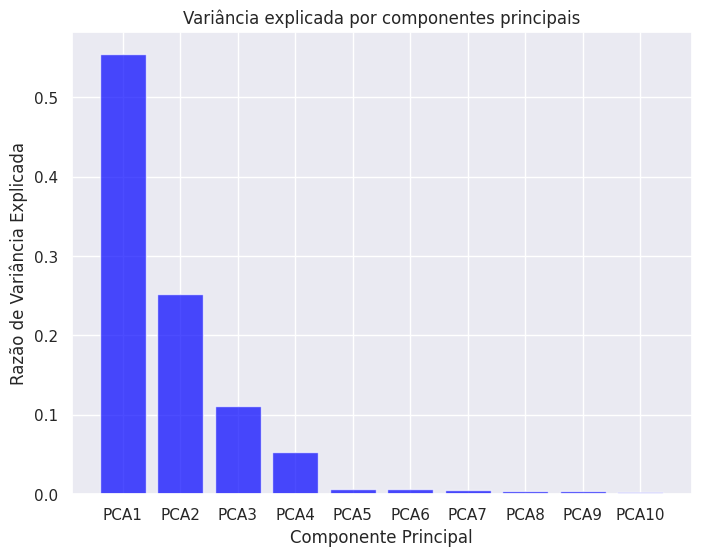

In [46]:
# PCA
pca = PCA(n_components=10)
pca.fit(X)
X_transformed = pca.transform(X)

print("Vari√¢ncia explicada:\n", pca.explained_variance)
pca.plot_explained_variance()


In [47]:
# PCA
pca = PCA(n_components=3)
pca.fit(X)
X_transformed = pca.transform(X)

print("Vari√¢ncia explicada:\n", pca.explained_variance)
pca.plot_explained_variance


Vari√¢ncia explicada:
 [0.55405589 0.25223221 0.11137198]


<bound method PCA.plot_explained_variance of <__main__.PCA object at 0x710317425870>>

<center><img src='https://drive.google.com/uc?export=view&id=15futtT5ZCa2OKSjnn6jl91ADIW_BdFfi' width="600"></center>

O PCA, portanto, nada mais √© que a decomposi√ß√£o em autovalores da matriz de covari√¢ncia. Mas decomposi√ß√£o em autovalores pode ser bem ineficiente e, na pr√°tica, o PCA √© calculado usando Decomposi√ß√£o em Valores Singulares (SVD, do ingl√™s *Singular Value Decomposition*).

# PCA e SVD

Toda matriz sim√©trica quadrada $\mathbf A $ pode ser diagonalizada atrav√©s de seus autovalores e autovetores,

$$
\mathbf A = \mathbf V \mathbf \Lambda \mathbf V^T = \sum_{i = 1}^n \lambda_i \mathbf v_i \mathbf v_i^T
$$
sendo que $\mathbf v_i \perp \mathbf v_j, i\neq j$ e $\| \mathbf v_i \| = \mathbf v_i^T \mathbf v_i = 1$

A decomposi√ß√£o pode ser explicitada como:

\begin{equation}
\mathbf A_{n \times n} =
\begin{pmatrix}
|  & |  &   & |  \\
\mathbf v_{1} & \mathbf v_{2} & \cdots & \mathbf v_{n} \\
|  & |  &   & |  
\end{pmatrix}
\begin{pmatrix}
\lambda_1 & 0 & \cdots & 0 \\
0 & \lambda_2 & \cdots & 0 \\
\vdots & \vdots & \ddots &\vdots \\
0 & 0 & \cdots & \lambda_n
\end{pmatrix} \begin{pmatrix}
-  & \mathbf v_{1}^T  & -  \\
- & \mathbf v_{2}^T & - \\
  & \vdots   &    \\
- & \mathbf v_{n}^T & -
\end{pmatrix}
\end{equation}

In [48]:
A = np.array([[4, 1],
              [1, 3]])
lam, v = np.linalg.eig(A)
print("autovalores=", np.round(lam, 4))
print("autovetores=", np.round(v, 4))
Diag=np.array([[lam[0], 0],[0, lam[1]]])
print(v @ Diag @ v.T)


autovalores= [4.618 2.382]
autovetores= [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]
[[4. 1.]
 [1. 3.]]


In [49]:
A = array([[ 5, 18, 17],
           [18, 11,  3],
           [17, 3,  8]])
print('A matriz A:')
print(A)
# SVD
V, Sigma, _ = np.linalg.svd(A)
print('Autovalores:')
print(Sigma)
print('Autovetores:')
print(V)


A matriz A:
[[ 5 18 17]
 [18 11  3]
 [17  3  8]]
Autovalores:
[33.87457039 16.28981599  6.4152456 ]
Autovetores:
[[-0.65049364  0.75767825  0.05274176]
 [-0.57669419 -0.44753605 -0.68347297]
 [-0.49424876 -0.47501068  0.728068  ]]


A matriz $\mathbf{A}$ pode ser decomposta em $n$ matrizes $\mathbf{v}_i\mathbf{v}_i^T$ $n \times n$ ponderadas pelos autovalores $\lambda_i$:
$$
\mathbf{A} = \sum_{i=1}^n \lambda_i \mathbf{v}_i\mathbf{v}_i^T
$$
ou
$$
\mathbf{A} = \lambda_1 \mathbf{v}_1\mathbf{v}_1^T+\lambda_2 \mathbf{v}_2\mathbf{v}_2^T+\cdots + \lambda_n \mathbf{v}_1\mathbf{v}_n^T
$$

Como $\mathbf{u}_i$ s√£o vetores unit√°rios, podemos at√© ignorar termos $\lambda_i \mathbf{v}_i\mathbf{v}_i^T$ com $\lambda_i$ pequeno.


O c√≥digo abaixo reconstr√≥i a matriz $\mathbf A$ com o n√∫mero de componentes $\mathbf v_i \mathbf v_i^T$ necess√°rias para atingir um limite m√≠nimo de vari√¢ncia explicada definido pela vari√°vel `variance_threshold`, cujo padr√£o √© $80\%$.

In [50]:
def svd_reconstruction_with_variance(matrix, variance_threshold=0.80):
    if np.all(matrix-matrix.T==0) == False:
        raise ValueError("Matriz deve ser sim√©trica")

    # C√°lculo do SVD
    V, Lambda, VT = np.linalg.svd(matrix)

    # C√°lculo da vari√¢ncia total
    total_variance = np.sum(Lambda)

    # N√∫mero de valores singulares necess√°rios para alcan√ßar o limite m√≠nimo de vari√¢ncia dos dados
    variance_sum = 0
    num_singular_values = 0
    variances = []
    for i in range(len(Lambda)):
        variance_sum += Lambda[i]
        variances.append(variance_sum / total_variance)
        if variance_sum / total_variance >= variance_threshold:
            num_singular_values = i + 1
            break

    # Uso apenas dos principais valores singulares definido em 'num_singular_values' para reconstruir a matriz
    V_reduced = V[:, :num_singular_values]
    Lambda_reduced = np.diag(Lambda[:num_singular_values])
    VT_reduced = VT[:num_singular_values, :]

    # Reconstruct the matrix
    reconstructed_matrix = np.dot(V_reduced, np.dot(Lambda_reduced, VT_reduced))

    return reconstructed_matrix, num_singular_values, variances


In [51]:
A = np.array([[4, 1],
              [1, 3]])
variance_threshold = 0.6
Ar, num_singular_values, variances = svd_reconstruction_with_variance(A, variance_threshold)

print("Matriz original:")
print(A)
print("\nMatriz reconstru√≠da com {:.0f}% de vari√¢ncia:".format(variance_threshold*100))
print(Ar)
print("\nN√∫mero de valores singulares usados:")
print(num_singular_values)

print("\nPorcentagem acumulada da vari√¢ncia total de cada valor singular utilizado:")
print(variances)


Matriz original:
[[4 1]
 [1 3]]

Matriz reconstru√≠da com 60% de vari√¢ncia:
[[3.34164079 2.06524758]
 [2.06524758 1.2763932 ]]

N√∫mero de valores singulares usados:
1

Porcentagem acumulada da vari√¢ncia total de cada valor singular utilizado:
[0.659719141249985]


In [52]:
N = 10
np.random.seed(42)
A = np.random.random(size=(N,N))
A_symm = (A + A.T)/2
print(A_symm)


[[0.37454012 0.4856494  0.67192342 0.60310167 0.13902844 0.56278957
  0.22338045 0.81921046 0.73210922 0.41383341]
 [0.4856494  0.96990985 0.48596825 0.19143162 0.33850094 0.47926867
  0.28779564 0.36173606 0.52762157 0.50223696]
 [0.67192342 0.48596825 0.29214465 0.21570672 0.24522925 0.86233745
  0.51420565 0.25987828 0.4616563  0.40361773]
 [0.60310167 0.19143162 0.21570672 0.94888554 0.93747622 0.85161235
  0.33068355 0.45656677 0.37389569 0.50071485]
 [0.13902844 0.33850094 0.24522925 0.93747622 0.25877998 0.63021113
  0.29632279 0.61346268 0.4288463  0.47791082]
 [0.56278957 0.47926867 0.86233745 0.85161235 0.63021113 0.92187424
  0.31559429 0.46249502 0.18520531 0.40956296]
 [0.22338045 0.28779564 0.51420565 0.33068355 0.29632279 0.31559429
  0.14092422 0.78673366 0.40207841 0.75480988]
 [0.81921046 0.36173606 0.25987828 0.45656677 0.61346268 0.46249502
  0.78673366 0.07404465 0.4980116  0.27170504]
 [0.73210922 0.52762157 0.4616563  0.37389569 0.4288463  0.18520531
  0.40207841

In [53]:
var_threshold = 0.6
A_symm_r, num_singular_values, variances = svd_reconstruction_with_variance(A_symm, var_threshold)

print("Matriz original:")
print(A_symm)
print("\nMatriz reconstru√≠da com {:.0f}% de vari√¢ncia:".format(var_threshold*100))
print(A_symm_r)
print("\nN√∫mero de valores singulares usados:")
print(num_singular_values)

print("\nPorcentagem acumulada da vari√¢ncia total de cada valor singular utilizado:")
print(variances)


Matriz original:
[[0.37454012 0.4856494  0.67192342 0.60310167 0.13902844 0.56278957
  0.22338045 0.81921046 0.73210922 0.41383341]
 [0.4856494  0.96990985 0.48596825 0.19143162 0.33850094 0.47926867
  0.28779564 0.36173606 0.52762157 0.50223696]
 [0.67192342 0.48596825 0.29214465 0.21570672 0.24522925 0.86233745
  0.51420565 0.25987828 0.4616563  0.40361773]
 [0.60310167 0.19143162 0.21570672 0.94888554 0.93747622 0.85161235
  0.33068355 0.45656677 0.37389569 0.50071485]
 [0.13902844 0.33850094 0.24522925 0.93747622 0.25877998 0.63021113
  0.29632279 0.61346268 0.4288463  0.47791082]
 [0.56278957 0.47926867 0.86233745 0.85161235 0.63021113 0.92187424
  0.31559429 0.46249502 0.18520531 0.40956296]
 [0.22338045 0.28779564 0.51420565 0.33068355 0.29632279 0.31559429
  0.14092422 0.78673366 0.40207841 0.75480988]
 [0.81921046 0.36173606 0.25987828 0.45656677 0.61346268 0.46249502
  0.78673366 0.07404465 0.4980116  0.27170504]
 [0.73210922 0.52762157 0.4616563  0.37389569 0.4288463  0.1852

E quando amatriz n√£o √© sim√©trica?

Dada uma matriz $\mathbf A \in \mathbb{R}^{m \times n}$, podemos calcular a decomposi√ß√£o SVD como:

$$
\mathbf A = \mathbf U \boldsymbol \Sigma \mathbf V^T
$$

As colunas das matrizes $\mathbf U$ e $\mathbf V$ s√£o formadas pelos autovetores de $\mathbf A \mathbf A^T$ e $\mathbf A^T \mathbf A$, respectivamente.

A matriz diagonal $\boldsymbol \Sigma$ √© composta dos autovalores $\sigma_i$ da matriz $\mathbf A \mathbf A^T$ ou $\mathbf A^T \mathbf A$. O valor $\sigma_i$ √© conhecido como valor singular.

Importante relembrar que os autovalores $\lambda_i$ de $\mathbf A$ se relacionam com $\sigma_i$ de modo que:

$$\sigma_i = \sqrt{\lambda_i}$$

In [54]:
A = np.random.rand(10, 2)
print(A)


[[0.03142919 0.63641041]
 [0.31435598 0.50857069]
 [0.90756647 0.24929223]
 [0.41038292 0.75555114]
 [0.22879817 0.07697991]
 [0.28975145 0.16122129]
 [0.92969765 0.80812038]
 [0.63340376 0.87146059]
 [0.80367208 0.18657006]
 [0.892559   0.53934224]]


In [55]:
variance_threshold=0.80
A_reduced, num_singular_values, variances = svd_reconstruction_with_variance(A,variance_threshold)

print("Matriz original:")
print(A)
print("\nMatriz reconstru√≠da com {:0.0f}% de vari√¢ncia:".format(variance_threshold*100))
print(A_reduced)
print("\nN√∫mero de valores singulares usados:")
print(num_singular_values)

print("\nPorcentagem acumulada da vari√¢ncia total de cada valor singular utilizado:")
print(variances)


ValueError: operands could not be broadcast together with shapes (10,2) (2,10) 

In [56]:
def svd_reconstruction_with_variance(matrix, variance_threshold=0.80):
    # C√°lculo do SVD
    U, Sigma, VT = np.linalg.svd(matrix, full_matrices=False)

    # C√°lculo da vari√¢ncia total (soma dos valores singulares ao quadrado)
    total_variance = np.sum(Sigma**2)

    # N√∫mero de valores singulares necess√°rios para alcan√ßar
    # o limite m√≠nimo de vari√¢ncia dos dados
    variance_sum = 0
    num_singular_values = 0
    variances = []
    for i in range(len(Sigma)):
        variance_sum += Sigma[i]**2
        variances.append(variance_sum / total_variance)
        if variance_sum / total_variance >= variance_threshold:
            num_singular_values = i + 1
            break

    # Uso apenas dos principais valores singulares definido em
    # 'num_singular_values' para reconstruir a matriz
    U_reduced = U[:, :num_singular_values]
    Sigma_reduced = np.diag(Sigma[:num_singular_values])
    VT_reduced = VT[:num_singular_values, :]

    # Reconstru√ß√£o da Matriz
    reconstructed_matrix = np.dot(U_reduced, np.dot(Sigma_reduced, VT_reduced))

    return reconstructed_matrix, num_singular_values, variances


In [57]:
variance_threshold=0.80
A_reduced, num_singular_values, variances = svd_reconstruction_with_variance(A,variance_threshold)

print("Matriz original:")
print(A)
print("\nMatriz reconstru√≠da com {:0.0f}% de vari√¢ncia:".format(variance_threshold*100))
print(A_reduced)
print("\nN√∫mero de valores singulares usados:")
print(num_singular_values)

print("\nPorcentagem acumulada da vari√¢ncia total de cada valor singular utilizado:")
print(variances)


Matriz original:
[[0.03142919 0.63641041]
 [0.31435598 0.50857069]
 [0.90756647 0.24929223]
 [0.41038292 0.75555114]
 [0.22879817 0.07697991]
 [0.28975145 0.16122129]
 [0.92969765 0.80812038]
 [0.63340376 0.87146059]
 [0.80367208 0.18657006]
 [0.892559   0.53934224]]

Matriz reconstru√≠da com 80% de vari√¢ncia:
[[0.33240198 0.28341153]
 [0.43311592 0.36928193]
 [0.64860805 0.55301415]
 [0.61065764 0.52065698]
 [0.17049225 0.14536457]
 [0.24737837 0.21091897]
 [0.93732277 0.79917718]
 [0.79702445 0.67955647]
 [0.55748099 0.47531768]
 [0.78311879 0.66770027]]

N√∫mero de valores singulares usados:
1

Porcentagem acumulada da vari√¢ncia total de cada valor singular utilizado:
[0.8926462681796792]


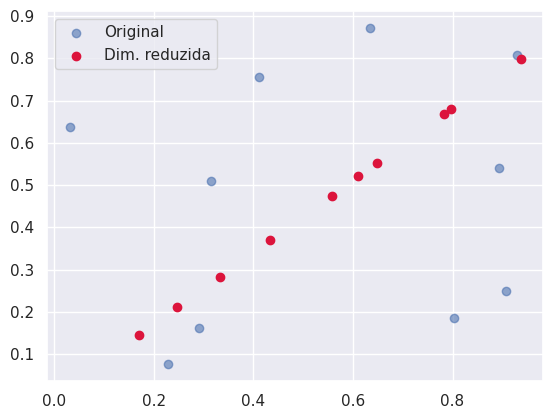

In [58]:
# Plotar dados originais/dados reduzidos
plt.scatter(A[:, 0], A[:, num_singular_values], alpha = 0.6, label = 'Original')
plt.scatter(A_reduced[:, 0], A_reduced[:, num_singular_values], c='crimson', label = 'Dim. reduzida')
plt.legend()
plt.show()


Voltando ao nosso problema, a matriz de covari√¢ncia √© sim√©trica e pode ser, portanto, decomposta em autovalores
$$
\mathbf S = \frac{1}{m-1}\mathbf X_c^T \mathbf X_c = \mathbf V \mathbf \Lambda \mathbf V^T
$$
ou
$$
\mathbf S =\sum_{i = 1}^m \lambda_i \mathbf v_i \mathbf v_i^T
$$

Os autovetores $\mathbf v_i$ s√£o chamados de eixos principais ou dire√ß√µes principais dos dados.

Portanto, a matriz $\mathbf S$ pode ser decomposta em $n$ matrizes $\mathbf v_i \mathbf v_i^T$ $n\times n$, ponderadas de $\lambda_i$, onde $\mathbf v_{i}$ s√£o os $n$ autovetores de $\mathbf S$ e $\lambda_i$ os respectivos autovalores distribu√≠dos na matriz diagonal $\mathbf \Lambda$.


Veja que, se transformamos o vetor de dados da seguinte forma:
$$
\mathbf Z=\mathbf X_c\mathbf V
$$
basta multiplicar o conjunto de dados, ap√≥s centralizado, pela matriz de autovetores encontrada na decomposi√ß√£o da matriz de covari√¢ncia.

Essa transforma√ß√£o $\mathbf Z=\mathbf X_c\mathbf V$ leva a uma matriz de covari√¢ncia,
\begin{equation}
\mathbf S_Z
= {1 \over {m-1}}\mathbf Z^T \mathbf Z
\end{equation}

Portanto,
\begin{equation}\begin{array}{cl}
\mathbf S_z & = {1 \over {m-1}}\left(\mathbf X_c\mathbf V\right)^T \left(\mathbf X_c \mathbf V\right) \\
& = {1 \over {m-1}}\mathbf V^T \mathbf X_c^T \mathbf X_c \mathbf V \\
&   = {1 \over {m-1}}\mathbf V^T \left(\mathbf X_c^T \mathbf X_c\right) \mathbf V \\
& = \mathbf V^T \mathbf S \mathbf V \\
\end{array}
\end{equation}
onde $\mathbf S=\frac{1}{m-1}\mathbf X_c^T \mathbf X_c$ que, conforme aprendemos, pode ser decomposta em $\mathbf S=\mathbf V \mathbf \Lambda \mathbf V^T$,
\begin{equation}\begin{array}{cl}
\mathbf S_z & = \mathbf V^T\left(\mathbf V\mathbf \Lambda \mathbf V^T \right) \mathbf V \\
& = \left(\mathbf V^T\mathbf V\right)\mathbf \Lambda \left(\mathbf V^T \mathbf V \right)\\
& = \mathbf \Lambda \\
\end{array}
\end{equation}
sabendo-se que o vetor $\mathbf V^T=\mathbf V^{-1}$.Portanto,
$$
\mathbf S_z =\mathbf \Lambda \tag{1}
$$

Dessa forma,  $\mathbf S_z$ √© diagonal, e esse era outro objetivo do PCA!!! Al√©m da m√°xima vari√¢ncia, lembre-se que estamos procurando uma transforma√ß√£o com a covari√¢ncia m√≠nima poss√≠vel, que √© zero. Ent√£o, o ideal √© que $\mathbf S_z$ seja uma matriz diagonal.  Que foi exatamente o que encontramos. O i-√©simo valor diagonal de $\mathbf S_z$ √© a vari√¢ncia de $\mathbf X$ ao longo de $\mathbf v_i$.


Se agora aplicarmos a decomposi√ß√£o de valor singular (SVD) √† matriz de dados centralizada $\mathbf X_c$, obteremos uma decomposi√ß√£o,
$$
\mathbf X_c=\mathbf U\mathbf \Sigma\mathbf V^T
$$
onde $\mathbf \Sigma$ √© a matriz diagonal que possui os autovalores $\sigma_i$ de $\mathbf X_c$. Os autovetores de $\mathbf X_c\mathbf X_c^ùëá$ formam as colunas da matriz $\mathbf U$, e os autovetores de $\mathbf X_c^T\mathbf X_c$ formam as colunas da matriz $\mathbf V$ (vejam que essa matriz $\mathbf V$ j√° foi definida anteriormente na decomposi√ß√£o em autovalores) .

Tentando construir a matriz de covari√¢ncia a partir desta decomposi√ß√£o tem-se
$$
\mathbf S = \frac{1}{m-1}\mathbf X_c^T\mathbf X_c
=\frac{1}{m-1}(\mathbf U\mathbf \Sigma\mathbf V^T)^T(\mathbf U\mathbf \Sigma\mathbf V^T)
= \frac{1}{m-1}(\mathbf V\mathbf \Sigma\mathbf U^T)(\mathbf U\mathbf \Sigma\mathbf V^T)
$$
e como $\mathbf U^T \mathbf U=\mathbf I$,
$$
\mathbf S =\frac{1}{m-1}\mathbf X_c^T\mathbf X_c=\frac{1}{m-1}\mathbf V\mathbf \Sigma^2 \mathbf V^T \mathbf =\mathbf V \mathbf \Lambda \mathbf V^T
$$
e a correspond√™ncia √© facilmente vista. Por exemplo, as ra√≠zes quadradas dos autovalores de $\mathbf X_c^T\mathbf X_c$ s√£o os valores singulares de $\mathbf X_c$,
$$
\mathbf \Lambda = \frac{1}{m-1}\mathbf \Sigma^2
$$

significando que os vetores singulares √† direita $\mathbf V$ s√£o dire√ß√µes principais e que os valores singulares est√£o relacionados aos autovalores da matriz de covari√¢ncia via
$$\lambda_i = \frac{\sigma_i^2}{m‚àí1}. \tag{2}$$

Dessa forma, √© poss√≠vel, sem criar a matriz de covari√¢ncia, achar as componentes principais.

### Exemplo

Para a matriz do conjunto de dados $\mathbf X$
\begin{equation}
\mathbf X = \begin{bmatrix}
3 & 4 & 3 & 1\\
1 & 3 & 2 & 6\\
2 & 4 & 1 & 5\\
3 & 3 & 5 & 2
\end{bmatrix}
\end{equation}

de modo que,

$$
\mathbf S = \frac{1}{n-1}\mathbf X_c^T\mathbf X_c=\mathbf V\mathbf \Lambda \mathbf V^T
$$

Plote a vari√¢ncia relacionada √†s componentes principais.

In [59]:
X = np.matrix([[3, 4, 3, 1],[1,3,2,6],[2,4,1,5],[3,3,5,2]])
m,n = X.shape
print(m,n)


4 4


In [60]:
cov = np.cov(X.T)
print(f'Matriz de Covari√¢ncia:\n {cov}')


Matriz de Covari√¢ncia:
 [[ 0.91666667  0.16666667  1.08333333 -2.16666667]
 [ 0.16666667  0.33333333 -0.5        -0.33333333]
 [ 1.08333333 -0.5         2.91666667 -2.83333333]
 [-2.16666667 -0.33333333 -2.83333333  5.66666667]]


In [61]:
# calcula a m√©dia de cada coluna
xbar = np.mean(X, axis = 0).T
#gera um vetor de 1s
Vet1 = np.ones((m,1))
#subtrai de cada coluna de A sua respectiva m√©dia
Xc = X - np.outer(Vet1,xbar)
print(f'Matriz X centralizada:\n {Xc}')


Matriz X centralizada:
 [[ 0.75  0.5   0.25 -2.5 ]
 [-1.25 -0.5  -0.75  2.5 ]
 [-0.25  0.5  -1.75  1.5 ]
 [ 0.75 -0.5   2.25 -1.5 ]]


In [62]:
V, lambdai, _ = np.linalg.svd(cov)
Lambda = np.diag(lambdai)
print(f'Matriz Diagonal com autovalores da matriz de Covari√¢ncia:\n {Lambda}')


Matriz Diagonal com autovalores da matriz de Covari√¢ncia:
 [[8.23690504e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.51165390e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.47743887e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.90563191e-17]]


In [63]:
print(f'Vari√¢ncia atrav√©s da matriz X centralizada Xc:\n {np.dot(Xc.T,Xc)/(m-1)}')
print(f'Vari√¢ncia atrav√©s de autovetores:\n {np.dot(np.dot(V,Lambda),V.T)}')


Vari√¢ncia atrav√©s da matriz X centralizada Xc:
 [[ 0.91666667  0.16666667  1.08333333 -2.16666667]
 [ 0.16666667  0.33333333 -0.5        -0.33333333]
 [ 1.08333333 -0.5         2.91666667 -2.83333333]
 [-2.16666667 -0.33333333 -2.83333333  5.66666667]]
Vari√¢ncia atrav√©s de autovetores:
 [[ 0.91666667  0.16666667  1.08333333 -2.16666667]
 [ 0.16666667  0.33333333 -0.5        -0.33333333]
 [ 1.08333333 -0.5         2.91666667 -2.83333333]
 [-2.16666667 -0.33333333 -2.83333333  5.66666667]]


In [64]:
cp = V
Z = np.dot(Xc,cp)
print(f'Proje√ß√£o de Xc nas dire√ß√µes principais (componentes principais):\n{Z}')


Proje√ß√£o de Xc nas dire√ß√µes principais (componentes principais):
[[-2.38993763e+00 -1.16505941e+00  2.36293682e-01  8.32667268e-17]
 [ 2.79391217e+00  8.66460644e-01  2.61344083e-01  2.49800181e-16]
 [ 2.15506283e+00 -9.42090469e-01 -3.05237231e-01 -2.77555756e-17]
 [-2.55903737e+00  1.24068924e+00 -1.92400534e-01 -3.05311332e-16]]


## An√°lise da matriz de covari√¢ncia

Os autovetores $\mathbf v_i$ s√£o chamados de eixos principais ou dire√ß√µes principais dos dados. As proje√ß√µes dos dados nos eixos principais s√£o chamadas de *componentes principais*, tamb√©m conhecidas como *PC scores*; estas podem ser vistas como as novas vari√°veis transformadas.

A j-√©sima componente principal √© dada pela j-√©sima coluna de $\mathbf X_c \mathbf V $. As coordenadas do i-√©simo ponto de dados no novo espa√ßo PC s√£o dadas pela i-√©sima linha de $\mathbf X_c \mathbf V $.

In [65]:
U, sigmai, Vt = np.linalg.svd(Xc)
Sigma = np.diag(sigmai)
print(f'Matriz Diagonal com autovalores de Xc:\n {Sigma}')


Matriz Diagonal com autovalores de Xc:
 [[4.97098734 0.         0.         0.        ]
 [0.         2.12954495 0.         0.        ]
 [0.         0.         0.50430464 0.        ]
 [0.         0.         0.         0.        ]]


Perceba que os autovalores $\sigma_i$ s√£o resultado da decomposi√ß√£o em valor singular do vetor $\mathbf{X}_c$, enquanto que os autovalores $\lambda_i$ referem-se √† decomposi√ß√£o em autovalores da matriz de covari√¢ncia. Eles est√£o relacionados da seguinte forma:
$$\lambda_i = \frac{\sigma_i^2}{m‚àí1}.$$

S√£o os autovalores da matriz de covari√¢ncia $\lambda_i$ que mostram as vari√¢ncias das respectivas PCs.

Compare o primeiro autovalor $\lambda_1=8.23690504$ com:

In [66]:
4.97098734**2/(m-1)


8.236905044813424

In [67]:
print(f'Vari√¢ncia atrav√©s de autovetores e autovalores de Xc:\n {np.dot(np.dot(Vt.T,Sigma**2),Vt)/(m-1)}')


Vari√¢ncia atrav√©s de autovetores e autovalores de Xc:
 [[ 0.91666667  0.16666667  1.08333333 -2.16666667]
 [ 0.16666667  0.33333333 -0.5        -0.33333333]
 [ 1.08333333 -0.5         2.91666667 -2.83333333]
 [-2.16666667 -0.33333333 -2.83333333  5.66666667]]


In [68]:
# conforme a teoria, Z pode ser calculado tamb√©m como,
print(f'Pode ser tamb√©m calculada como U*Sigma:\n{np.dot(U,Sigma)}')


Pode ser tamb√©m calculada como U*Sigma:
[[-2.38993763  1.16505941 -0.23629368  0.        ]
 [ 2.79391217 -0.86646064 -0.26134408  0.        ]
 [ 2.15506283  0.94209047  0.30523723  0.        ]
 [-2.55903737 -1.24068924  0.19240053  0.        ]]


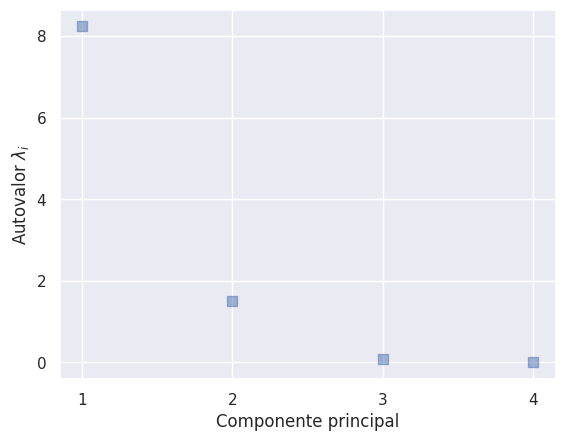

In [69]:
x_list = np.array(np.arange(1,m+1))
x_list = range(math.floor(min(x_list)), math.ceil(max(x_list))+1) # s√≥ para o gr√°fico mostrar inteiros no eixo x

plt.scatter(x_list, lambdai, marker ="s", s = 50,alpha=0.5)
plt.xlabel("Componente principal")
plt.ylabel("Autovalor "+r"$\lambda_i$")
plt.xticks(x_list)
plt.show()


### Exemplo bidimensional novamente

Voltemos ao exemplo bidimensional,

In [70]:
#Voltemos aos nossos dados aleat√≥rios iniciais
m = 100
n = 2
np.random.seed(42)
x1 = 10.*np.sqrt((np.random.normal(size=m))**2)
x2 = x1 + 5.8*(np.random.normal(size=m))
X = np.stack((x1,x2),axis=1)


In [71]:
# calcula a m√©dia de cada coluna
xbar = np.mean(X, axis = 0).T
#gera um vetor de 1s
Vet1 = np.ones((m,1))
#subtrai de cada coluna de A sua respectiva m√©dia
Xc = X - np.outer(Vet1,xbar)
print(f'Primeiros 10 valores da Matriz A centralizada:\n {Xc[:10]}')


Primeiros 10 valores da Matriz A centralizada:
 [[ -2.26087942 -10.59939632]
 [ -5.84537793  -8.41448741]
 [ -0.75113556  -2.86824637]
 [  8.00227762   3.21970285]
 [ -4.8864872   -5.95131093]
 [ -4.88665138  -2.67252301]
 [  8.56410721  19.37461883]
 [  0.44632635   1.32951106]
 [ -2.53327709  -1.16885142]
 [ -1.80242051  -2.36357343]]


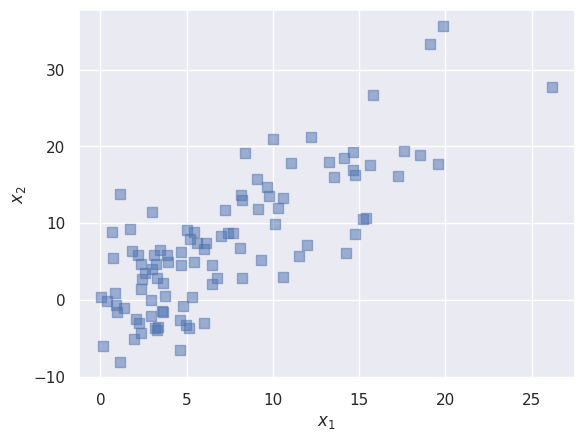

Vari√¢ncia x1 = 30.79428545290911
Vari√¢ncia x2 = 76.24938585795348


In [72]:
plt.scatter(x1, x2, marker ="s", s = 50,alpha=0.5)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()
print("Vari√¢ncia x1 =",np.var(x1,ddof=1))
print("Vari√¢ncia x2 =",np.var(x2,ddof=1))


In [73]:
U, sigmai, VT = np.linalg.svd(Xc)
Sigma =  np.diag(sigmai)
print(f'Matriz Diagonal com autovalores de A:\n {Sigma}')


Matriz Diagonal com autovalores de A:
 [[98.49495701  0.        ]
 [ 0.         29.93437662]]


ValueError: Masked arrays must be 1-D

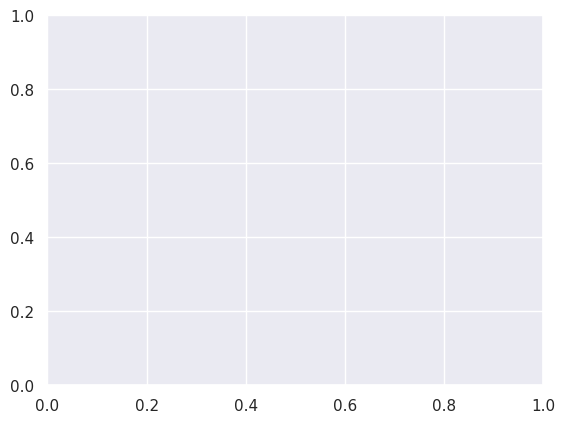

In [74]:
xaxis_title="CP-1"
yaxis_title="CP-2"
plt.scatter(Z[:,0], Z[:,1], marker ="s", s = 50,alpha=0.5)
plt.xlabel(xaxis_title)
plt.ylabel(yaxis_title)
plt.show()


Depois que as dire√ß√µes principais s√£o calculadas, podemos projetar nossos dados como,

$$ \mathbf Z_{(m \times n)} = \mathbf X_{c{(m \times n)}} \mathbf V _ {(n \times n)}, $$

onde $ \mathbf V$ √© a matriz das dire√ß√µes principais e  as colunas de $\mathbf Z$ definem as componentes principais.  Lembre-se: A j-√©sima componente principal √© dada pela j-√©sima coluna de $\mathbf X_c \mathbf V $. As coordenadas do i-√©simo ponto de dados no novo espa√ßo PC s√£o dadas pela i-√©sima linha de $\mathbf X_c \mathbf V $.


In [ ]:
cp = VT.T
Z = np.dot(Xc,cp)
print(f'Dimens√£o da matriz de proje√ß√£o de Xc nas dire√ß√µes principais (componentes principais):\n{Z.shape}')


## Redu√ß√£o de dimensionalidade

Vamos reduzir a dimens√£o para "$k$". Observe na figura que basta selecionar os $k$ primeiros autovetores, i√©, as $k$ primeiras colunas de $\mathbf V$.

A proje√ß√£o $\mathbf z_i = \mathbf V^T\mathbf x_i$  pode ser escrita como a opera√ß√£o de matrizes:
$$
\mathbf Z_{(m,k)} = \mathbf X_{{(m,n)}}\mathbf V_{(n,k)}
$$

Portanto,
\begin{equation}
\mathbf V_{n,n} =
\begin{pmatrix}
|  & |  &   & |  \\
\mathbf v_{1} & \mathbf v_{2} & \cdots & \mathbf v_{k}\\
|  & |  &   & |
\end{pmatrix}
\end{equation}
de forma que:
\begin{equation}
\mathbf Z_{m,k} = \mathbf X_{m,n} \mathbf V_{n,k} =  
\begin{pmatrix}
{\mathbf x}_{1}\mathbf v_{1}& {\mathbf x}_{1} \mathbf v_{2}  & \cdots & {\mathbf x}_{1} \mathbf v_{k}\\
{\mathbf x}_{2}\mathbf v_{1}& {\mathbf x}_{2} \mathbf v_{2}  & \cdots & {\mathbf x}_{2} \mathbf v_{k}\\
\vdots  & \vdots  & \ddots & \vdots  \\
{\mathbf x}_{m}\mathbf v_{1}& {\mathbf x}_{m} \mathbf v_{2}  & \cdots & {\mathbf x}_{m} \mathbf v_{kn}\\
\end{pmatrix}
\end{equation}

A nova matriz $\mathbf Z$ pode ser definida como,

\begin{equation}
\mathbf Z_{m,k} =
\begin{pmatrix}
|  & |  &   & |  \\
\hat{\mathbf z}_{1} & \hat{\mathbf z}_{2} & \cdots & \hat{\mathbf z}_{k} \\
|  & |  &   & |  
\end{pmatrix}=
\begin{pmatrix}
-  & {\mathbf z}_{1}   & -  \\
 - & {\mathbf z}_{2}   & - \\
   & \vdots &    \\
 - & {\mathbf z}_{m} & -
\end{pmatrix}
\end{equation}
onde
\begin{equation}
\hat{\mathbf z}_i =
\begin{pmatrix}
{\mathbf x}_{1}\mathbf v_{i} \\
{\mathbf x}_{2}\mathbf v_{i} \\
\vdots   \\
{\mathbf x}_{m}\mathbf v_{i}
\end{pmatrix}
\end{equation}
√© a transforma√ß√£o das observa√ß√µes na dire√ß√£o $\mathbf v_i$, e
\begin{equation}
{\mathbf z}_i =
\begin{pmatrix}
{\mathbf x}_{i}\mathbf v_{1} & {\mathbf x}_{i}\mathbf v_{2} & \cdots  & {\mathbf x}_{i}\mathbf v_{k}
\end{pmatrix}
\end{equation}
√© a transforma√ß√£o da observa√ß√£o $i$.

In [ ]:
k = 1
Vk = cp[:,0:k]
Zk = np.dot(Xc,Vk)
print("Vari√¢ncia ap√≥s a transforma√ß√£o",np.var(Zk, ddof = 1, axis=0))
print("Fra√ß√£o de vari√¢ncia capturada ap√≥s a transforma√ß√£o: ",np.var(Zk,ddof = 1,axis=0)/np.sum(np.var(X_std, ddof =1, axis=0)))


Agora, vamos calcular a proje√ß√£o inversa. Observe que as proje√ß√µes podem ser escritas como $\mathbf z_i = \mathbf V^T \mathbf x_i$, portanto, a proje√ß√£o inversa (re-proje√ß√£o) pode ser escrita como
$$ \mathbf x^r_i = \mathbf {V}^{-1} \mathbf z_i = \mathbf {V}^{T} \mathbf z_i $$

Em forma de matrizes, temos
$$\mathbf X^r = \mathbf Z \mathbf V^T=\mathbf X \mathbf V \mathbf V^T$$



In [ ]:
Xr = np.dot(Zk,Vk.T)
print("Vari√¢ncia ap√≥s a re-transforma√ß√£o",np.var(Xr, ddof = 1, axis=0))
# Plotar os dados
plt.figure(figsize=(8, 8))

# Plotar os dados X_std
plt.scatter(X_std[:, 0], X_std[:, 1], c='lightskyblue', marker='s', s=36, alpha=0.5, label='Dados X')

# Plotar os dados Xr
plt.scatter(Xr[:, 0], Xr[:, 1], c='cadetblue', s=64, alpha=0.8, label='Dados Xr')

for x, xr in zip(X_std, Xr):
    plt.plot([x[0], xr[0]], [x[1], xr[1]], 'DarkTurquoise', linestyle='dotted', linewidth=2)

plt.axis('equal')
plt.legend()
plt.title('Visualiza√ß√£o dos Dados Originais e Reconstru√≠dos')
plt.grid(True)
plt.show()


Para analisar os dados dentro de sua devida ordem de grandeza, deve-se transformar os dados normalizados **multiplicando pelo vetor de desvios padr√£o e adicionando o vetor da m√©dia**, ambos calculados anteriormente.
Calcule e plote os dados projetoados, agora n√£o mais normalizados.

In [ ]:
Xm = np.mean(X,axis=0)
Xs = np.std(X,axis=0)

Xr = np.dot(Zk,Vk.T)*Xs+Xm

# Plotar os dados
plt.figure(figsize=(8, 8))

# Plotar os dados X
plt.scatter(X[:, 0], X[:, 1], c='lightskyblue', marker='s', s=36, alpha=0.5, label='Dados X')

# Plotar os dados Xr
plt.scatter(Xr[:, 0], Xr[:, 1], c='cadetblue', s=64, alpha=0.8, label='Dados Xr')

for x, xr in zip(X, Xr):
    plt.plot([x[0], xr[0]], [x[1], xr[1]], 'DarkTurquoise', linestyle='dotted', linewidth=2)

plt.axis('equal')
plt.legend()
plt.title('Visualiza√ß√£o dos Dados Originais e Reconstru√≠dos')
plt.grid(True)
plt.show()


# Classe PCA

In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None

    def fit(self, X):
        #1: Padroniza√ß√£o dos dados (subtra√ß√£o da m√©dia)
        self.mean = np.mean(X, axis=0)
        Xc = X - self.mean

        #2: C√°lculo das componentes principais
        U, sigmai, VT = np.linalg.svd(Xc)
        self.components = VT.T[:, :self.n_components]

        #3: C√°lculo da vari√¢ncia explicada
        lambdai=sigmai**2/(len(U)-1)
        total_variance = np.sum(lambdai)
        self.explained_variance = lambdai[:self.n_components] / total_variance

    def transform(self, X):
        # Proje√ß√£o dos dados nas componentes selecionadas
        Xc = X - self.mean
        Zk = np.dot(Xc, self.components)
        Xk = np.dot(Zk, self.components.T)
        return Zk,Xk

    def inverse_transform(self, Zk):
        # Reconstru√ß√£o dos dados
        return np.dot(Xc, self.components)

    def get(self):
        return self.components, self.mean, self.explained_variance

    def plot_explained_variance(self):
        # Cria√ß√£o de r√≥tulos para cada componente principal
        labels = [f'PCA{i+1}' for i in range(self.n_components)]

        # Cria√ß√£o de um gr√°fico de barras para varia√ß√£o explicada
        plt.figure(figsize=(8, 6))
        plt.bar(range(1, self.n_components + 1), self.explained_variance, alpha=0.7, align='center', color='blue', tick_label=labels)
        plt.xlabel('Componente Principal')
        plt.ylabel('Raz√£o de Vari√¢ncia Explicada')
        plt.title('Vari√¢ncia explicada por componentes principais')
        plt.show()


In [75]:
m = 100
n = 2
np.random.seed(42)
x1 = 10.*np.sqrt((np.random.normal(size=m))**2)
x2 = x1 + 5.8*(np.random.normal(size=m))

X = np.stack((x1,x2),axis=1)
print(X.shape)


(100, 2)


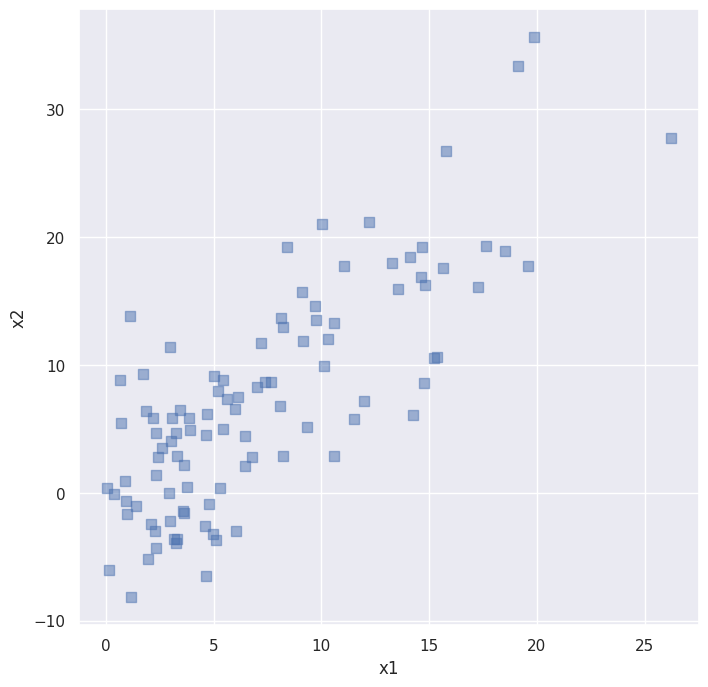

In [76]:
plt.figure(figsize=(8, 8))

plt.scatter(X[:,0], X[:,1], marker ="s", s = 50,alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [77]:
# PCA
pca = PCA(n_components=2)
pca.fit(X)

cps, meanX, explained_variance = pca.get()
print("Vari√¢ncia explicada:\n", explained_variance)
pca.plot_explained_variance()


AttributeError: 'PCA' object has no attribute 'get'

In [87]:
pca = PCA(n_components=1)
pca.fit(X)
cps, meanX, explained_variance = pca.get()
print("Vari√¢ncia explicada:\n", explained_variance)


AttributeError: 'PCA' object has no attribute 'get'

In [86]:
Xc = X - meanX
Zk, Xk = pca.transform(X)


plt.figure(figsize=(8, 8))
# Plotar os dados Xc
plt.scatter(Xc[:, 0], Xc[:, 1], c='lightskyblue', marker='s', s=36, alpha=0.5, label='Dados X')

# Plotar os dados Xk
plt.scatter(Xk[:, 0], Xk[:, 1], c='cadetblue', s=64, alpha=0.8, label='Dados Xk')

for x, xk in zip(Xc, Xk):
    plt.plot([x[0], xk[0]], [x[1], xk[1]], 'DarkTurquoise', linestyle='dotted', linewidth=2)

plt.axis('equal')
plt.legend()
plt.title('Visualiza√ß√£o dos Dados Originais e Reconstru√≠dos')
plt.grid(True)
plt.show()


NameError: name 'meanX' is not defined

Um exemplo 3D...

In [78]:
m = 100
n = 3
np.random.seed(42)
x1 = 10.*np.sqrt((np.random.normal(size=m))**2)
x2 = x1 + 5.8*(np.random.normal(size=m))
x3 = x1 + 10.*np.sqrt((np.random.normal(size=m))**2)
X = np.stack((x1,x2,x3),axis=1)
print(X.shape)


(100, 3)


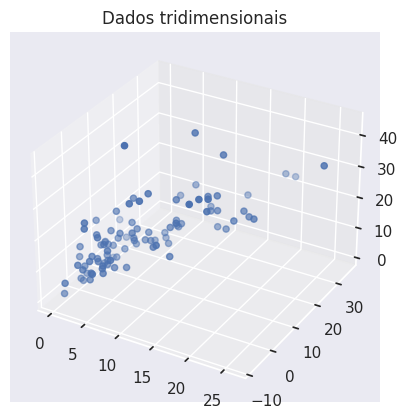

In [79]:
fig = plt.figure()


ax = plt.axes(projection ='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], 'green')
ax.set_title('Dados tridimensionais')
plt.show()


In [80]:
pca = PCA(n_components=1)
pca.fit(X)
cps, meanX, explained_variance = pca.get()
print("Vari√¢ncia explicada:\n", explained_variance)


AttributeError: 'PCA' object has no attribute 'get'

In [81]:
Xc = X - meanX
Zk, Xk = pca.transform(X)


NameError: name 'meanX' is not defined

IndexError: index 2 is out of bounds for axis 1 with size 2

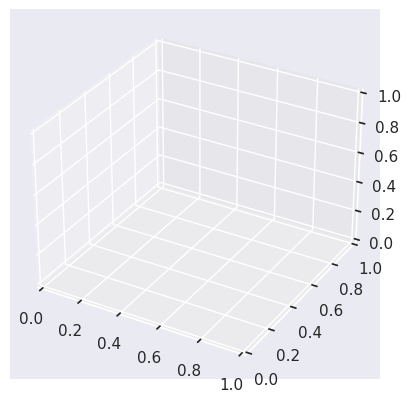

In [82]:
fig = plt.figure()


ax = plt.axes(projection ='3d')
ax.scatter(Xc[:,0], Xc[:,1], Xc[:,2], label='Dados Xc')
plt.scatter(Xk[:, 0], Xk[:, 1], c='cadetblue', s=30, alpha=0.8, label='Dados Xk')
ax.set_title('Dados tridimensionais')
ax.view_init(elev=90., azim=180)
plt.show()


In [83]:
pca = PCA(n_components=2)
pca.fit(X)
cps, meanX, explained_variance = pca.get()
print("Vari√¢ncia explicada:\n", explained_variance)
pca.plot_explained_variance()


AttributeError: 'PCA' object has no attribute 'get'

In [84]:
Xc = X - meanX
Zk, Xk = pca.transform(X)


NameError: name 'meanX' is not defined

IndexError: index 2 is out of bounds for axis 1 with size 2

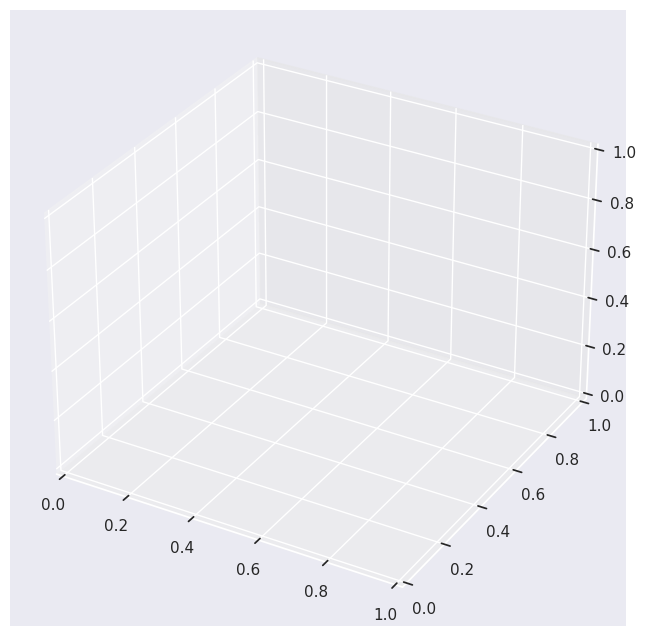

In [85]:
fig = plt.figure(figsize=(8, 8))

ax = plt.axes(projection ='3d')
ax.scatter(Xc[:,0], Xc[:,1], Xc[:,2], c= 'navy', label='Dados Xc')
ax.plot_trisurf(Xk[:,0], Xk[:,1], Xk[:,2],  alpha=0.8, linewidth=0, edgecolor='none')
ax.set_title('Dados tridimensionais')
ax.view_init(elev=30., azim=40)
plt.show()


# Seus estudos

1. Explique as dire√ß√µes principais (em azul) das imagens Parte I e construa as componentes principais da Parte II.

<center><img src='https://drive.google.com/uc?export=view&id=1pgmLj0XGXOegBmAd6YJfmZn0DuAE77Yi' width="800"></center>


2. __What influences love at first sight?__ A partir de dados dispon√≠vel no Kaggle e compilado por professores da Columbia Business School, quando tentavam encontrar uma resposta para a pergunta O que influencia o amor √† primeira vista? , aplique PCA e tire conclus√µes relevantes sobre o tema.
Os dados foram coletados de participantes em eventos experimentais de speed dating de 2002 a 2004.

<center><img src='https://drive.google.com/uc?export=view&id=1e_uFYG37Xjz5JJsq3tC3kLoWenrg6jo6' width="400"></center>